# Hito 3: Minería de Datos - Grupo 17
## Integrantes:
- Claudio Morel - Sección 1
- Damián Gonzalez - Sección 1
- Francisco Márquez - Sección 1
- Joaquín Gonzalez - Sección 1
- Nicolás Soto - Sección 2

# Hito 1

# Introducción: plantear el problema y la motivación.

La pandemia de COVID-19 ha dejado en evidencia una problemática que ha persistido durante mucho tiempo: la escasez de camas hospitalarias para atender a todos los pacientes. En Chile hay un total de 37,397 camas hospitalarias de diferentes niveles de atención, lo que equivale a 1.92 camas por cada 1,000 habitantes. Esto muestra una escasez de camas hospitalarias en comparación con el promedio de los países de la OCDE, que es de 3.6 camas por cada 1,000 habitantes. Esta situación ha subrayado la necesidad urgente de contar con herramientas que permitan gestionar de manera eficiente los recursos del sistema hospitalario.
 
Motivado por la realidad del sistema de salud pública en Chile, marcado por largos tiempos de espera y colapsos en la entrega de servicios básicos en situaciones críticas, surge la necesidad de buscar formas de anticipar y planificar la distribución de recursos y personal de manera efectiva. En respuesta a esta necesidad, se ha emprendido un proyecto de minería de datos que analiza un conjunto de datos de egresos hospitalarios de los años 2020, 2021 y 2022, proporcionados por el Ministerio de salud del gobierno de Chile, con el objetivo de identificar relaciones y patrones que permitan abordar el problema mencionado y mejorar la capacidad de respuesta del sistema de salud ante situaciones similares en el futuro.

# Exploración de datos

## Limpieza y manipulación de datos

Para el proyecto se trabajó con datasets extraídos de la página del ministerio de salud de Chile. Estos datasets contienen información con respecto a los egresos hospitalarios ocurridos durante un año determinado. Se tienen características tanto del paciente como del proceso en sí. Por ejemplo, con respecto al paciente tenemos su etnia, sexo, grupo etario, país de origen, comuna y ciudad de residencia, pertenencia al sistema nacional de salud, y el tipo de previsión. En cuanto al proceso en sí, se tiene el año de egreso, la cantidad de días de estadía, el diagnóstico principal, la condición de egreso del paciente (si sobrevivió o no), y por último, si el paciente fue intervenido quirúrgicamente o no.

En un principio se tuvo 3 datasets, correspondientes a los años 2020, 2021 y 2022, los cuales fueron reunidos en un solo dataset principal. Este dataset final contiene alrededor de 4 millones de tuplas y cada paciente cuenta con 18 atributos. 


In [195]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset_2022 = pd.read_csv('C:\\Users\\fmarq\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2022\\EGRE_DATOS_ABIERTOS_2022.csv', delimiter = ';', encoding = 'latin1')
dataset_2021 = pd.read_csv('C:\\Users\\fmarq\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2021\\EGRE_DATOS_ABIERTOS_2021.csv', delimiter = ';', encoding = 'latin1')
dataset_2020 = pd.read_csv('C:\\Users\\fmarq\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2020\\EGRE_DATOS_ABIERTOS_2020.csv', delimiter = ';', encoding = 'latin1')


C:\Users\fmarq\AppData\Local\Temp\ipykernel_11908\1134835255.py:8: DtypeWarning: Columns (7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2022 = pd.read_csv('C:\\Users\\fmarq\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2022\\EGRE_DATOS_ABIERTOS_2022.csv', delimiter = ';', encoding = 'latin1')
C:\Users\fmarq\AppData\Local\Temp\ipykernel_11908\1134835255.py:9: DtypeWarning: Columns (7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2021 = pd.read_csv('C:\\Users\\fmarq\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2021\\EGRE_DATOS_ABIERTOS_2021.csv', delimiter = ';', encoding = 'latin1')
C:\Users\fmarq\AppData\Local\Temp\ipykernel_11908\1134835255.py:10: DtypeWarning: Columns (7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_2020 = pd.read_csv('C:\\Users\\fmarq\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2020\\EGRE_DATOS_ABIERTOS_2020.cs

Primero incluimos las librerías necesarias e importamos los archivos csv con los datos (Las rutas solo funcionan en la máquina local)

In [196]:
dataset_2022['INTERV_Q'] = dataset_2022['GLOSA_INTERV_Q_PPAL'].apply(lambda x: 2 if pd.isna(x) else 1)
dataset_2022['PROCED'] = dataset_2022['GLOSA_PROCED_PPAL'].apply(lambda x: 2 if pd.isna(x) else 1)
dataset_2022 = dataset_2022.drop(['GLOSA_INTERV_Q_PPAL','GLOSA_PROCED_PPAL'],axis=1)


En el código anterior, lo  que se hizo fue generar los valores tanto de las categorías INTERV_Q y PROCED del dataset correspondiente al año 2022 utilizando los valores de la columna GLOSA_INTERVAL_Q_PPAL. Esto se hizo debido a que en los datasets de los años 2020 y 2021 no se tenían estas  categorías. De esta forma, modificamos los datasets para que todos tengan las mismas columnas y sea posible concatenarlos.

In [197]:
dataset_2020 = dataset_2020[dataset_2020['PERTENENCIA_ESTABLECIMIENTO_SALUD']!='*']
dataset_2021 = dataset_2021[dataset_2021['PERTENENCIA_ESTABLECIMIENTO_SALUD']!='*']
dataset_2022 = dataset_2022[dataset_2022['PERTENENCIA_ESTABLECIMIENTO_SALUD']!='*']
ds = pd.concat([dataset_2020, dataset_2021, dataset_2022], ignore_index=True)

Aquí, se concatenan los datasets de los 3 años estudiados, para trabajar con un dataset común de todos los datos. Esto no será problema para el análisis temporal de los datos, dado que cada paciente tiene un atributo de 'ANO_EGRESO' que nos permite identificar a que año pertenece el dato. Además, previo a hacer la concatenación, se filtran todos los datos llenados parcialmente, esto pues luego de hacer un análisis de cada csv, existen una cantidad no menor de datos con sus atributos fijados con un valor "*". De esta forma se filtran, todas las tuplas que con estas características.

In [198]:
diagns = pd.read_excel('C:\\Users\\fmarq\\DCC\\7mo_semestre\\Mineria\\proyecto\\datos\\EGRESOS_2022\\Diccionario_BD_egresos_hospitalario.xlsx', sheet_name='codigo CIE-10', usecols=lambda x: x not in range(5))
mapping_dict = diagns.set_index('CODIGO SUBCATEGORIA')['GLOSA CAPITULO'].to_dict()
ds['DIAG1'] = ds['DIAG1'].map(mapping_dict)
ds['DIAG1'].nunique()

21

Los diagnósticos presentes en el dataset, son muy específicos teniendo sobre 7000 valores distintos. Por lo tanto, con tal de poder estudiar y visualizar el comportamiento de estos datos, nos pareció prudente generalizar estos diagnósticos utilizando el diccionario de diagnósticos que viene incluido en conjunto con los csv de cada año. Así, intercambiamos los valores de 'CODIGO_SUBCATEGORIA' por los valores de 'GLOSA CAPITULO', así reduciendo a 21 valores únicos.

Luego, se realizó la tarea de identificar outliers, en donde se encontró que existen pacientes con una cantidad de días de estadía anormal, lo cual dificulta la correcta visualización de este atributo. En modo de ejemplo, vemos el caso de una mujer con casi 20.000 días, teniendo solo 20 a 29 años, lo que reulta ser una incoherencia.

In [199]:
dias = ds['DIAS_ESTADA'].max()
print(str(dias)+" dias!")
años = dias//365
print(str(años)+" años!!!")
ds[ds['DIAS_ESTADA']==dias]

19477 dias!
53 años!!!


PERTENENCIA_ESTABLECIMIENTO_SALUD   SEXO GRUPO_EDAD  \
1544582  Pertenecientes al Sistema Nacional de Servicio...  MUJER    20 a 29   

                                     ETNIA GLOSA_PAIS_ORIGEN  \
1544582  No se identifica con alguna etnia           Chileno   

         COMUNA_RESIDENCIA GLOSA_COMUNA_RESIDENCIA REGION_RESIDENCIA  \
1544582              13201             Puente Alto                13   

           GLOSA_REGION_RESIDENCIA PREVISION GLOSA_PREVISION ANO_EGRESO  \
1544582  Metropolitana de Santiago         1          FONASA       2021   

                                                     DIAG1 DIAG2  DIAS_ESTADA  \
1544582  Síntomas, signos y hallazgos anormales clínico...   NaN        19477   

         CONDICION_EGRESO  INTERV_Q  PROCED  
1544582                 1         2       2

Y tiene 20 a 29 años!!!!!

Para resolver esto, se tomó la decisión de truncar los valores del atributo 'DIAS_ESTADA'. Sin embargo, existe una serie de problemas al hacer esto, ya que no se quiere perder los valores reales de los pacientes y tampoco se quiere perder la capacidad de realizar consultas de datos agregados (Algo que se pierde si truncamos con un valor no numerico como un String). Así, creamos las series ds_numeric y ds_categorical, los cuales tiene los valores de 'DIAS_ESTADA' truncados luego de los 10 días (Puesto que la gran mayoría está entre 1 a 10 días). En el numeric se reemplazan los valores mayores a 10 con un 11, y en categorical se reemplazan con un String que indica "10+". Así, posteriormente podemos utilizar tanto ds, ds_numeric o ds_categorical dependiendo de que queramos hacer (Y sin perder los datos originales). Además, cambiamos los datos de la columna "PERTENENCIA_ESTABLECIMIENTO_SALUD" para que su valor no sea un string si no un int indicando si pertenece o no. Esto tiene sentido ya que es un atributo binario.

In [200]:
cols = ['ANO_EGRESO','DIAS_ESTADA','PREVISION']
ds_numeric = ds.copy()
ds_categorical = ds.copy()
for col in cols:
    ds_numeric[col] = ds_numeric[col].apply(lambda x: int(x))
ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'] = ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'].apply(lambda x: 2 if x=='No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS' else 1)

In [201]:
ds_numeric['DIAS_ESTADA'] = ds_numeric['DIAS_ESTADA'].apply(lambda x: 11 if x>10 else x) # aqui dejamos los valores sobre 10 como 11 por mientras
ds_categorical['DIAS_ESTADA'] = ds_categorical['DIAS_ESTADA'].apply(lambda x: "10+" if x>10 else x)

Luego de truncar los datos, podemos visualizar como este proceso ayudó a una mejor visualización de esta variable. Primero vemos un gráfico tipo "Box-Plot" utilizando la serie sin truncar "ds", en el cual se ven muchos puntos distantes y fuera del rango intercuartil (El cual es casi inexistente a la vista). Luego usando la serie "ds_numeric", vemos un claro rangointercuartil y ya no exites outliers.

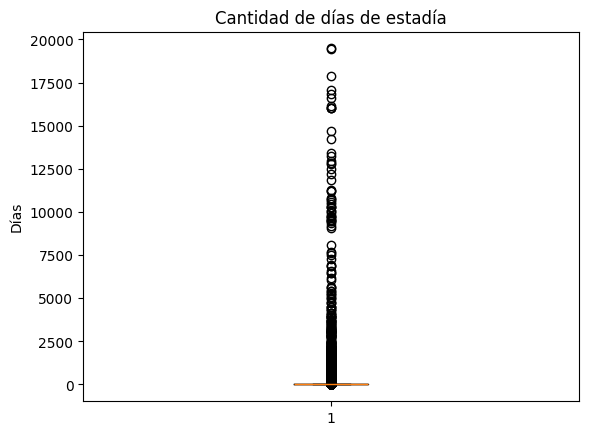

In [202]:
dias_estada = ds['DIAS_ESTADA']

plt.boxplot(dias_estada)
plt.title("Cantidad de días de estadía")
plt.ylabel("Días")
plt.show()

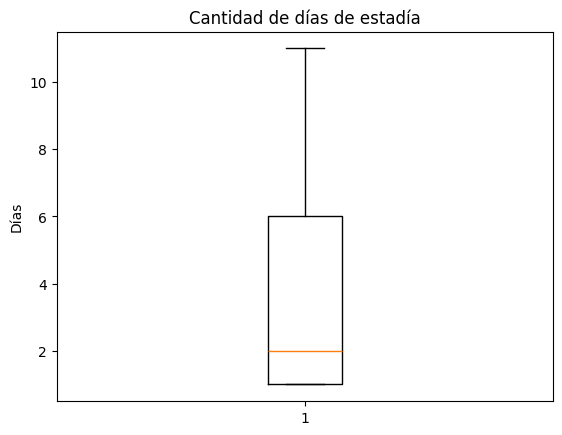

In [203]:
dias_estada = ds_numeric['DIAS_ESTADA']

plt.boxplot(dias_estada)
plt.title("Cantidad de días de estadía")
plt.ylabel("Días")
plt.show()

## Visualización de datos

Una vez realizada la limpieza de los datos, se procede a realizar una visualización general de los mismos. Esto fue necesario para asegurarnos de que fueran lo suficientemente representativos y observar cómo estaban distribuidos, con el fin de poder formular preguntas interesantes.

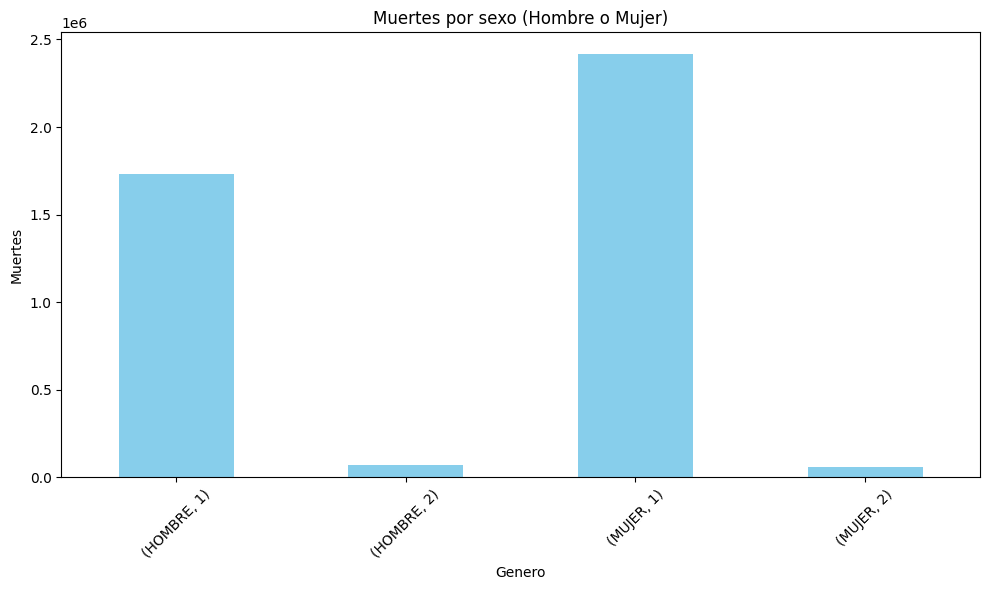

In [204]:
mortalidad = ds[ds['SEXO'].isin(['HOMBRE', 'MUJER'])].groupby('SEXO')['CONDICION_EGRESO'].value_counts()
plt.figure(figsize=(10, 6))
mortalidad.plot(kind='bar', color='skyblue')
plt.xlabel('Genero')
plt.ylabel('Muertes')
plt.title('Muertes por sexo (Hombre o Mujer)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Como se puede observar, se elaboró un gráfico de barras para examinar la condición de egreso de los pacientes clasificados por sexo. Cabe destacar que se tomó la decisión de no incluir a las personas no binarias, debido a la escasez de datos sobre este grupo. De hecho, la falta de información era tal que no se registraron fallecimientos de personas no binarias, además de tener una presencia prácticamente nula. A pesar de no ser consideradas en este gráfico, sí están incluidas en todos los demás análisis.

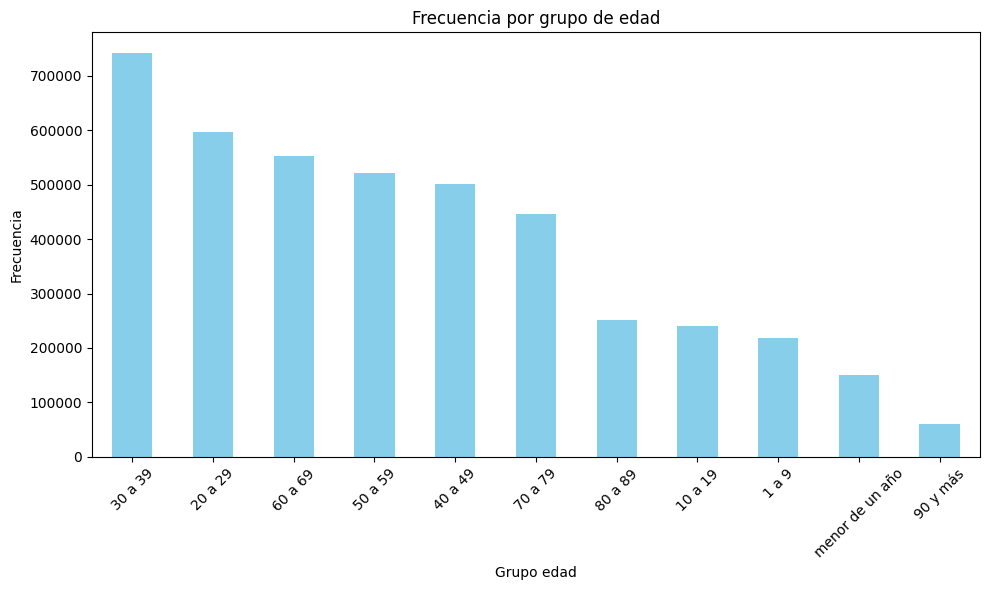

In [205]:
value_counts = ds['GRUPO_EDAD'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por grupo de edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El histograma muestra la distribución de grupos etarios, desde infantes menores de un año hasta personas mayores de 90 años, con un grupo para cada década, a excepción de los dos grupos mencionados anteriormente. Se observa una tendencia hacia las personas de entre 30 y 39 años, además de notar que entre los 20 y los 79 años se registra una mayor frecuencia que en los grupos fuera de ese rango de edad.

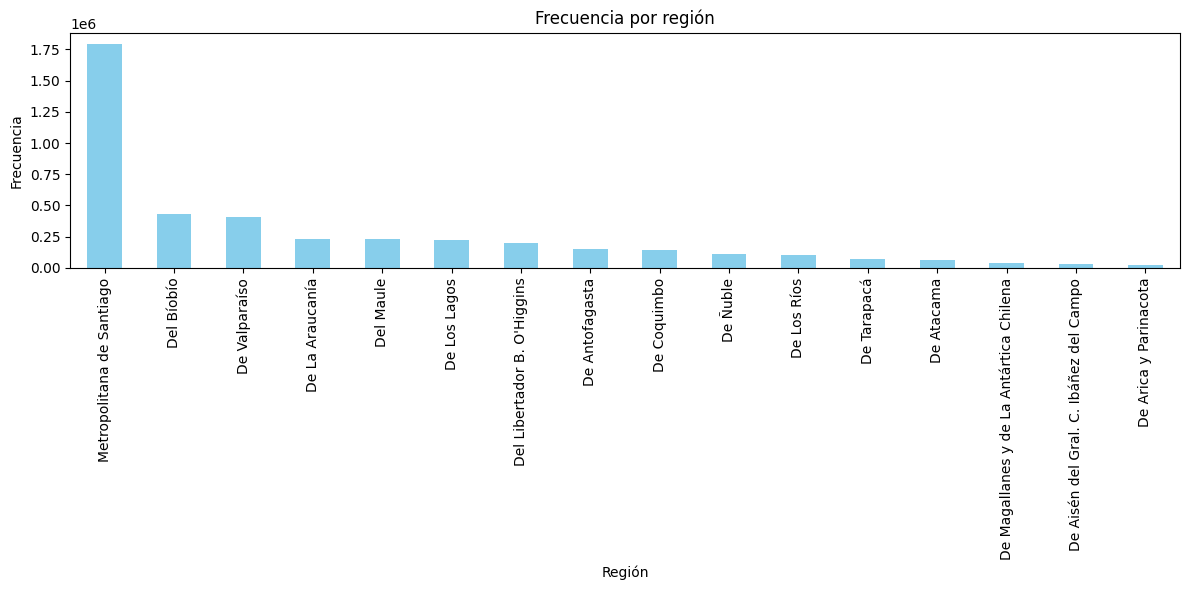

In [206]:
value_counts = ds['GLOSA_REGION_RESIDENCIA'].value_counts()

plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por región')
plt.tight_layout()
plt.show()

El histograma de frecuencias por región muestra una clara tendencia en la Región Metropolitana, lo cual es esperable debido a su gran cantidad de habitantes en comparación con las demás regiones.

C:\Users\fmarq\AppData\Local\Temp\ipykernel_11908\1449918692.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25197151392249023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_value_counts[region] = value_counts[region] / poblacion[region]


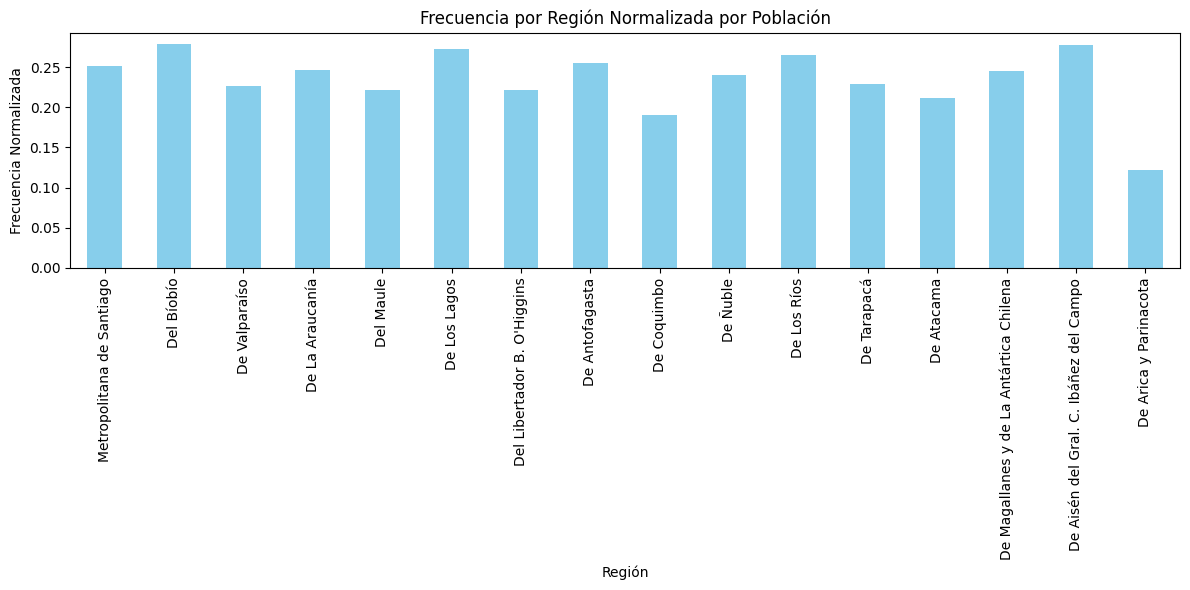

In [207]:
poblacion = {
    'De Tarapacá': 330558,
    'De Antofagasta': 607534,
    'De Atacama': 	286168,
    'De Coquimbo': 757586,
    'De Valparaíso': 1815902,
    'Del Libertador B. O\'Higgins': 914555,
    'Del Maule': 1044950,
    'Del Bíobío': 1556805,
    'De La Araucanía': 957224,
    'De Los Lagos': 828708,
    'De Aisén del Gral. C. Ibáñez del Campo': 103158,
    'De Magallanes y de La Antártica Chilena': 166533,
    'Metropolitana de Santiago': 7112808,
    'De Los Ríos': 384837,
    'De Arica y Parinacota': 226068,
    'De Ñuble': 480609
}

value_counts = ds['GLOSA_REGION_RESIDENCIA'].value_counts()

normalized_value_counts = value_counts.copy()
for region in value_counts.index:
    normalized_value_counts[region] = value_counts[region] / poblacion[region]

plt.figure(figsize=(12, 6))
normalized_value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Región')
plt.ylabel('Frecuencia Normalizada')
plt.title('Frecuencia por Región Normalizada por Población')
plt.tight_layout()
plt.show()

## Relaciones entre los datos

A continuación se muestra un gráfico en el que se puede ver la distribución de días de estadía de las personas conforme a si estas han sido intervenidas quirúrgicamente o no. Notamos que, considerando a las personas no operadas, la diferencia entre aquellas que solo pasan un día y aquellas que pasan más de 10 días es mucho menor con respecto a la diferencia de aquellas personas que sí han sido operadas, en donde se observa que cerca del 45% de las personas tienen una estadía de un día, mientras que menos de un 10% tiene una estadía de más de 10 días. En el caso de las personas no operadas ambos resultados son cercanos al 20% (22% aprox para 1 día de estadía y 17% aprox para una cantidad de días mayor a 10). Con esto, es posible concluir que las operaciones son relevantes al momento de considerar la cantidad de días de estadía de un paciente.

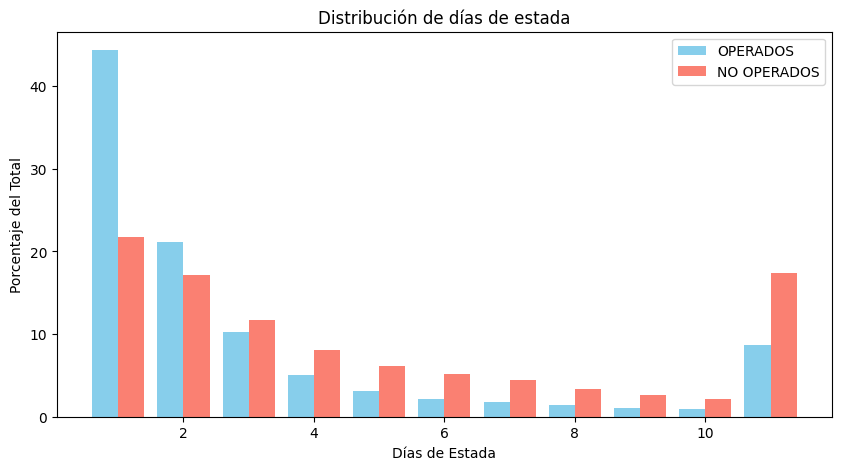

In [208]:
ds_op = ds_numeric[ds_numeric['INTERV_Q'] == 1]['DIAS_ESTADA']
ds_nop = ds_numeric[ds_numeric['INTERV_Q'] == 2]['DIAS_ESTADA']

ds_op_counts = ds_op.value_counts()
ds_nop_counts = ds_nop.value_counts()

total_op = ds_op_counts.sum()
total_nop = ds_nop_counts.sum()
ds_op_percentages = ds_op_counts / total_op * 100
ds_nop_percentages = ds_nop_counts / total_nop * 100

plt.figure(figsize=(10, 5))

plt.bar(ds_op_percentages.index - 0.2, ds_op_percentages.values, width=0.4, color='skyblue', label='OPERADOS')
plt.bar(ds_nop_percentages.index + 0.2, ds_nop_percentages.values, width=0.4, color='salmon', label='NO OPERADOS')

plt.title('Distribución de días de estada')
plt.xlabel('Días de Estada')
plt.ylabel('Porcentaje del Total')
plt.legend()

plt.show()

De manera similar al gráfico anterior, en este también se puede observar la distribución de días, esta vez considerando la pertenencia del paciente al sistema nacional de salud (SNS). Aquí, considerando al grupo que no pertenecen al SNS, se puede observar claramente que la diferencia entre la cantidad de personas que pasan un día en el establecimiento (cerca del 50% del total) y aquellas que pasan más de 10 días (menos del 10%) es mucho mayor que en el caso de las personas que sí pertenecen al SNS, donde ambos porcentajes son relativamente similares (cerca del 20%). Luego también se distingue que la pertenencia al SNS es relevante al momento de analizar la cantidad de días de estadía.

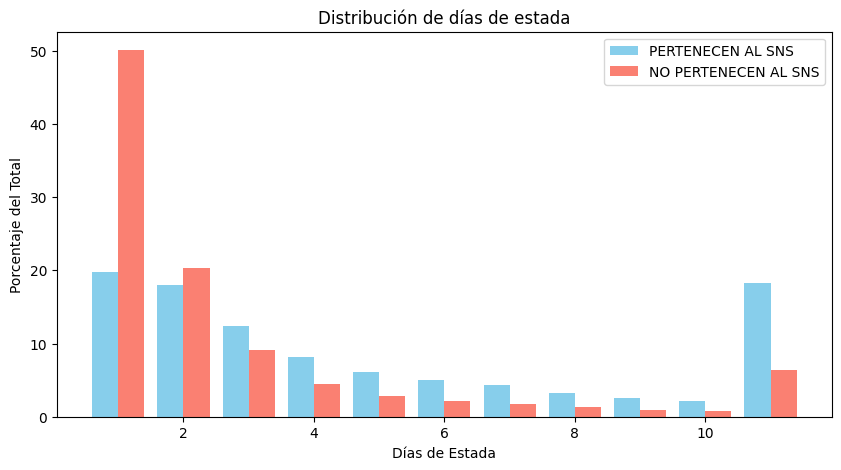

In [209]:
ds_ssn = ds_numeric[ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'] == 1]['DIAS_ESTADA']
ds_nssn = ds_numeric[ds_numeric['PERTENENCIA_ESTABLECIMIENTO_SALUD'] == 2]['DIAS_ESTADA']
ds_ssn_counts = ds_ssn.value_counts()
ds_nssn_counts = ds_nssn.value_counts()
total_ssn = ds_ssn_counts.sum()
total_nssn = ds_nssn_counts.sum()
ds_ssn_percentages = ds_ssn_counts / total_ssn * 100
ds_nssn_percentages = ds_nssn_counts / total_nssn * 100

plt.figure(figsize=(10, 5))
plt.bar(ds_ssn_percentages.index - 0.2, ds_ssn_percentages.values, width=0.4, color='skyblue', label='PERTENECEN AL SNS')
plt.bar(ds_nssn_percentages.index + 0.2, ds_nssn_percentages.values, width=0.4, color='salmon', label='NO PERTENECEN AL SNS')

plt.title('Distribución de días de estada')
plt.xlabel('Días de Estada')
plt.ylabel('Porcentaje del Total')
plt.legend()

plt.show()

Este bloque de código se centra en analizar y visualizar las diferencias en las estadías hospitalarias entre pacientes que fueron operados y aquellos que no lo fueron, desglosado por regiones de Chile. El análisis comienza con la agrupación de los datos del conjunto de egresos hospitalarios, calculando la estadía promedio para cada combinación de región y categoría de intervención quirúrgica.

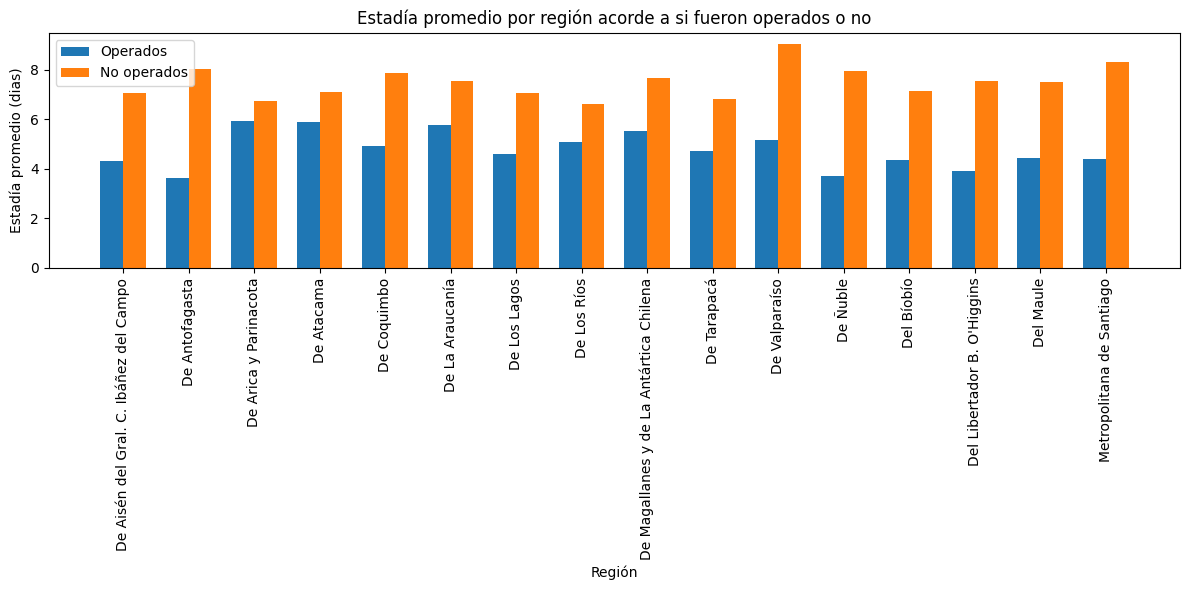

In [210]:

avg_days_table = ds.groupby(['GLOSA_REGION_RESIDENCIA', 'INTERV_Q'])['DIAS_ESTADA'].mean().reset_index()
avg_days_pivot = avg_days_table.pivot_table(index='GLOSA_REGION_RESIDENCIA', columns='INTERV_Q', values='DIAS_ESTADA', fill_value=0)
avg_days_pivot.reset_index(inplace=True)
num_bars = avg_days_pivot.shape[0]
bar_width = 0.35
x = np.arange(num_bars)
regions = avg_days_pivot['GLOSA_REGION_RESIDENCIA']
interq_1_data = avg_days_pivot[1]
interq_2_data = avg_days_pivot[2]


plt.figure(figsize=(12, 6))
plt.bar(x, interq_1_data, width=bar_width, label='Operados')
plt.bar(x + bar_width, interq_2_data, width=bar_width, label='No operados')
plt.xlabel('Región')
plt.ylabel('Estadía promedio (dias)')
plt.title('Estadía promedio por región acorde a si fueron operados o no')
plt.xticks(x + bar_width / 2, regions, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


El gráfico resultante muestra claramente si existen diferencias significativas en la duración de las estadías entre los dos grupos de pacientes a lo largo de las regiones, facilitando así la identificación de patrones o necesidades específicas de gestión hospitalaria. Esta visualización es crucial para los administradores hospitalarios y los planificadores de políticas de salud, proporcionando una base sólida para tomar decisiones informadas sobre la asignación de recursos y la mejora de los protocolos de atención.

A continuación, vemos la frecuencia de enfermedades para todas las cantidades de estadía posibles en nuestro dataframe ds_categorical. Para cada valor disinto, guardamos las frecuencias por enfermedad en una lista.

In [211]:
unique_values = ds_categorical['DIAS_ESTADA'].unique().tolist()
int_values = [val for val in unique_values if isinstance(val, int)]
str_value = [val for val in unique_values if isinstance(val, str)]
int_values.sort()
unique_values = int_values + str_value
dias = []
for dia in unique_values:
    ds_dias = ds_categorical[ds_categorical['DIAS_ESTADA']==dia]
    dias.append((ds_dias['DIAG1'].value_counts(),dia) )

Por último, con el objetivo de visualizar y comprender la caracterización de los distintos días de estadía en relación con las enfermedades que llevan a estos períodos, a continuación se muestran gráficos de torta para mostrar la distribución de los diagnósticos más comunes para diferentes las distintas cantidades de días que se quedan los pacientes (Utilizando ds_categorical). Cada gráfico de torta representa un día de estadía específico y muestra los 10 diagnósticos más frecuentes durante ese período. Los colores en los gráficos de torta se asignan de manera consistente para cada diagnóstico en todos los gráficos, lo que facilita la comparación entre los diferentes períodos de estadía. Cada sector del gráfico de torta representa un diagnóstico y el tamaño del sector indica la proporción de casos asociados con ese diagnóstico en el período de estadía correspondiente.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmarq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


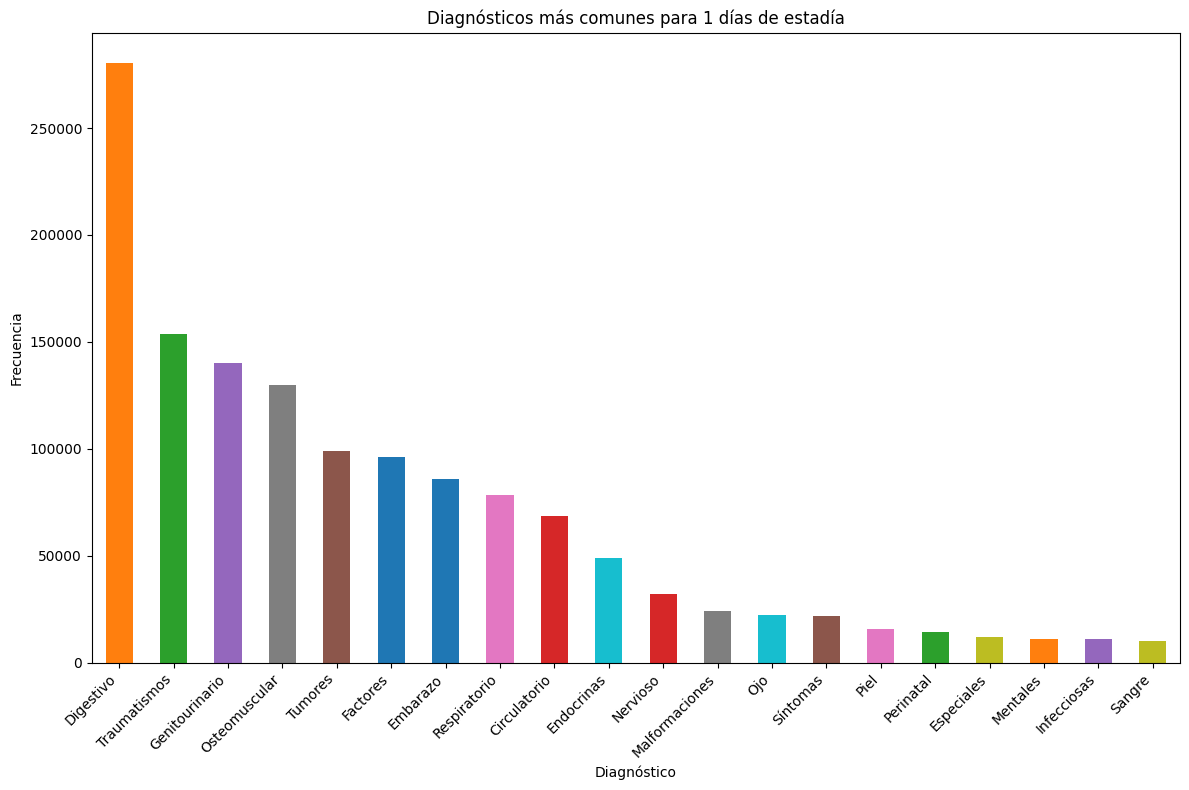

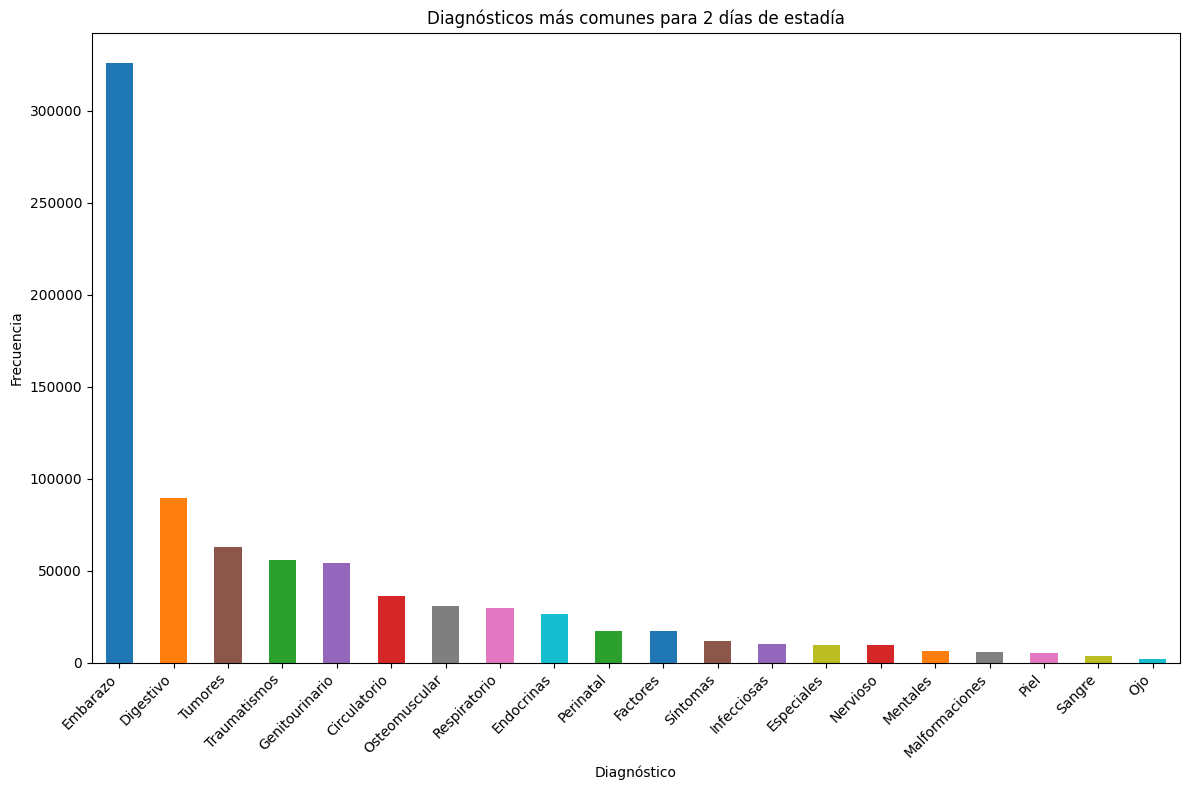

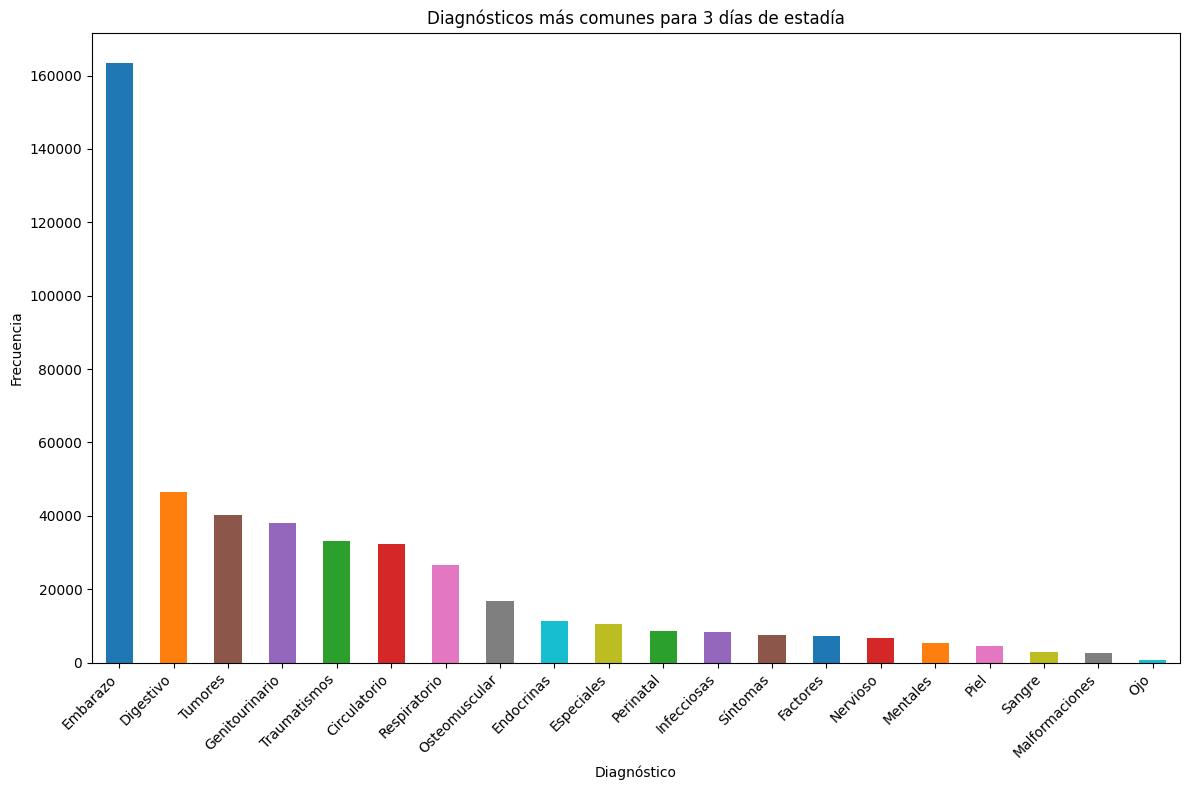

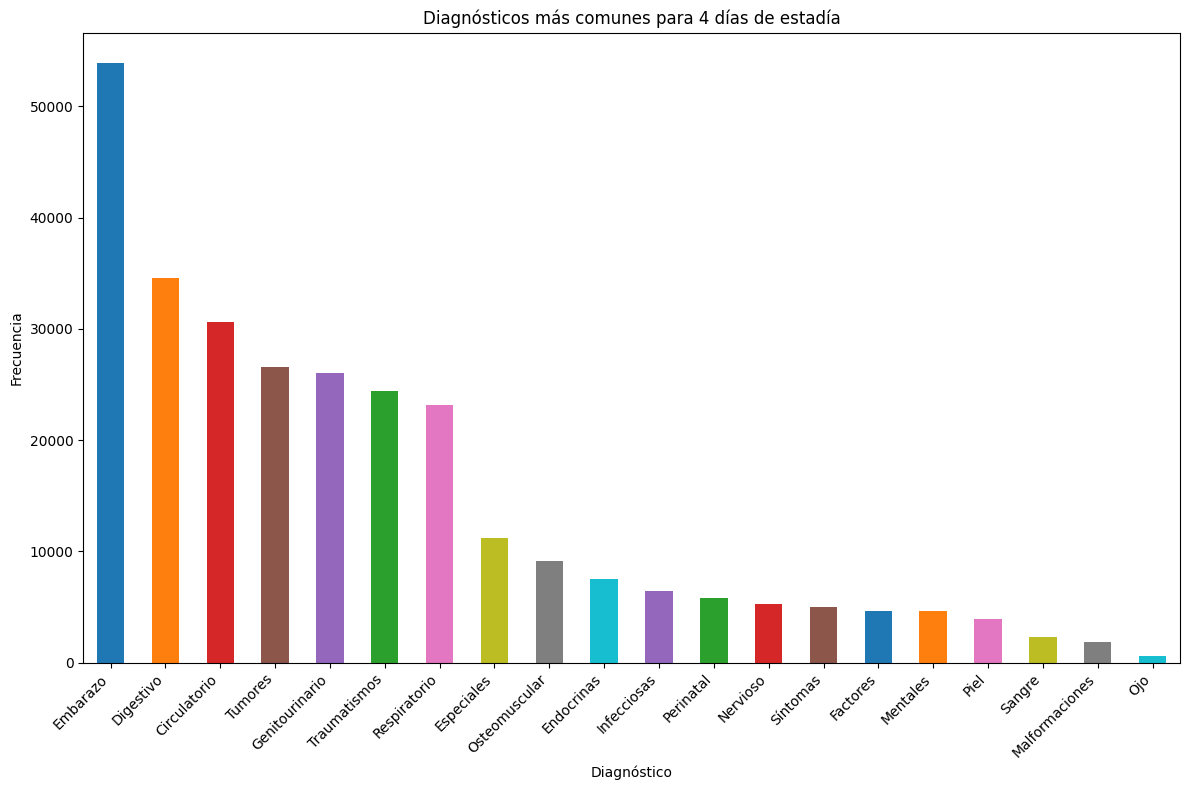

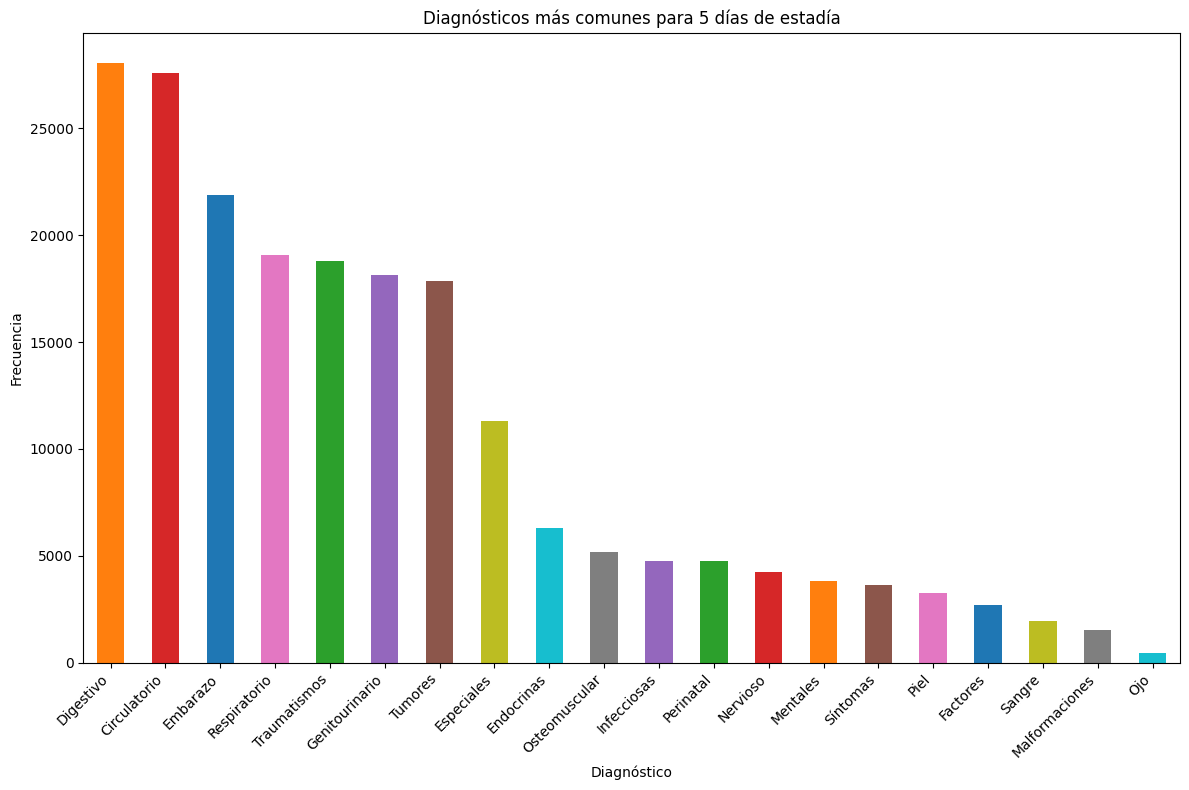

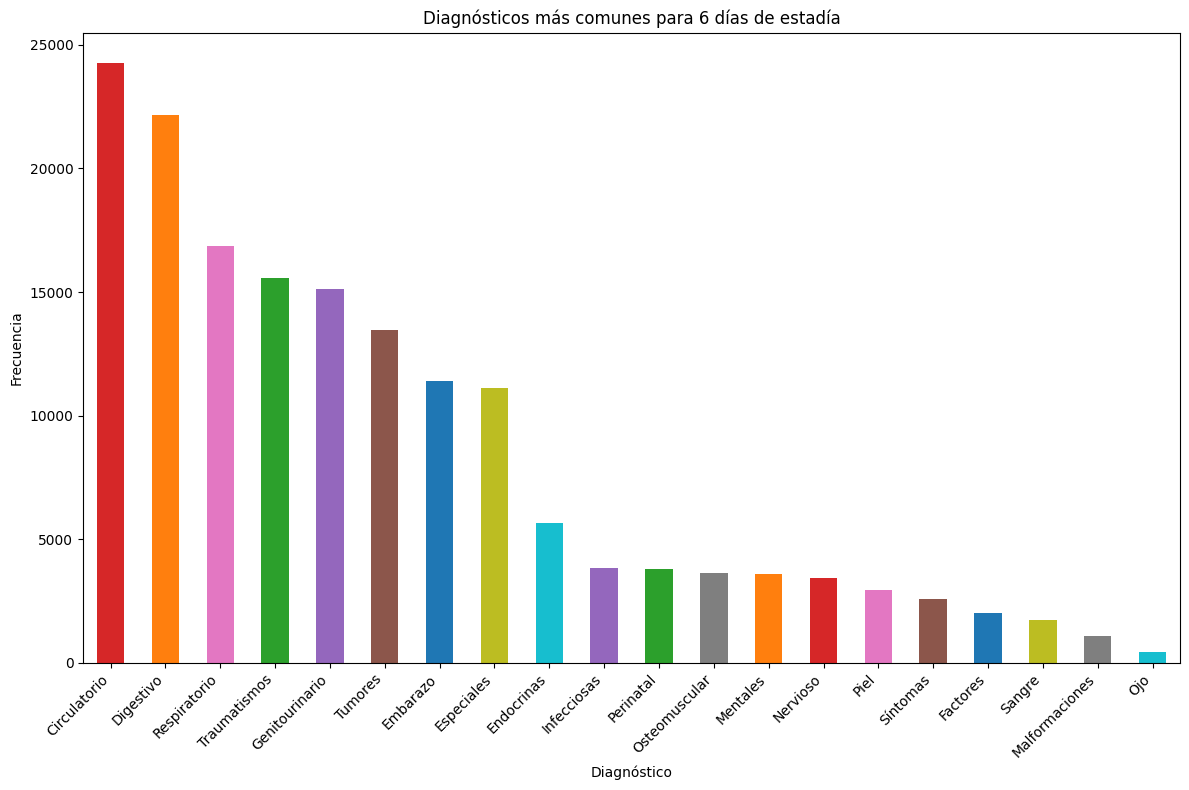

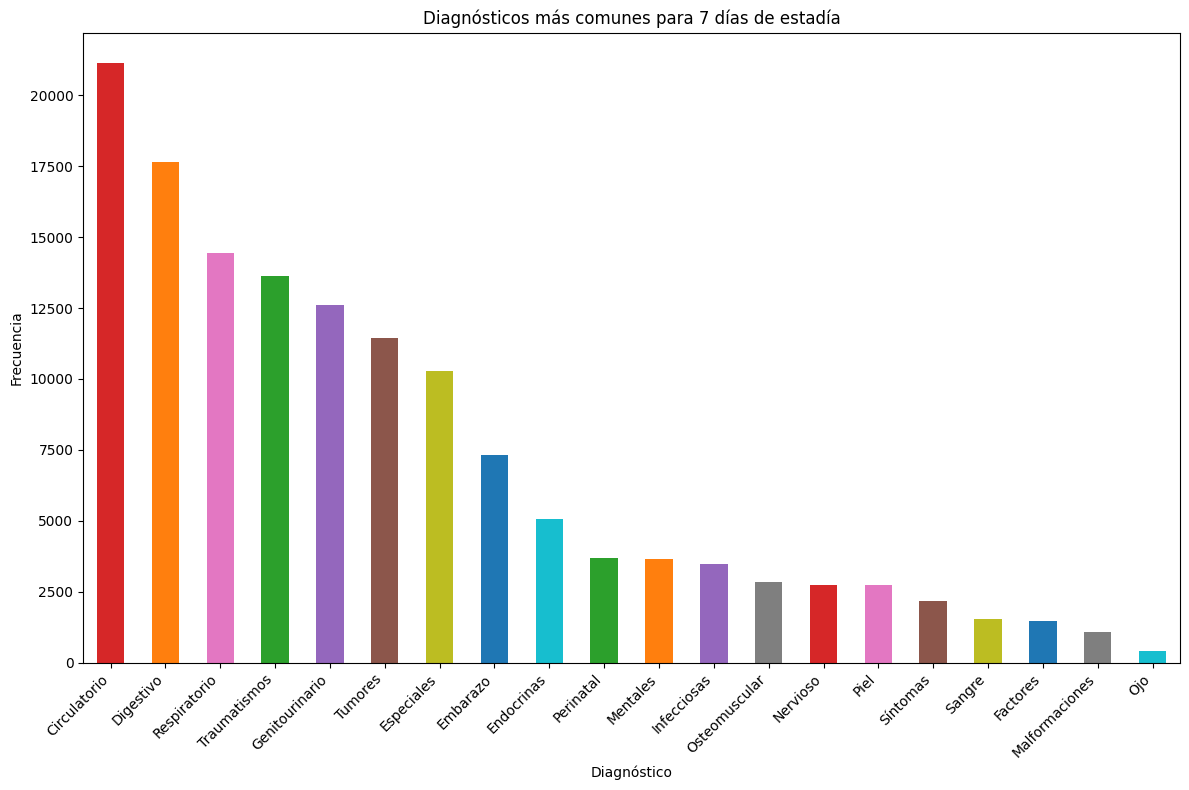

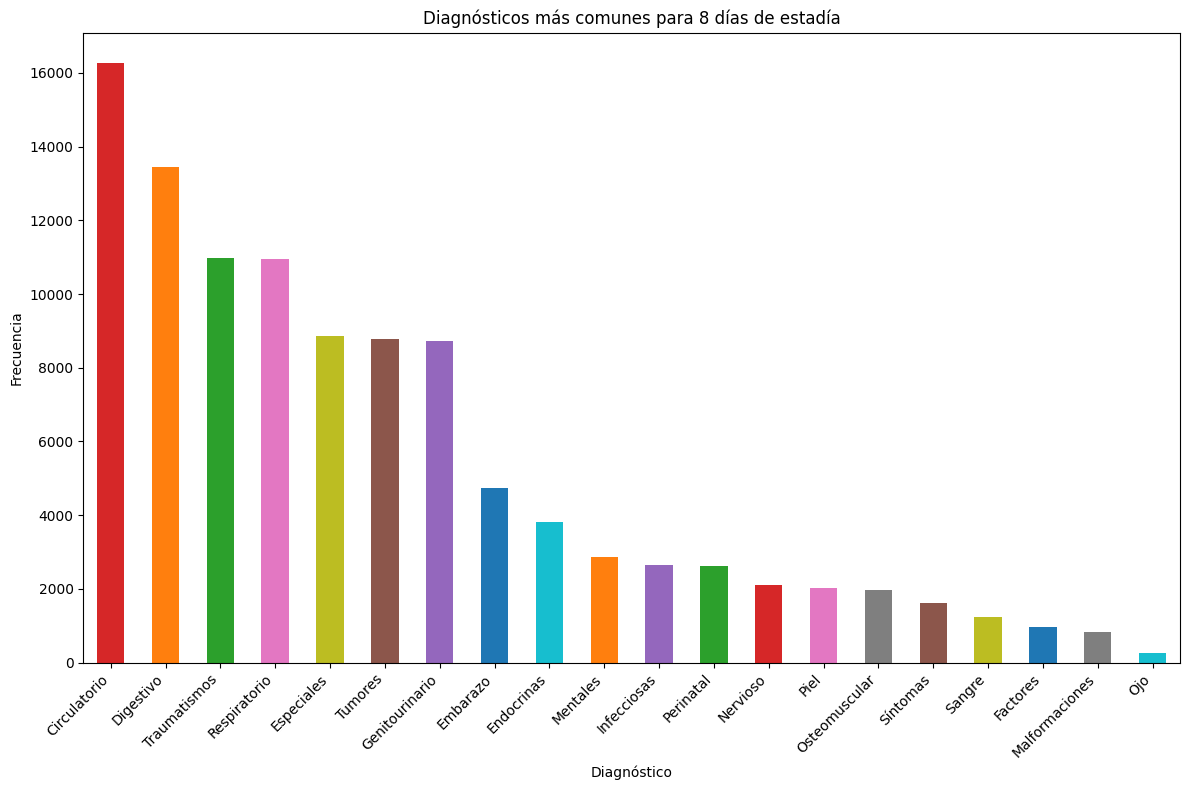

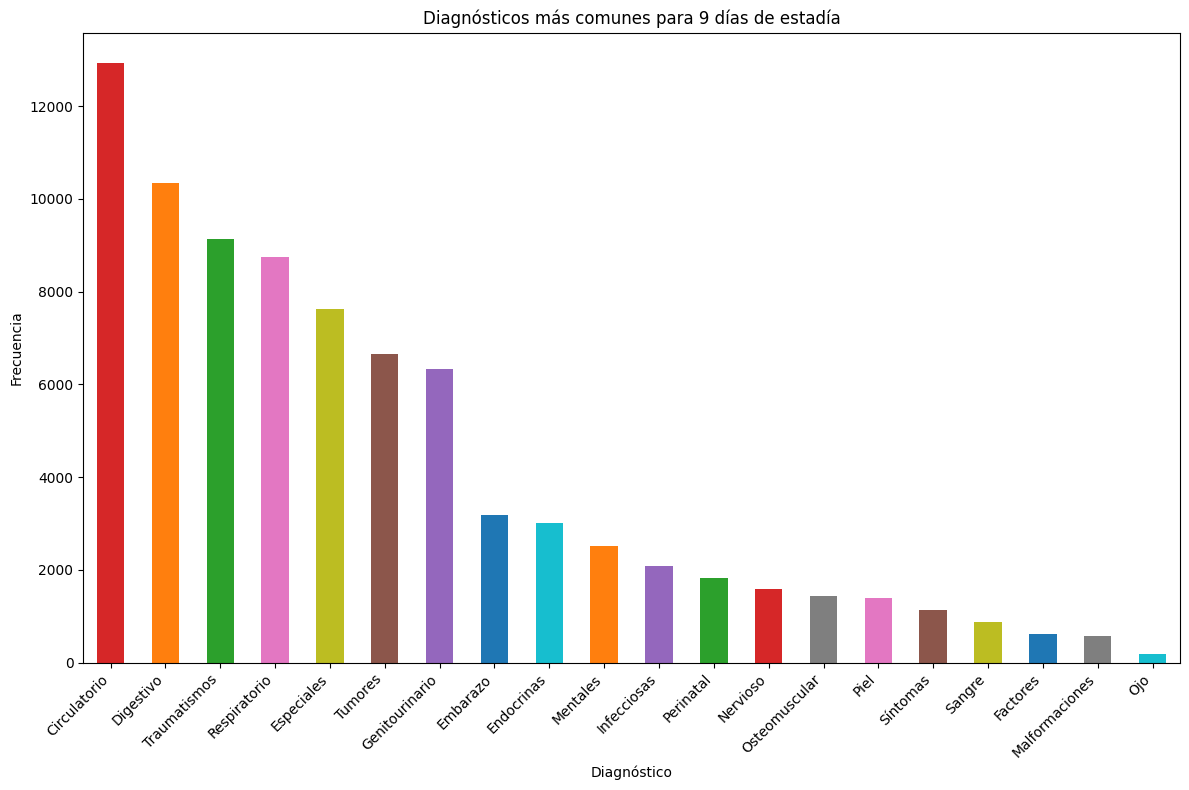

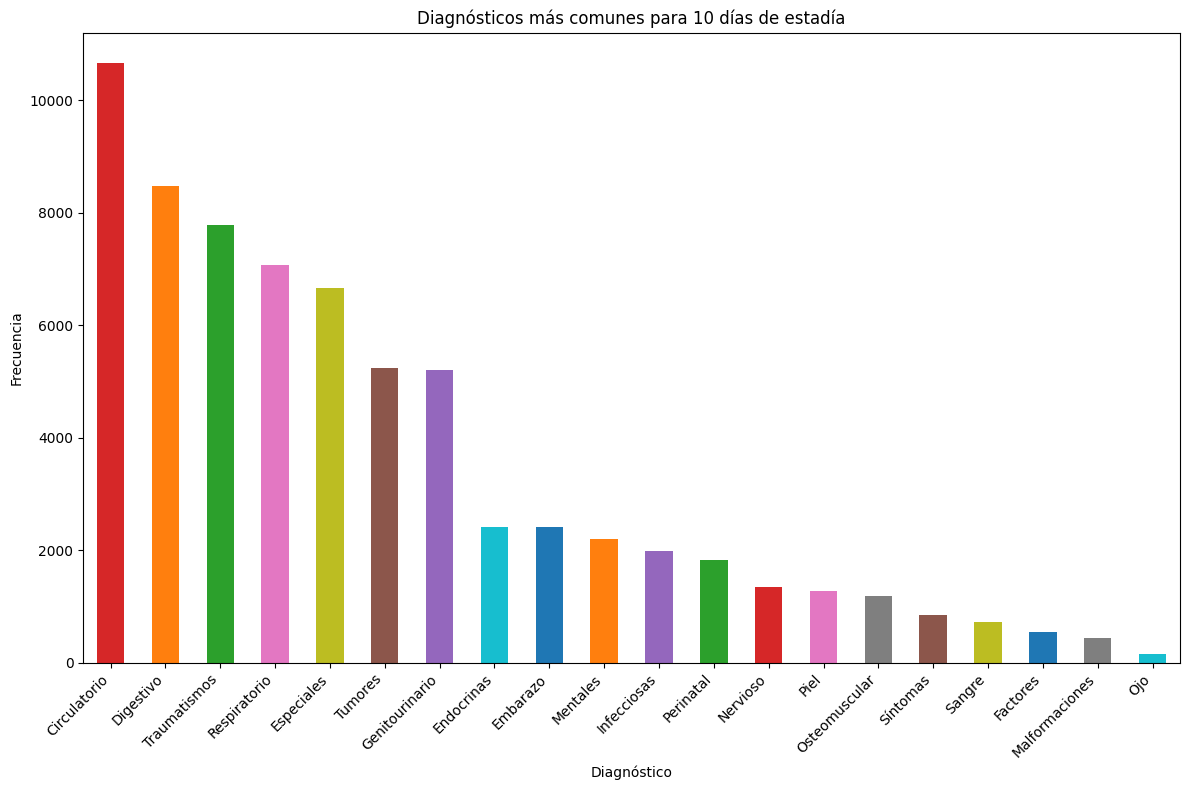

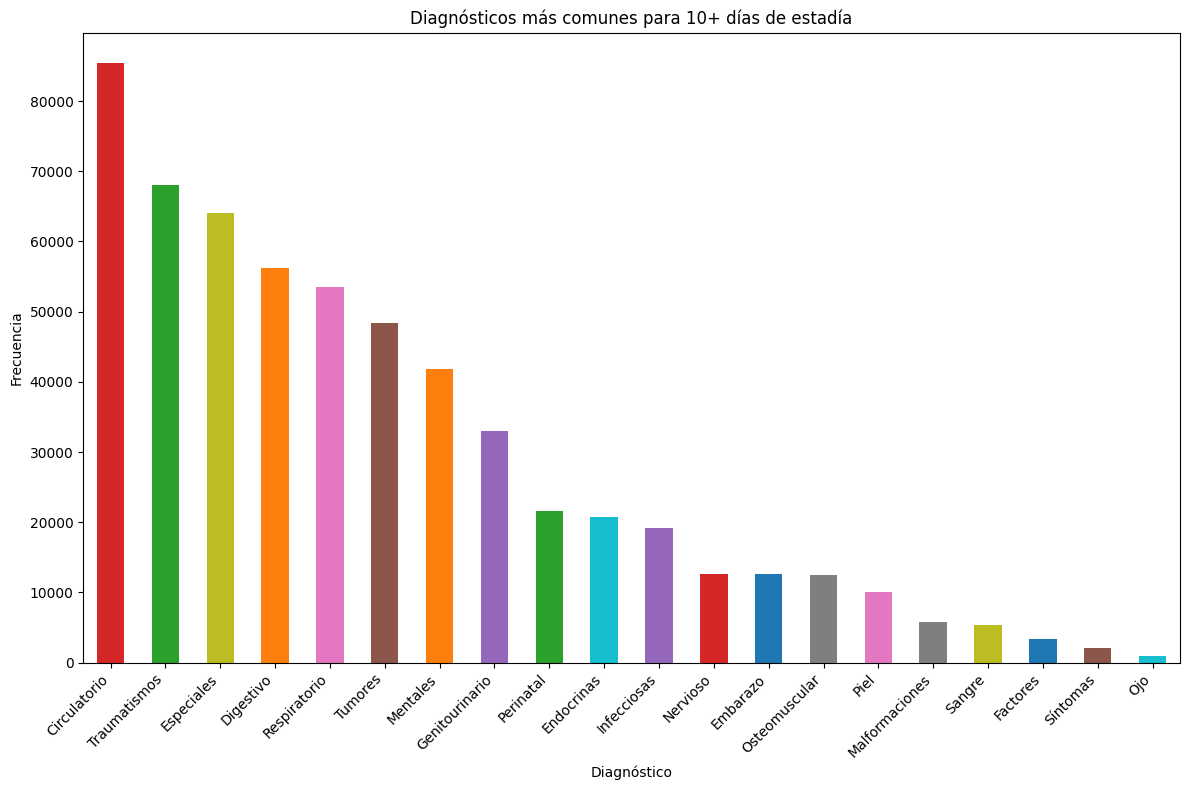

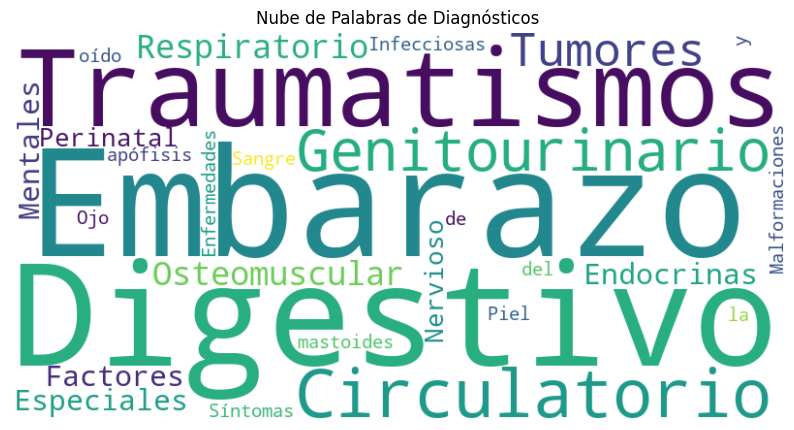

In [308]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

#descargar stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

#crear un diccionario de abreviaciones para los diagnósticos más comunes
abbreviations = {
    'Embarazo, parto y puerperio': 'Embarazo',
    'Enfermedades del sistema digestivo': 'Digestivo',
    'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas': 'Traumatismos',
    'Enfermedades del sistema circulatorio': 'Circulatorio',
    'Enfermedades del sistema genitourinario': 'Genitourinario',
    'Tumores [Neoplasias]': 'Tumores',
    'Enfermedades del sistema respiratorio': 'Respiratorio',
    'Enfermedades del sistema osteomuscular y del tejido conjuntivo': 'Osteomuscular',
    'Códigos para propósitos especiales': 'Especiales',
    'Enfermedades endocrinas, nutricionales y metabólicas': 'Endocrinas',
    'Factores que influyen en el estado de salud y contacto con los  servicios de salud': 'Factores',
    'Trastornos mentales y del comportamiento': 'Mentales',
    'Ciertas afecciones originadas en el período perinatal': 'Perinatal',
    'Enfermedades del sistema nervioso central': 'Nervioso',
    'Ciertas enfermedades infecciosas y parasitarias': 'Infecciosas',
    'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte': 'Síntomas',
    'Enfermedades de la piel y del tejido subcutáneo': 'Piel',
    'Malformaciones congénitas, deformidades y anomalías cromosómicas': 'Malformaciones',
    'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad': 'Sangre',
    'Enfermedades del ojo y sus anexos': 'Ojo'
}

#limpiar los nombres de diagnósticos en el DataFrame
ds_categorical['DIAG1'] = ds_categorical['DIAG1'].str.strip()

#reemplazar los nombres largos por abreviaciones en el DataFrame
ds_categorical['DIAG1'] = ds_categorical['DIAG1'].replace(abbreviations)

global_diag_counts = ds_categorical['DIAG1'].value_counts()

#seleccionar los 20 diagnósticos más recurrentes globales
top_20_diags = global_diag_counts.nlargest(20)

#crear un mapa de colores para los diagnósticos
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.values())
color_map = {diag: colors[i % len(colors)] for i, diag in enumerate(top_20_diags.index)}

#recorrer los días de estadía y generar gráficos
unique_values = ds_categorical['DIAS_ESTADA'].unique().tolist()
int_values = [val for val in unique_values if isinstance(val, int)]
str_values = [val for val in unique_values if isinstance(val, str)]
int_values.sort()
unique_values = int_values + str_values

for dia in unique_values:
    ds_dias = ds_categorical[ds_categorical['DIAS_ESTADA'] == dia]
    counts = ds_dias['DIAG1'].value_counts().sort_values(ascending=False)  #ordenar por frecuencia
    counts = counts.head(20)  #seleccionar los 20 más recurrentes
    
    #asignar colores a las barras
    bar_colors = [color_map.get(diag, '#333333') for diag in counts.index]
    
    plt.figure(figsize=(12, 8))
    counts.plot(kind='bar', color=bar_colors)
    plt.title(f'Diagnósticos más comunes para {dia} días de estadía')
    plt.xlabel('Diagnóstico')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#excluir palabras no deseadas y generar una cadena de diagnósticos
exclusion_words = ["la", "y", "del", "de"]  # Palabras a excluir
all_diagnoses = ""

for diag in global_diag_counts.index:
    #verificar si el diagnóstico contiene palabras objetivo
    if not any(word in diag for word in exclusion_words):
        all_diagnoses += f"{diag} "  #agregar diagnóstico a la cadena

#generar una nube de palabras para representar la frecuencia de enfermedades global
filtered_diagnoses = [diag for diag in global_diag_counts.index if diag not in stop_words]
all_diagnoses = ' '.join(filtered_diagnoses)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_diagnoses)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Diagnósticos')
plt.show()

Con estos gráficos se puede empezar a crear una relación entre los diagnosticos y el tiempo de estadía del paciente. Con respecto a la nube, si  bien no nos brinda datos concretos sobre las distintas enfermedades, nos permite contextualizarnos con respecto a las enfermedades más comunes (Y con un lenguaje más entendible).

# Preguntas y problemas

La capacidad de predecir la duración de la estadía de un paciente adquiere una relevancia crucial. Esta predicción proporciona un entendimiento más profundo de cuán saturado puede estar un hospital, en relación con su tasa de ocupación, y cómo esta situación podría evolucionar en el futuro.

Al comprender mejor la duración esperada de la estadía de los pacientes, los administradores hospitalarios pueden anticipar y planificar de manera más efectiva la distribución de recursos, como camas, personal médico y suministros. Esta anticipación permite una respuesta más ágil a las necesidades de atención médica de la población, evitando la saturación y mejorando la calidad del servicio ofrecido.

De estas maneras las preguntas a responder durante el transcurso del proyecto serán:

¿Se puede predecir la cantidad de días de estadía de un paciente sabiendo su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica?

¿Se pueden clasificar los pacientes en grupos con distinto nivel de urgencia de atención según  su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica?

¿Cuáles son los factores que más influyen en la condición de egreso del paciente (si sobrevive o no) considerando variables como edad, sexo, región, pertenencia al sistema nacional de salud, diagnóstico principal y si fue intervenido quirúrgicamente?


# Aportes personales

Para lograr completar el proyecto, el equipo de trabajo se repartió las labores de la siguiente manera:

Claudio Morel: Desarrollo el componente visual  de la presentación grupal, realizó los gráficos de "Operados y No operados" y "Pertenecientes y no pertenecientes al SNS" y también concretó las preguntas finales del proyecto. Además ayudó a la limpieza y modificación de atributos y con la redacción general del informe.

Damián Gonzalez: Aportó al analisis inicial de los datos, ayudando a identificar la motivación. Además, se dedicó a explicar y crear los gráficos generados en la sección de exploracción de datos. Además ayudó a la limpieza y modificación de atributos y con la redacción general del informe.

Joaquín Gonzalez: Desarrollo y explico el apartado de visualización de la exploración y además aportó en la creación general de los gráficos del proyecto. Además ayudó a la redacción general del informe.

Nicolás Soto: Se dedicó en gran parte a la implementación técnica para la creación de gráficos y ayudó a la explicación del código asociado a esto. Además ayudó a la redacción general del informe.

Francisco Márquez: Trabajó principalmente en la manipulación directa de los datos, generando los filtraciones de datos y la reasignación de valores de los atributos. También generó código para la creación de los gráficos, en particular para ilustrar la limpieza (Gráficos de boxplot) y el gráfico de "Estadía promedio por región". Además ayudó a la redacción general del informe.

# Hito 2 y 3: Experimentos y resultados relevantes

En este apartado, se presentará el desarrollo de los experimentos correspondientes a cada una de las 3 preguntas seleccionadas anteriormente. Además se hará un estudio de los resultados obtenidos en cada uno.

## Pregunta 1

### ¿Se puede predecir la cantidad de días de estadía de un paciente sabiendo su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica?

Para poder realizar esta clasificación, en primer lugar definimos 3 clases con el fin de dar un mejor margen de predicción al modelo. Nuestras clases objetivo serán:

- 1-3 días: Estancia Corta
- 4-8 días: Estancia Media
- 9 días o más: Estancia Larga

Ahora, para el modelo utilizaremos las características de rango etario, sexo, pertenencia al sistema de salud nacional, diagnóstico, operación y región. La inclusión de la región se debe a que, aunque la frecuencia por región normalizada por la cantidad de habitantes no varíe significativamente, se observa que la región puede afectar la estadía del paciente dependiendo de si fue operado o no.

Este modelo será entrenado utilizando una partición de 70-30 de los datos. Para encontrar los mejores parámetros posibles, utilizaremos diferentes algoritmos de clasificación vistos en el curso.

En primer lugar, se realizará un mapeo de los atributos que no sean valores numéricos, además de la creación de las clases mencionadas anteriormente. Luego, se llevará a cabo una búsqueda en cuadrícula (GridSearch) con un subconjunto del dataset para cada modelo, con el objetivo de encontrar los parámetros óptimos para el entrenamiento del modelo. Se realizará una comparación de las métricas de los modelos con el subconjunto de datos, para finalmente entrenar los algoritmos seleccionados con los mejores resultados utilizando el dataset completo.

Los modelos resultantes de estas técnicas serán evaluados con métricas como precisión, recall, F1-score y matrices de confusión.

1. Mapeo de datos

Transformamos el sexo del paciente tal que es 1 si es hombre, 2 si es mujer y 3 si es indeterminado

In [ ]:
ds_exp = ds_numeric.copy()
ds_exp['SEXO'] = ds_exp['SEXO'].apply(lambda x: 1 if x == 'HOMBRE' else 2 if x == 'MUJER' else 3 if x == 'INTERSEX (INDETERMINDADO)' else x)

Como los grupos etarios son un string que describe el rango utilizamos un diccionario para convertirlos en un string

In [ ]:
mapeo_edades = {
    'menor de un año': 0,
    '1 a 9': 1,
    '10 a 19': 2,
    '20 a 29': 3,
    '30 a 39': 4,
    '40 a 49': 5,
    '50 a 59': 6,
    '60 a 69': 7,
    '70 a 79': 8,
    '80 a 89': 9,
    '90 y más': 10
}

ds_exp['GRUPO_EDAD'] = ds_exp['GRUPO_EDAD'].map(mapeo_edades)

Utilizando los valores unique de le asignamos un id a cada diagnóstico

In [ ]:
mapeo_diagnostico = {
    'Malformaciones congénitas, deformidades y anomalías cromosómicas': 1,
    'Factores que influyen en el estado de salud y contacto con los  servicios de salud': 2,
    'Enfermedades del sistema genitourinario': 3,
    'Enfermedades del sistema respiratorio ': 4,
    'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas': 5,
    'Enfermedades de la piel y del tejido subcutáneo': 6,
    'Enfermedades del ojo y sus anexos ': 7,
    'Enfermedades del sistema digestivo': 8,
    'Enfermedades del sistema circulatorio ': 9,
    'Ciertas enfermedades infecciosas y parasitarias': 10,
    'Enfermedades del sistema osteomuscular y del tejido conjuntivo': 11,
    'Enfermedades del sistema nervioso central': 12,
    'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ': 13,
    'Enfermedades endocrinas, nutricionales y metabólicas': 14,
    'Códigos para propósitos especiales': 15,
    'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte': 16,
    'Tumores [Neoplasias]': 17,
    'Enfermedades del oído y de la apófisis mastoides': 18,
    'Trastornos mentales y del comportamiento': 19,
    'Ciertas afecciones originadas en el período perinatal': 20,
    'Embarazo, parto y puerperio': 21
}

ds_exp['DIAG1'] = ds_exp['DIAG1'].map(mapeo_diagnostico)

Detectamos que algunas regiones tenían su número como string, por lo que transformamos los valores a int

In [ ]:
ds_exp['REGION_RESIDENCIA'] = ds_exp['REGION_RESIDENCIA'].apply(lambda x: int(x))

Finalmente dropeamos los valores con diagnóstico NaN

In [ ]:
ds_exp = ds_exp.dropna(subset=['DIAG1'])

También para hacer más fácil el entrenamiento de los modelos dropeamos las columnas que no se ocupan para el entrenamiento

In [ ]:
features = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'REGION_RESIDENCIA', 'DIAG1', 'INTERV_Q']
target = 'DIAS_ESTADA'

columns_to_drop = [col for col in ds_exp.columns if col not in features + [target]]

ds_exp = ds_exp.drop(columns=columns_to_drop)

Antes de entrenar debes verificar si nuestras clases estan desbalanceadas

In [ ]:
conteo = ds_numeric["DIAS_ESTADA"].value_counts()

corta = conteo.loc[1:3].sum()
media = conteo.loc[4:8].sum()
larga = conteo.loc[9:].sum()

print(f'Estancia Corta: {corta}')
print(f'Estancia Media: {media}')
print(f'Estancia Larga: {larga}')

Estancia Corta: 3226876
Estancia Media: 904171
Estancia Larga: 150843


Para manejar el desbalanceo, aplicaremos oversampling y subsampling. El entrenamiento se realizará en tres conjuntos.

2. GridSearch

Para buscar los hiperparámetros, utilizaremos un subsample de 100,000 datos para hacer esta tarea menos costosa, además de crear las clases objetivos.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

features = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'REGION_RESIDENCIA', 'DIAG1', 'INTERV_Q']
target = 'DIAS_ESTADA'

sample_size = 100000

ds_sample = ds_exp.sample(n=sample_size, random_state=0)

data = ds_sample[features + [target]]

clases = {
    'Estancia Corta': [1, 2, 3],
    'Estancia Media': [4, 5, 6, 7, 8],
    'Estancia Larga': list(range(9, max(data[target]) + 1))
}


data['DIAS_ESTADA'] = pd.cut(data['DIAS_ESTADA'], bins=[0, 3, 8, float('inf')], labels=clases.keys(), right=False)

X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


Creamos conjuntos de entrenamiento con oversampling.

In [ ]:

X_train_oversampled = X_train.reset_index(drop=True)
y_train_oversampled = y_train.reset_index(drop=True)

num_instances_majority_class = y_train_oversampled.value_counts().max()

for class_name in y_train_oversampled.unique():
    if (y_train_oversampled == class_name).sum() < num_instances_majority_class:
        idx = np.random.choice(y_train_oversampled[y_train_oversampled == class_name].index, size=num_instances_majority_class - (y_train_oversampled == class_name).sum())
        X_train_oversampled = pd.concat([X_train_oversampled, X_train_oversampled.loc[idx]])
        y_train_oversampled = pd.concat([y_train_oversampled, y_train_oversampled.loc[idx]])


Creamos conjuntos de entrenamiento con subsampling.

In [ ]:

X_train_subsampled = X_train.reset_index(drop=True)
y_train_subsampled = y_train.reset_index(drop=True)

num_instances_minority_class = y_train_subsampled.value_counts().min()

for class_name in y_train_subsampled.unique():
    if (y_train_subsampled == class_name).sum() > num_instances_minority_class:
        idx = np.random.choice(y_train_subsampled[y_train_subsampled == class_name].index, size=(y_train_subsampled == class_name).sum() - num_instances_minority_class, replace=False)
        X_train_subsampled = X_train_subsampled.drop(idx)
        y_train_subsampled = y_train_subsampled.drop(idx)

Reasignamos los conjuntos de datos de entrenamiento a nombres más cortos para simplificar el código.

In [ ]:
# datos entrenamiento "originales"
X_orig = X_train
y_orig = y_train

# datos entrenamiento "oversampleados"
X_over = X_train_oversampled
y_over = y_train_oversampled

# datos entrenamiento "subsampleados"
X_subs = X_train_subsampled
y_subs = y_train_subsampled

GridSearch de Decision Tree en el conjunto de datos originales.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = {'criterion': ['gini', 'entropy'],
                    'max_depth': [3, 5, 7, 10]}

score = 'f1_weighted'

clf_orig = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    cv=10,
    scoring=score
)

clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(clf_orig.best_params_)

y_pred_orig = clf_orig.predict(X_test)
clf_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))

Mejor combinación de parámetros (original):
{'criterion': 'entropy', 'max_depth': 10}
                precision    recall  f1-score   support

Estancia Corta       0.66      0.80      0.73     15301
Estancia Larga       0.46      0.36      0.41      5799
Estancia Media       0.43      0.34      0.38      8900

      accuracy                           0.58     30000
     macro avg       0.52      0.50      0.50     30000
  weighted avg       0.56      0.58      0.56     30000



GridSearch de Decision Tree en el conjunto de datos oversampling.

In [ ]:
clf_over = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    cv=10,
    scoring=score
)

clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(clf_over.best_params_)

y_pred_over = clf_over.predict(X_test)
clf_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'criterion': 'entropy', 'max_depth': 10}
                precision    recall  f1-score   support

Estancia Corta       0.78      0.57      0.66     15301
Estancia Larga       0.39      0.68      0.50      5799
Estancia Media       0.41      0.40      0.40      8900

      accuracy                           0.54     30000
     macro avg       0.53      0.55      0.52     30000
  weighted avg       0.59      0.54      0.55     30000



GridSearch de Decision Tree en el conjunto de datos subsampling.

In [ ]:
clf_subs = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=tuned_parameters,
    cv=10,
    scoring=score
)

clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(clf_subs.best_params_)

y_pred_subs = clf_subs.predict(X_test)
clf_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'criterion': 'gini', 'max_depth': 10}
                precision    recall  f1-score   support

Estancia Corta       0.77      0.59      0.66     15301
Estancia Larga       0.38      0.72      0.49      5799
Estancia Media       0.42      0.34      0.37      8900

      accuracy                           0.54     30000
     macro avg       0.52      0.55      0.51     30000
  weighted avg       0.59      0.54      0.55     30000



Comparamos accuracy de los conjuntos.

In [ ]:
print("Accuracy (original):", clf_acc_orig)
print("Accuracy (oversampling):", clf_acc_over)
print("Accuracy (subsampling):", clf_acc_subs)

Accuracy (original): 0.5783666666666667
Accuracy (oversampling): 0.5409333333333334
Accuracy (subsampling): 0.5385333333333333


GridSearch de Naive Bayes en el conjunto de datos original.

In [ ]:
from sklearn.naive_bayes import GaussianNB

tuned_parameters = {'var_smoothing': np.logspace(0, -9, num=100)}

score = 'f1_weighted'

nb_clf_orig = GridSearchCV(
    GaussianNB(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

nb_clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(nb_clf_orig.best_params_)

y_pred_orig = nb_clf_orig.predict(X_test)
nb_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))

Mejor combinación de parámetros (original):
{'var_smoothing': 0.0005336699231206307}
                precision    recall  f1-score   support

Estancia Corta       0.63      0.71      0.67     15301
Estancia Larga       0.37      0.35      0.36      5799
Estancia Media       0.36      0.29      0.32      8900

      accuracy                           0.52     30000
     macro avg       0.45      0.45      0.45     30000
  weighted avg       0.50      0.52      0.51     30000



GridSearch de Naive Bayes en el conjunto de datos oversampling.

In [ ]:
nb_clf_over = GridSearchCV(
    GaussianNB(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

nb_clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(nb_clf_over.best_params_)

y_pred_over = nb_clf_over.predict(X_test)
nb_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'var_smoothing': 0.006579332246575682}
                precision    recall  f1-score   support

Estancia Corta       0.70      0.59      0.64     15301
Estancia Larga       0.33      0.64      0.44      5799
Estancia Media       0.35      0.23      0.28      8900

      accuracy                           0.49     30000
     macro avg       0.46      0.49      0.45     30000
  weighted avg       0.53      0.49      0.49     30000



GridSearch de Naive Bayes en el conjunto de datos subsampling.

In [ ]:
nb_clf_subs = GridSearchCV(
    GaussianNB(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

nb_clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(nb_clf_subs.best_params_)

y_pred_subs = nb_clf_subs.predict(X_test)
nb_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'var_smoothing': 0.006579332246575682}
                precision    recall  f1-score   support

Estancia Corta       0.70      0.59      0.64     15301
Estancia Larga       0.33      0.64      0.44      5799
Estancia Media       0.35      0.23      0.28      8900

      accuracy                           0.49     30000
     macro avg       0.46      0.49      0.45     30000
  weighted avg       0.53      0.49      0.49     30000



Comparamos accuracy de los conjuntos.

In [ ]:
print("Accuracy (original):", nb_acc_orig)
print("Accuracy (oversampling):", nb_acc_over)
print("Accuracy (subsampling):", nb_acc_subs)

Accuracy (original): 0.5180333333333333
Accuracy (oversampling): 0.49406666666666665
Accuracy (subsampling): 0.4933666666666667


GridSearch de Random Forest en el conjunto de datos original.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = {'n_estimators': [100, 200, 300], 
                    'max_depth': [None, 10, 20, 30],
                    'min_samples_split': [2, 5],
                    'min_samples_leaf': [1, 2]}

score = 'f1_weighted'

rd_clf_orig = GridSearchCV(
    RandomForestClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score,
    n_jobs=-1
)

rd_clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(rd_clf_orig.best_params_)

y_pred_orig = rd_clf_orig.predict(X_test)
rd_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))


Mejor combinación de parámetros (original):
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
                precision    recall  f1-score   support

Estancia Corta       0.65      0.82      0.73     15301
Estancia Larga       0.47      0.36      0.41      5799
Estancia Media       0.43      0.32      0.37      8900

      accuracy                           0.58     30000
     macro avg       0.52      0.50      0.50     30000
  weighted avg       0.55      0.58      0.56     30000



GridSearch de Random Forest en el conjunto de datos oversampling.

In [ ]:
rd_clf_over = GridSearchCV(
    RandomForestClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score,
    n_jobs=-1
)

rd_clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(rd_clf_over.best_params_)

y_pred_over = rd_clf_over.predict(X_test)
rd_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
                precision    recall  f1-score   support

Estancia Corta       0.75      0.59      0.66     15301
Estancia Larga       0.38      0.60      0.46      5799
Estancia Media       0.40      0.41      0.40      8900

      accuracy                           0.53     30000
     macro avg       0.51      0.53      0.51     30000
  weighted avg       0.58      0.53      0.55     30000



GridSearch de Random Forest con los en el conjunto de datos subsampling.

In [ ]:
rd_clf_subs = GridSearchCV(
    RandomForestClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score,
    n_jobs=-1
)

rd_clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(rd_clf_subs.best_params_)

y_pred_subs = rd_clf_subs.predict(X_test)
rd_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
                precision    recall  f1-score   support

Estancia Corta       0.77      0.58      0.66     15301
Estancia Larga       0.37      0.74      0.50      5799
Estancia Media       0.42      0.33      0.37      8900

      accuracy                           0.54     30000
     macro avg       0.52      0.55      0.51     30000
  weighted avg       0.59      0.54      0.54     30000



Comparamos accuracy de los conjuntos.

In [ ]:
print("Accuracy (original):", rd_acc_orig)
print("Accuracy (oversampling):", rd_acc_over)
print("Accuracy (subsampling):", rd_acc_subs)

Accuracy (original): 0.5793333333333334
Accuracy (oversampling): 0.5349333333333334
Accuracy (subsampling): 0.5359666666666667


GridSearch de K-Nearest Neighbors en el conjunto de datos original.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = {'n_neighbors': [1, 3, 5, 10],
                    'weights': ['uniform', 'distance']}

score = 'f1_weighted'

kn_clf_orig = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

kn_clf_orig.fit(X_orig, y_orig)

print("Mejor combinación de parámetros (original):")
print(kn_clf_orig.best_params_)

y_pred_orig = kn_clf_orig.predict(X_test)
kn_acc_orig = accuracy_score(y_test, y_pred_orig)
print(classification_report(y_test, y_pred_orig))


Mejor combinación de parámetros (original):
{'n_neighbors': 10, 'weights': 'uniform'}
                precision    recall  f1-score   support

Estancia Corta       0.65      0.80      0.72     15301
Estancia Larga       0.44      0.40      0.42      5799
Estancia Media       0.41      0.27      0.33      8900

      accuracy                           0.56     30000
     macro avg       0.50      0.49      0.49     30000
  weighted avg       0.54      0.56      0.54     30000



GridSearch de K-Nearest Neighbors en el conjunto de datos oversampling.

In [ ]:
kn_clf_over = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

kn_clf_over.fit(X_over, y_over)

print("Mejor combinación de parámetros (oversampling):")
print(kn_clf_over.best_params_)

y_pred_over = kn_clf_over.predict(X_test)
kn_acc_over = accuracy_score(y_test, y_pred_over)
print(classification_report(y_test, y_pred_over))


Mejor combinación de parámetros (oversampling):
{'n_neighbors': 10, 'weights': 'distance'}
                precision    recall  f1-score   support

Estancia Corta       0.66      0.75      0.71     15301
Estancia Larga       0.41      0.44      0.42      5799
Estancia Media       0.39      0.28      0.33      8900

      accuracy                           0.55     30000
     macro avg       0.49      0.49      0.49     30000
  weighted avg       0.53      0.55      0.54     30000



GridSearch de K-Nearest Neighbors en el conjunto de datos subsampling.

In [ ]:
kn_clf_subs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=tuned_parameters,
    cv=5,
    scoring=score
)

kn_clf_subs.fit(X_subs, y_subs)

print("Mejor combinación de parámetros (subsampling):")
print(kn_clf_subs.best_params_)

y_pred_subs = kn_clf_subs.predict(X_test)
kn_acc_subs = accuracy_score(y_test, y_pred_subs)
print(classification_report(y_test, y_pred_subs))


Mejor combinación de parámetros (subsampling):
{'n_neighbors': 10, 'weights': 'uniform'}
                precision    recall  f1-score   support

Estancia Corta       0.74      0.59      0.66     15301
Estancia Larga       0.38      0.63      0.47      5799
Estancia Media       0.39      0.35      0.37      8900

      accuracy                           0.53     30000
     macro avg       0.50      0.53      0.50     30000
  weighted avg       0.57      0.53      0.54     30000



Comparamos accuracy de los conjuntos.

In [ ]:
print("Accuracy (original):", kn_acc_orig)
print("Accuracy (oversampling):", kn_acc_over)
print("Accuracy (subsampling):", kn_acc_subs)

Accuracy (original): 0.5646666666666667
Accuracy (oversampling): 0.5529
Accuracy (subsampling): 0.5288333333333334


Clasificador trivial utilizado como punto de comparación.

In [ ]:
from sklearn.dummy import DummyClassifier
dm_clf = DummyClassifier(strategy='stratified')

dm_clf.fit(X_train, y_train)

y_pred = dm_clf.predict(X_test)

dm_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Estancia Corta       0.52      0.51      0.51     15301
Estancia Larga       0.19      0.20      0.19      5799
Estancia Media       0.30      0.30      0.30      8900

      accuracy                           0.39     30000
     macro avg       0.34      0.34      0.34     30000
  weighted avg       0.39      0.39      0.39     30000



Comparación de los modelos con los 3 conjuntos de entrenamiento.

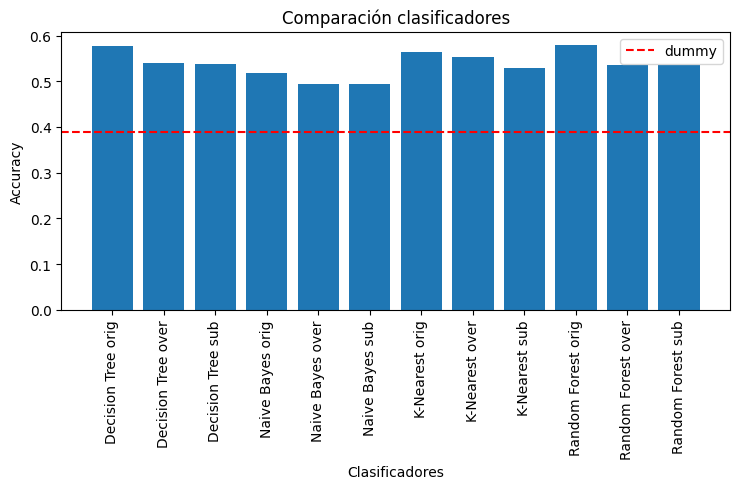

In [ ]:
dt_acc = accuracy_score(y_test, clf_orig.predict(X_test))

fig, ax = plt.subplots(figsize=(7.5, 5))

accuracies = [clf_acc_orig, clf_acc_over, clf_acc_subs,  nb_acc_orig, nb_acc_over, nb_acc_subs, kn_acc_orig, kn_acc_over, kn_acc_subs, rd_acc_orig, rd_acc_over, rd_acc_subs]
classifires = ['Decision Tree orig', 'Decision Tree over', 'Decision Tree sub','Naive Bayes orig', 'Naive Bayes over', 'Naive Bayes sub','K-Nearest orig',
               'K-Nearest over', 'K-Nearest sub', 'Random Forest orig', 'Random Forest over', 'Random Forest sub']

ax.bar(classifires, accuracies)
ax.axhline(dm_acc, color='r', linestyle='--', label='dummy')

ax.set_title('Comparación clasificadores')
ax.set_xlabel('Clasificadores')
ax.set_ylabel('Accuracy')

ax.legend()

plt.xticks(rotation=90, ha='center')
plt.tight_layout() 
plt.show()

Se puede observar cómo los modelos de Decision Tree, Random Forest y K-Nearest Neighbors obtuvieron mejor accuracy. Es por esto que utilizaremos estos tres para probar el dataset completo, utilizando los 3 conjuntos de entrenamiento.

3. Entrenamiento de modelos

Volveremos a crear los conjuntos de entrenamiento utilizando todo el dataset para obtener mejores resultados.

In [ ]:
features = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'REGION_RESIDENCIA', 'DIAG1', 'INTERV_Q']
target = 'DIAS_ESTADA'

data = ds_exp[features + [target]]

clases = {
    'Estancia Corta': [1, 2, 3],
    'Estancia Media': [4, 5, 6, 7, 8],
    'Estancia Larga': list(range(9, max(data[target]) + 1))
}


data['DIAS_ESTADA'] = pd.cut(data['DIAS_ESTADA'], bins=[0, 3, 8, float('inf')], labels=clases.keys(), right=False)

X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


Creamos conjuntos de entrenamiento con oversampling.

In [ ]:
X_train_oversampled = X_train.reset_index(drop=True)
y_train_oversampled = y_train.reset_index(drop=True)

num_instances_majority_class = y_train_oversampled.value_counts().max()

for class_name in y_train_oversampled.unique():
    if (y_train_oversampled == class_name).sum() < num_instances_majority_class:
        idx = np.random.choice(y_train_oversampled[y_train_oversampled == class_name].index, size=num_instances_majority_class - (y_train_oversampled == class_name).sum())
        X_train_oversampled = pd.concat([X_train_oversampled, X_train_oversampled.loc[idx]])
        y_train_oversampled = pd.concat([y_train_oversampled, y_train_oversampled.loc[idx]])


Creamos conjuntos de entrenamiento con subsampling.

In [ ]:
X_train_subsampled = X_train.reset_index(drop=True)
y_train_subsampled = y_train.reset_index(drop=True)

num_instances_minority_class = y_train_subsampled.value_counts().min()

for class_name in y_train_subsampled.unique():
    if (y_train_subsampled == class_name).sum() > num_instances_minority_class:
        idx = np.random.choice(y_train_subsampled[y_train_subsampled == class_name].index, size=(y_train_subsampled == class_name).sum() - num_instances_minority_class, replace=False)
        X_train_subsampled = X_train_subsampled.drop(idx)
        y_train_subsampled = y_train_subsampled.drop(idx)


Reasignamos los conjuntos de datos de entrenamiento a nombres más cortos para simplificar el código.

In [ ]:
# datos entrenamiento "originales"
X_orig = X_train
y_orig = y_train

# datos entrenamiento "oversampleados"
X_over = X_train_oversampled
y_over = y_train_oversampled

# datos entrenamiento "subsampleados"
X_subs = X_train_subsampled
y_subs = y_train_subsampled

Entrenamiento de modelo Random Forest en el conjunto de datos original.

In [ ]:
best_params={'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}

rf_clf_orig = RandomForestClassifier(**best_params)

rf_clf_orig.fit(X_orig, y_orig)

y_pred_rf_orig = rf_clf_orig.predict(X_test)

rf_acc_orig = accuracy_score(y_test, y_pred_rf_orig)

print("ORIGINAL::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_rf_orig))

ORIGINAL::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.67      0.81      0.73    651795
Estancia Larga       0.48      0.39      0.43    250173
Estancia Media       0.45      0.33      0.38    381537

      accuracy                           0.59   1283505
     macro avg       0.53      0.51      0.52   1283505
  weighted avg       0.56      0.59      0.57   1283505



Entrenamiento de modelo Random Forest en el conjunto de datos oversampling.

In [ ]:
best_params={'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}

rf_clf_over = RandomForestClassifier(**best_params)

rf_clf_over.fit(X_over, y_over)

y_pred_rf_over = rf_clf_over.predict(X_test)

rf_acc_over = accuracy_score(y_test, y_pred_rf_over)

print("OVERSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_rf_over))

OVERSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.59      0.68    651795
Estancia Larga       0.40      0.73      0.52    250173
Estancia Media       0.43      0.39      0.41    381537

      accuracy                           0.56   1283505
     macro avg       0.54      0.57      0.54   1283505
  weighted avg       0.61      0.56      0.57   1283505



Entrenamiento de modelo Random Forest en el conjunto de datos subsampling.

In [ ]:
best_params={'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1}

rf_clf_subs = RandomForestClassifier(**best_params)

rf_clf_subs.fit(X_subs, y_subs)

y_pred_rf_subs = rf_clf_subs.predict(X_test)

rf_acc_subs = accuracy_score(y_test, y_pred_rf_subs)

print("SUBSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_rf_subs))

SUBSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.58      0.67    651795
Estancia Larga       0.38      0.76      0.51    250173
Estancia Media       0.42      0.34      0.38    381537

      accuracy                           0.54   1283505
     macro avg       0.53      0.56      0.52   1283505
  weighted avg       0.60      0.54      0.55   1283505



Comparamos accuracy de los conjuntos

In [ ]:
print("Accuracy (original):", rf_acc_orig)
print("Accuracy (oversampling):", rf_acc_over)
print("Accuracy (subsampling):", rf_acc_subs)

Accuracy (original): 0.5883163680702451
Accuracy (oversampling): 0.5592576577418865
Accuracy (subsampling): 0.5448782825154557


Para poder comparar de manera más visual los resultados del modelo, crearemos una matriz de confusión para cada conjunto de entrenamiento.

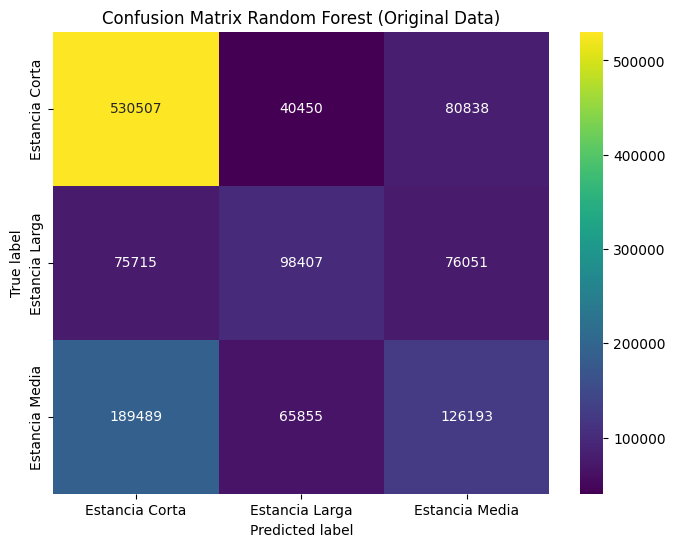

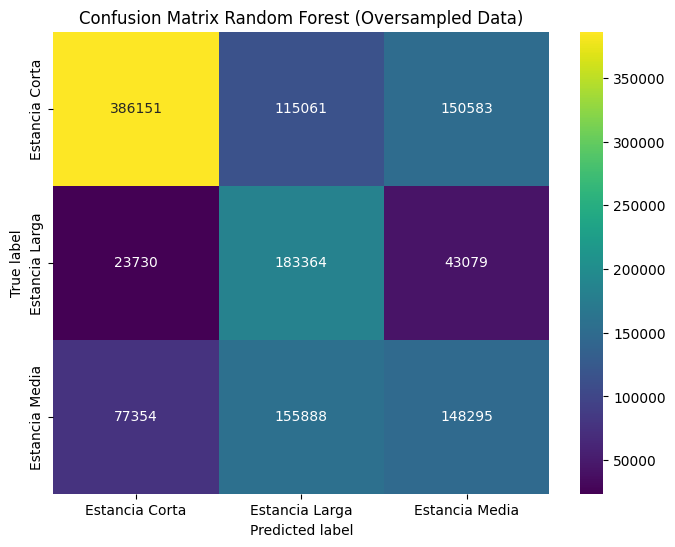

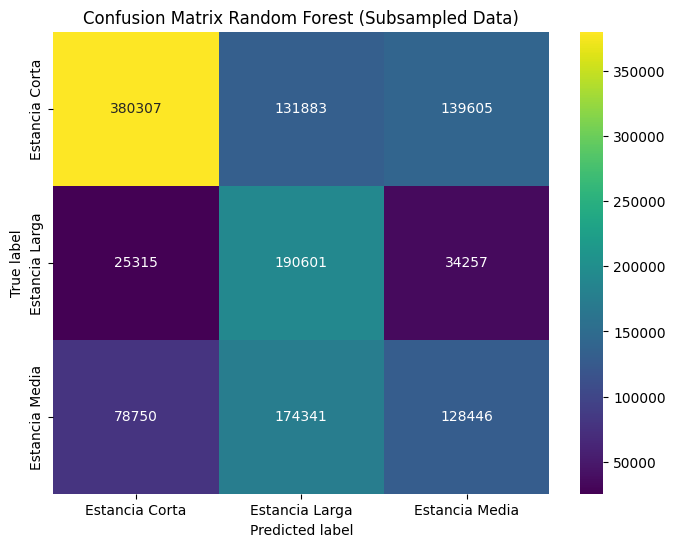

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm_orig = confusion_matrix(y_test, y_pred_rf_orig)
cm_over = confusion_matrix(y_test, y_pred_rf_over)
cm_subs = confusion_matrix(y_test, y_pred_rf_subs)

classes = unique_labels(y_test, y_pred_rf_orig, y_pred_rf_over, y_pred_rf_subs)

def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.show()

plot_confusion_matrix(cm_orig, 'Confusion Matrix Random Forest (Original Data)')
plot_confusion_matrix(cm_over, 'Confusion Matrix Random Forest (Oversampled Data)')
plot_confusion_matrix(cm_subs, 'Confusion Matrix Random Forest (Subsampled Data)')

Entrenamiento de modelo K-Nearest Neighbors en el conjunto de datos original.

In [ ]:
best_params={'n_neighbors': 10, 'weights': 'uniform', 'n_jobs': -1}

knn_clf_orig = KNeighborsClassifier(**best_params)

knn_clf_orig.fit(X_orig, y_orig)

y_pred_knn_orig = knn_clf_orig.predict(X_test)

knn_acc_orig = accuracy_score(y_test, y_pred_knn_orig)

print("ORIGINAL::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_orig))

ORIGINAL::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.66      0.78      0.72    651795
Estancia Larga       0.45      0.42      0.44    250173
Estancia Media       0.42      0.31      0.35    381537

      accuracy                           0.57   1283505
     macro avg       0.51      0.50      0.50   1283505
  weighted avg       0.55      0.57      0.55   1283505



Entrenamiento de modelo K-Nearest Neighbors en el conjunto de datos oversampling.

In [ ]:
best_params={'n_neighbors': 10, 'weights': 'distance', 'n_jobs': -1}

knn_clf_over = KNeighborsClassifier(**best_params)

knn_clf_over.fit(X_over, y_over)

y_pred_knn_over = knn_clf_over.predict(X_test)

knn_acc_over = accuracy_score(y_test, y_pred_knn_over)

print("OVERSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_over))

OVERSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.66      0.78      0.72    651795
Estancia Larga       0.44      0.42      0.43    250173
Estancia Media       0.42      0.30      0.35    381537

      accuracy                           0.57   1283505
     macro avg       0.51      0.50      0.50   1283505
  weighted avg       0.55      0.57      0.55   1283505



Entrenamiento de modelo K-Nearest Neighbors en el conjunto de datos subsampling.

In [ ]:
best_params={'n_neighbors': 10, 'weights': 'uniform', 'n_jobs': -1}

knn_clf_subs = KNeighborsClassifier(**best_params)

knn_clf_subs.fit(X_subs, y_subs)

y_pred_knn_subs = knn_clf_subs.predict(X_test)

knn_acc_subs = accuracy_score(y_test, y_pred_knn_subs)

print("SUBSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_knn_subs))

SUBSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.74      0.64      0.69    651795
Estancia Larga       0.39      0.65      0.49    250173
Estancia Media       0.42      0.34      0.37    381537

      accuracy                           0.55   1283505
     macro avg       0.52      0.54      0.52   1283505
  weighted avg       0.58      0.55      0.55   1283505



Comparamos accuracy de los conjuntos

In [ ]:
print("Accuracy (original):", knn_acc_orig)
print("Accuracy (oversampling):", knn_acc_over)
print("Accuracy (subsampling):", knn_acc_subs)

Accuracy (original): 0.5709389523219621
Accuracy (oversampling): 0.5703585104849611
Accuracy (subsampling): 0.5500921305331884


Para poder comparar de manera más visual los resultados del modelo, crearemos una matriz de confusión para cada conjunto de entrenamiento.

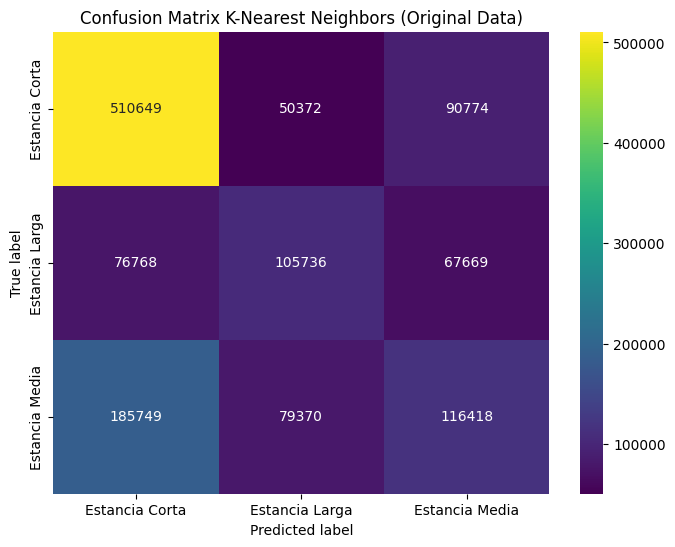

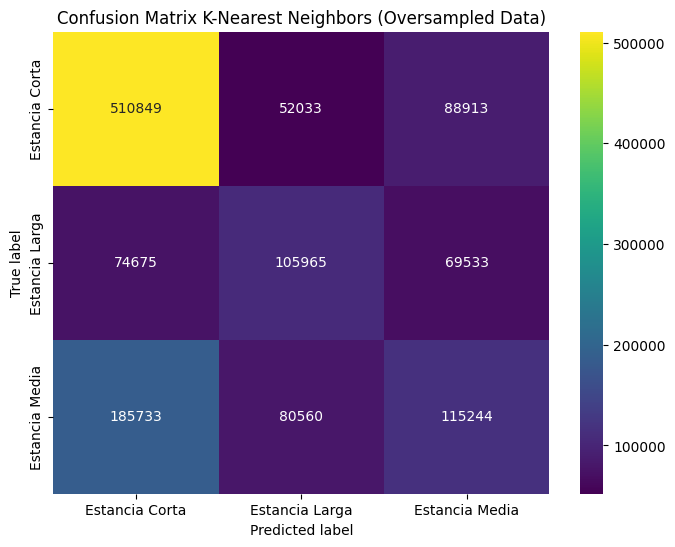

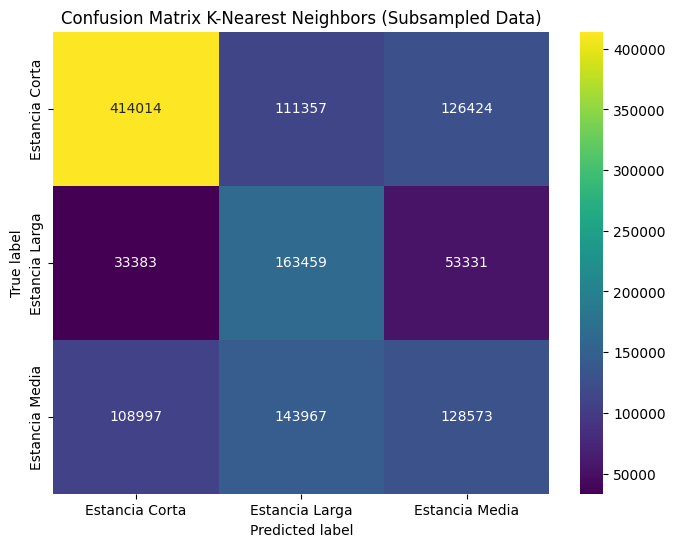

In [ ]:
cm_orig = confusion_matrix(y_test, y_pred_knn_orig)
cm_over = confusion_matrix(y_test, y_pred_knn_over)
cm_subs = confusion_matrix(y_test, y_pred_knn_subs)

classes = unique_labels(y_test, y_pred_knn_orig, y_pred_knn_over, y_pred_knn_subs)

def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.show()

plot_confusion_matrix(cm_orig, 'Confusion Matrix K-Nearest Neighbors (Original Data)')
plot_confusion_matrix(cm_over, 'Confusion Matrix K-Nearest Neighbors (Oversampled Data)')
plot_confusion_matrix(cm_subs, 'Confusion Matrix K-Nearest Neighbors (Subsampled Data)')

Entrenamiento de modelo Decision Tree en el conjunto de datos original.

In [ ]:
best_params={'criterion': 'entropy', 'max_depth': 10}

clf_orig = DecisionTreeClassifier(**best_params)

clf_orig.fit(X_orig, y_orig)

y_pred_dt_orig = clf_orig.predict(X_test)

dt_acc_orig = accuracy_score(y_test, y_pred_dt_orig)

print("ORIGINAL::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_dt_orig))

ORIGINAL::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.68      0.80      0.73    651795
Estancia Larga       0.48      0.42      0.45    250173
Estancia Media       0.44      0.34      0.39    381537

      accuracy                           0.59   1283505
     macro avg       0.53      0.52      0.52   1283505
  weighted avg       0.57      0.59      0.57   1283505



Entrenamiento de modelo Decision Tree en el conjunto de datos oversampling.

In [ ]:
best_params={'criterion': 'entropy', 'max_depth': 10}

clf_over = DecisionTreeClassifier(**best_params)

clf_over.fit(X_over, y_over)

y_pred_dt_over = clf_over.predict(X_test)

dt_acc_over = accuracy_score(y_test, y_pred_dt_over)

print("OVERSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_dt_over))

OVERSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.58      0.67    651795
Estancia Larga       0.39      0.77      0.51    250173
Estancia Media       0.42      0.34      0.38    381537

      accuracy                           0.55   1283505
     macro avg       0.53      0.56      0.52   1283505
  weighted avg       0.60      0.55      0.55   1283505



Entrenamiento de modelo Decision Tree en el conjunto de datos subsampling.

In [ ]:
best_params={'criterion': 'gini', 'max_depth': 10}

clf_subs = DecisionTreeClassifier(**best_params)

clf_subs.fit(X_subs, y_subs)

y_pred_dt_subs = clf_subs.predict(X_test)

dt_acc_subs = accuracy_score(y_test, y_pred_dt_subs)

print("SUBSAMPLING::::::::::")
print('Classification Report:')
print(classification_report(y_test, y_pred_dt_subs))

SUBSAMPLING::::::::::
Classification Report:
                precision    recall  f1-score   support

Estancia Corta       0.79      0.59      0.67    651795
Estancia Larga       0.40      0.73      0.51    250173
Estancia Media       0.42      0.37      0.39    381537

      accuracy                           0.55   1283505
     macro avg       0.53      0.56      0.53   1283505
  weighted avg       0.60      0.55      0.56   1283505



Comparamos accuracy de los conjuntos

In [ ]:
print("Accuracy (original):", dt_acc_orig)
print("Accuracy (oversampling):", dt_acc_over)
print("Accuracy (subsampling):", dt_acc_subs)

Accuracy (original): 0.5894071312538712
Accuracy (oversampling): 0.5464271662362048
Accuracy (subsampling): 0.5500033112453788


Para poder comparar de manera más visual los resultados del modelo, crearemos una matriz de confusión para cada conjunto de entrenamiento.

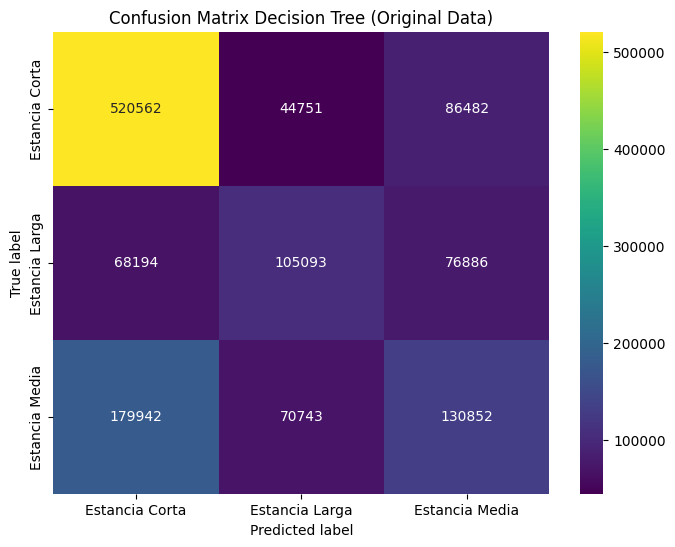

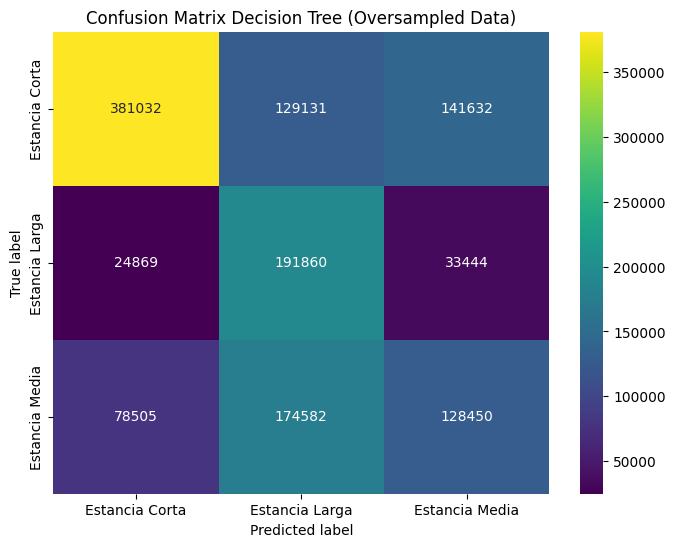

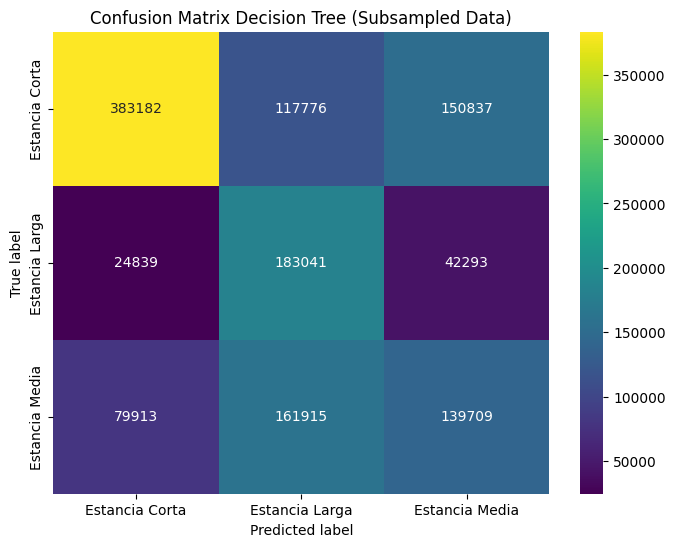

In [ ]:
cm_orig = confusion_matrix(y_test, y_pred_dt_orig)
cm_over = confusion_matrix(y_test, y_pred_dt_over)
cm_subs = confusion_matrix(y_test, y_pred_dt_subs)

classes = unique_labels(y_test, y_pred_dt_orig, y_pred_dt_over, y_pred_dt_subs)

def plot_confusion_matrix(cm, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    plt.show()

plot_confusion_matrix(cm_orig, 'Confusion Matrix Decision Tree (Original Data)')
plot_confusion_matrix(cm_over, 'Confusion Matrix Decision Tree (Oversampled Data)')
plot_confusion_matrix(cm_subs, 'Confusion Matrix Decision Tree (Subsampled Data)')

4. Conclusión

Los modelos entrenados presentan dificultades para predecir estancias medias y largas. Uno de los principales causantes de esto es el claro desbalance de las clases. Aunque al aplicar técnicas de **oversampling** y **subsampling** se observa una mejora, aún se presentan deficiencias en la predicción.

Otros factores que influyen en este desempeño incluyen los modelos utilizados. A pesar de haber intentado aplicar técnicas como **Gradient Boosting** y **Support Vector Machine**, estas tomaban demasiado tiempo, por lo que se decidió no utilizarlas. Esto implica que algún algoritmo que hubiera dado con mejores resultados podría no haber sido considerado. Adicionalmente, el modelo emplea muchas dimensiones, lo que puede hacer más difícil la clasificación, y puede que no hayamos considerado algunas características importantes. Por ejemplo, la variable **DIAG2** podría haber sido determinante, pero debido a que la mayoría de los pacientes tenía un valor **NaN** en esta variable, se optó por descartarla. Además que se tomaron en cuenta datos que podrían no ser obtenibles en un inicio, como lo es el diagnostico y la intervención quirurgica.

En resumen, la combinación de un desbalance de clases, la elección de modelos más simples por restricciones de tiempo, la maldición de la dimensionalidad y la posible exclusión de características relevantes, contribuye a la dificultad de los modelos para predecir con precisión las estancias medias y largas.

5. Pasos a Futuro

Para mejorar los modelos en el futuro, se podrían tomar los siguientes pasos:

1. **Aplicar diversas técnicas de selección de características** para identificar los datos más determinantes.
2. **Investigar otras técnicas de balanceo de datos** o incluir datos de egresos reales, obtenidos de datasets de otros años, para generar un equilibrio en las clases objetivo.
3. **Utilización de otros modelos de clasificación** que no se hayan considerado anteriormente debido a restricciones de tiempo, optimizando su implementación para mejorar su eficiencia.
4. **Incluir opiniones de profesionales de la salud** para obtener recomendaciones sobre datos y características que deberían ser consideradas.

## Pregunta 2

### ¿Se pueden encontrar agrupaciones de pacientes con distinto nivel de urgencia de atención según su edad, sexo, región, pertenencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica?

Se denotan las celdas de código reutilizadas del laboratorio 5 añadiendo la linea #lab 5 al inicio de estas. Las celdas sin esta marca son de autoría propia.

#### Preparación de datos:

Para poder implementar los modelos de clustering antes se deben convertir los datos a variables numéricas y normalizarlas para evitar asignaciones erroneas de los pesos de cada atributo. Además debido al coste temporal de los algoritmos o calculos de métricas se fijan tamaños de sampling para los datos de manera que se puedan entrenar y calificar los modelos en un tiempo razonable (En el caso del modelo Agg el tamaño debe ser menor ya que para su entrenamiento se ocupa una cantidad exagerada de espacio (36TiB para 100.000 filas) por lo que no es posible usar más filas para su calificación).

Para esto comenzamos aplicando las transformaciones indicadas en la métodología propuesta durante el Hito 2:

##### Código transformaciones de columnas

In [234]:
#Importamos todo lo necesario para aplciar los modelos de clustering
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
import seaborn as sns

In [235]:
#Fijamos previamente los tamaños del sampling para cada tipo de modelo de clustering
subsample_kmeans = 10000
subsample_agg = 10000
subsample_dbscan = 100000

In [236]:
#Se hace una copia para realizar la transformación de los datos
df_cluster = ds_numeric.copy()
# Contar el número de NaN en cada columna
nan_count = df_cluster.isna().sum()
print("\nNúmero de valores NaN por columna:")
print(nan_count)


Número de valores NaN por columna:
PERTENENCIA_ESTABLECIMIENTO_SALUD          0
SEXO                                       0
GRUPO_EDAD                                 0
ETNIA                                      0
GLOSA_PAIS_ORIGEN                          0
COMUNA_RESIDENCIA                          0
GLOSA_COMUNA_RESIDENCIA                    0
REGION_RESIDENCIA                          0
GLOSA_REGION_RESIDENCIA                    0
PREVISION                                  0
GLOSA_PREVISION                            0
ANO_EGRESO                                 0
DIAG1                                   3541
DIAG2                                3870626
DIAS_ESTADA                                0
CONDICION_EGRESO                           0
INTERV_Q                                   0
PROCED                                     0
dtype: int64


In [237]:
#Se eliminan los datos con valores nulos en la columna 'DIAG1'
df_cluster = df_cluster.dropna(subset = ['DIAG1'])

In [238]:
# Contar el número de NaN en cada columna
nan_count = df_cluster.isna().sum()
print("\nNúmero de valores NaN por columna:")
print(nan_count)


Número de valores NaN por columna:
PERTENENCIA_ESTABLECIMIENTO_SALUD          0
SEXO                                       0
GRUPO_EDAD                                 0
ETNIA                                      0
GLOSA_PAIS_ORIGEN                          0
COMUNA_RESIDENCIA                          0
GLOSA_COMUNA_RESIDENCIA                    0
REGION_RESIDENCIA                          0
GLOSA_REGION_RESIDENCIA                    0
PREVISION                                  0
GLOSA_PREVISION                            0
ANO_EGRESO                                 0
DIAG1                                      0
DIAG2                                3867086
DIAS_ESTADA                                0
CONDICION_EGRESO                           0
INTERV_Q                                   0
PROCED                                     0
dtype: int64


In [239]:
# Definir un diccionario para mapear los rangos de edad a sus valores medios
edad_mapping = {
    'menor de un año': 0.5,
    '1 a 9': 5,
    '10 a 19': 14.5,
    '20 a 29': 24.5,
    '30 a 39': 34.5,
    '40 a 49': 44.5,
    '50 a 59': 54.5,
    '60 a 69': 64.5,
    '70 a 79': 74.5,
    '80 a 89': 84.5,
    '90 y más': 95
}

# Aplicar el mapeo a la columna "GRUPO_EDAD"
df_cluster['GRUPO_EDAD'] = df_cluster['GRUPO_EDAD'].map(edad_mapping)
df_cluster = df_cluster[df_cluster['SEXO'].isin(['HOMBRE','MUJER'])]

# Escalamos las vaariables numericas
standar_scaler = StandardScaler()
min_scaler = MinMaxScaler()
df_cluster['GRUPO_EDAD'] = standar_scaler.fit_transform(df_cluster[['GRUPO_EDAD']])
df_cluster['DIAS_ESTADA'] = standar_scaler.fit_transform(df_cluster[['DIAS_ESTADA']])

In [240]:
df_cluster = df_cluster[['GRUPO_EDAD','INTERV_Q','SEXO','PERTENENCIA_ESTABLECIMIENTO_SALUD', 'DIAG1','GLOSA_REGION_RESIDENCIA']]
columns = ['INTERV_Q', 'SEXO', 'PERTENENCIA_ESTABLECIMIENTO_SALUD','DIAG1','GLOSA_REGION_RESIDENCIA']

df_diags = df_cluster.copy()
df_cluster = pd.get_dummies(df_cluster, columns=columns, dtype = int)

##### Resultado transformación de los datos: 

In [241]:
df_cluster.describe(include = 'all')

GRUPO_EDAD    INTERV_Q_1    INTERV_Q_2   SEXO_HOMBRE    SEXO_MUJER  \
count  4.278334e+06  4.278334e+06  4.278334e+06  4.278334e+06  4.278334e+06   
mean   4.860676e-16  4.455524e-01  5.544476e-01  4.213741e-01  5.786259e-01   
std    1.000000e+00  4.970267e-01  4.970267e-01  4.937793e-01  4.937793e-01   
min   -1.871094e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%   -8.555960e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%   -9.347835e-03  0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
75%    8.369003e-01  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
max    2.127429e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       PERTENENCIA_ESTABLECIMIENTO_SALUD_1  \
count                         4.278334e+06   
mean                          6.003671e-01   
std                           4.898229e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           1.000000e+00   
75%                           1.000000e+00   
max                           1.000000e+00   

       PERTENENCIA_ESTABLECIMIENTO_SALUD_2  \
count                         4.278334e+06   
mean                          3.996329e-01   
std                           4.898229e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           0.000000e+00   
75%                           1.000000e+00   
max                           1.000000e+00   

       DIAG1_Ciertas afecciones originadas en el período perinatal  \
count                                       4.278334e+06             
mean                                        2.008936e-02             
std                                         1.403060e-01             
min                                         0.000000e+00             
25%                                         0.000000e+00             
50%                                         0.000000e+00             
75%                                         0.000000e+00             
max                                         1.000000e+00             

       DIAG1_Ciertas enfermedades infecciosas y parasitarias  \
count                                       4.278334e+06       
mean                                        1.734928e-02       
std                                         1.305691e-01       
min                                         0.000000e+00       
25%                                         0.000000e+00       
50%                                         0.000000e+00       
75%                                         0.000000e+00       
max                                         1.000000e+00       

       DIAG1_Códigos para propósitos especiales  ...  \
count                              4.278334e+06  ...   
mean                               3.818075e-02  ...   
std                                1.916324e-01  ...   
min                                0.000000e+00  ...   
25%                                0.000000e+00  ...   
50%                                0.000000e+00  ...   
75%                                0.000000e+00  ...   
max                                1.000000e+00  ...   

       GLOSA_REGION_RESIDENCIA_De Los Lagos  \
count                          4.278334e+06   
mean                           5.267588e-02   
std                            2.233856e-01   
min                            0.000000e+00   
25%                            0.000000e+00   
50%                            0.000000e+00   
75%                            0.000000e+00   
max                            1.000000e+00   

       GLOSA_REGION_RESIDENCIA_De Los Ríos  \
count                         4.278334e+06   
mean                          2.384503e-02   
std                           1.525662e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           0.000000e+00   
75%     

De esta manera nos queda un dataframe con 44 columnas, la gran mayoría resultantes de aplicaar one hot encoding a las columnas existentes.

Antes de implementar los modelos podemos aplicar una reduccion de dimensiones al dataframe para graficar y ver a priori si existen agrupaciones en los datos. Para esto utilizaremos el metodo PCA para hacer una reducción a 2 dimensiones. Además podemos agregar colores para visualizar como se distribuyen los datos de una columna de interés como lo es la condición de egreso en el espacio reducido a 2 dimensiones.

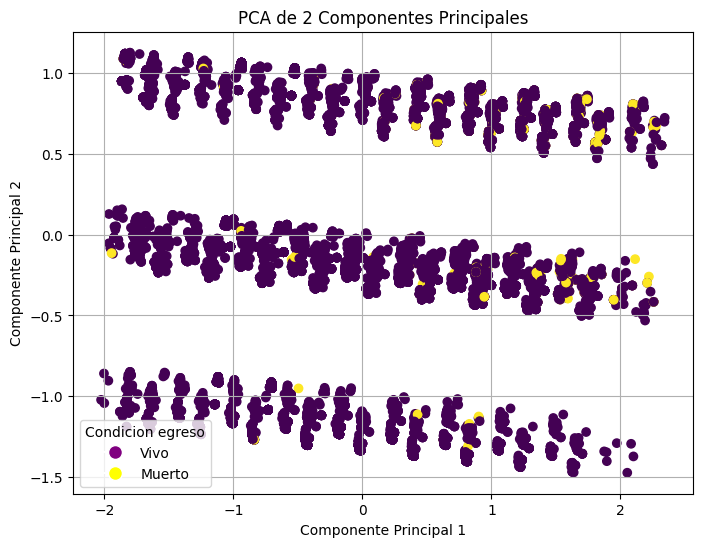

In [242]:
#Lab 5
df_kmeans = df_cluster.sample(n = subsample_kmeans, random_state = 42)
pca = PCA(n_components=2)
reduccion_kmeans = pca.fit_transform(df_kmeans)
resultados_kmeans = pd.DataFrame(data=reduccion_kmeans, columns=["C1", "C2"])
resultados_np_kmeans = resultados_kmeans.values

plt.figure(figsize=(8, 6))

# Asignar colores
df_cond = ds_numeric[['CONDICION_EGRESO']]
df_kmeans = df_kmeans.join(df_cond)
colors = df_kmeans['CONDICION_EGRESO']
df_kmeans.drop(columns = ['CONDICION_EGRESO'])
scatter = plt.scatter(resultados_kmeans["C1"], resultados_kmeans["C2"],c=colors, cmap='viridis')

# Crear una lista de elementos de leyenda personalizados
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Vivo'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Muerto')]

plt.legend(handles=legend_elements, title="Condicion egreso")

plt.title('PCA de 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

En el gráfico resultante se pueden visualizar agrupaciones en los datos, sin embargo, es díficil hacer un análisis sobre la cantidad de agrupaciones presentes debido a que en una reducción de 44 a 2 dimensiones se puede perder algo de información, por lo que, para determinar con mayor certeza un número de clusters eficiente para los datos graficamos tambien la curva SSE vs n° clusters, quedandonos con el n° de clusters en el cual aumentar dicho número ya no genera una disminución significativa del SSE.


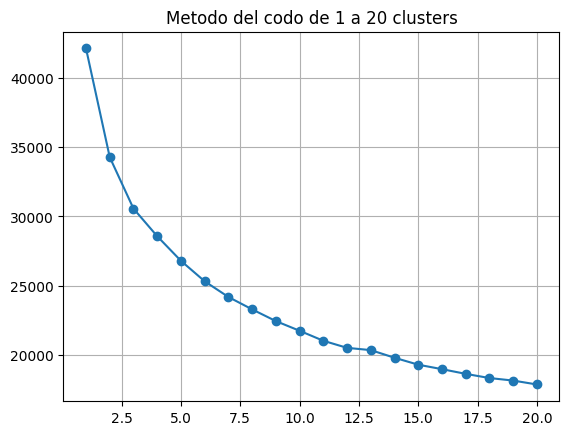

In [243]:
#Lab 5
#Gráfiamos la curva SSE vs n de clusters
sse = []

clusters = list(range(1, 21))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init=10).fit(df_kmeans)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters")
plt.grid(True)
plt.show()

Vemos que en este caso el n° de clusters apropiado parece estar entre 4 y 7.

Con esto ahora podemos entrenar un modelo con k-means para los numeros de clusters elegidos y graficar como se distribuyen las clases en el espacio de los datos

#### Implementación de modelos

Con los resultados de la sección anterior podemos comenzar a implementar los modelos propuesto como solución para encontrar agrupaciones en los datos. Primero se implementan los modelos de k-means con k desde 4 a 7, haciendo un conteo de las filas en cada grupo y graficando su distribución en el espacio reducido.

{0: 2854, 1: 2755, 2: 2368, 3: 2023}


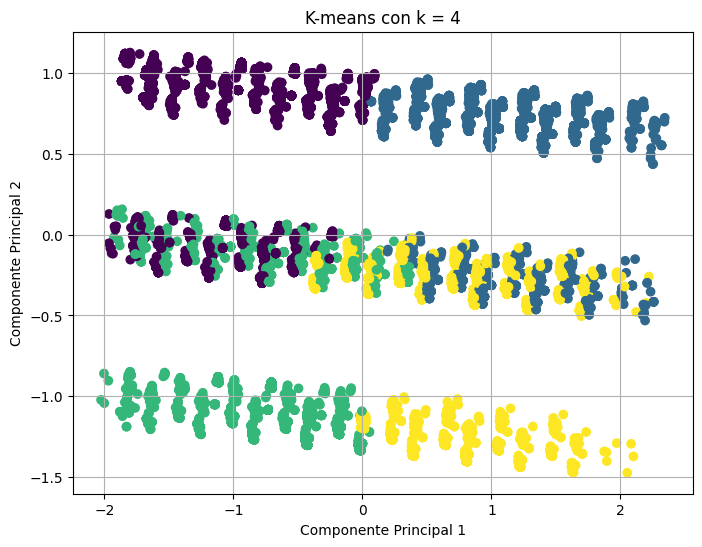

In [244]:
#Lab 5
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=20).fit(df_kmeans)
plt.figure(figsize=(8, 6))

plt.scatter(resultados_kmeans["C1"], resultados_kmeans["C2"], c = kmeans4.labels_)
unique, counts = np.unique(kmeans4.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Mostrar los resultados
print(cluster_counts)

plt.title('PCA de 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means con k = 4')
plt.grid()
plt.show()

{0: 1214, 1: 1732, 2: 2359, 3: 2620, 4: 2075}


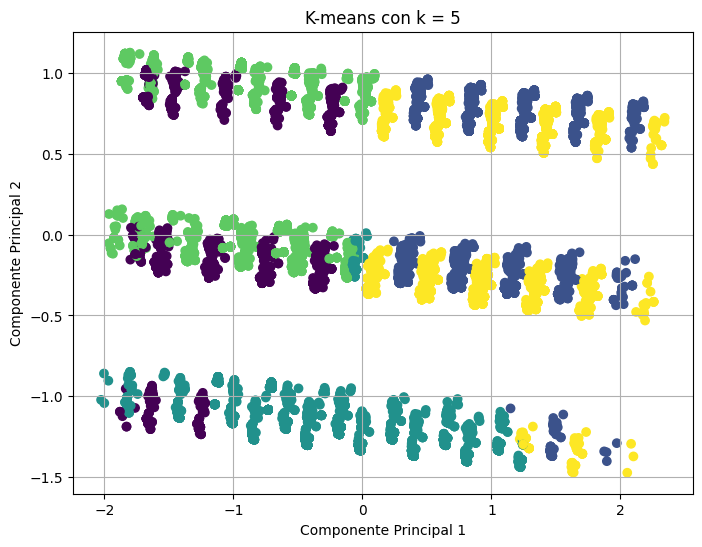

In [245]:
kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=20).fit(df_kmeans)
plt.figure(figsize=(8, 6))

plt.scatter(resultados_kmeans["C1"], resultados_kmeans["C2"], c = kmeans5.labels_)
unique, counts = np.unique(kmeans5.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Mostrar los resultados
print(cluster_counts)
plt.title('PCA de 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means con k = 5')
plt.grid()
plt.show()

{0: 1147, 1: 1725, 2: 1879, 3: 2213, 4: 1734, 5: 1302}


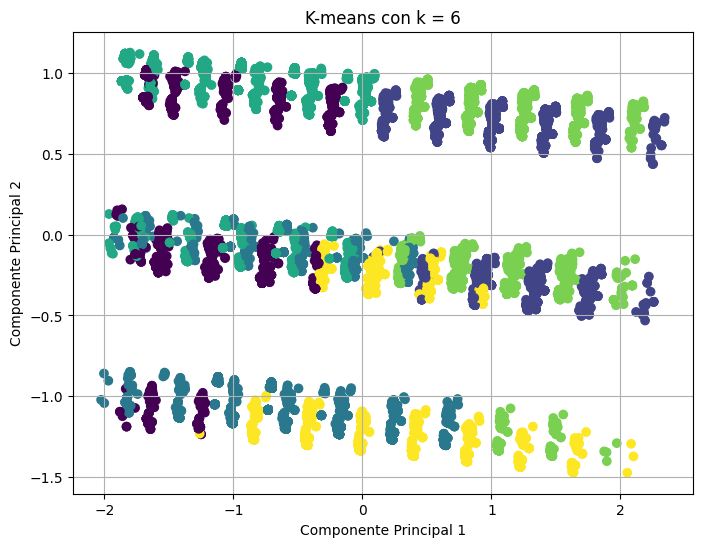

In [246]:
kmeans6 = KMeans(n_clusters=6, n_init=10, random_state=20).fit(df_kmeans)
plt.figure(figsize=(8, 6))

plt.scatter(resultados_kmeans["C1"], resultados_kmeans["C2"], c = kmeans6.labels_)
unique, counts = np.unique(kmeans6.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Mostrar los resultados
print(cluster_counts)

plt.title('PCA de 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means con k = 6')
plt.grid()
plt.show()

{0: 1141, 1: 1520, 2: 1302, 3: 931, 4: 1725, 5: 1603, 6: 1778}


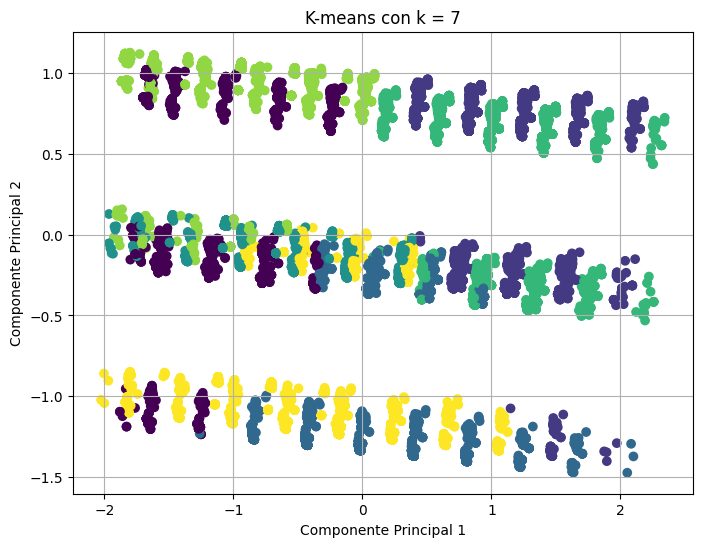

In [247]:
kmeans7 = KMeans(n_clusters=7, n_init=10, random_state=20).fit(df_kmeans)
plt.figure(figsize=(8, 6))

plt.scatter(resultados_kmeans["C1"], resultados_kmeans["C2"], c = kmeans7.labels_)
unique, counts = np.unique(kmeans7.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Mostrar los resultados
print(cluster_counts)

plt.title('PCA de 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means con k = 7')
plt.grid()
plt.show()

Seguimos aplicando el modelo aglomerativo jerárquico, para esto hacemos el subsampling del tamaño correspondiente (solo si el tamaño es distinto al tomado para kmeans se hace uno nuevo) y se prueba las 4 funciones posibles para la unión de las ramas. Para la visualización de cada método se grafica el dendograma para hacer un análisis de que método parece factible y a que altura parece razonable realizar el corte.

In [248]:
#Si el tamaño de subsampling es distinto tomamos un nuevo sample
if subsample_agg != subsample_kmeans:
    df_agg = df_kmeans.sample(n=subsample_agg, random_state = 42)
else:
    df_agg = df_kmeans

In [249]:
#Lab 5
#Se generan modelos con los 4 metodos disponibles
complete = linkage(df_agg, method="complete")
single = linkage(df_agg, method="single")
average = linkage(df_agg, method="average")
ward = linkage(df_agg, method="ward")

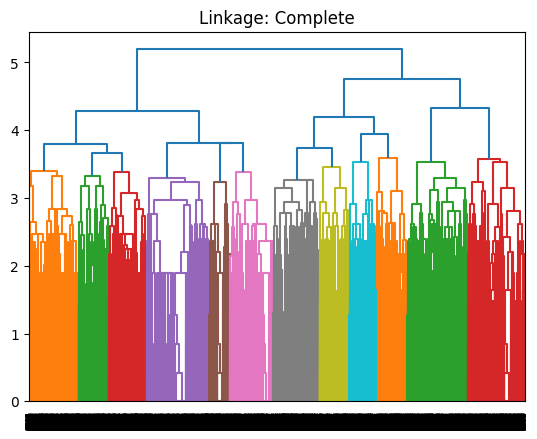

In [250]:
#Lab 5
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

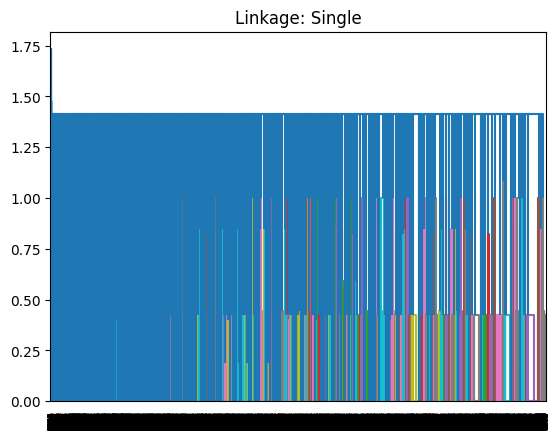

In [251]:
#Lab 5
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

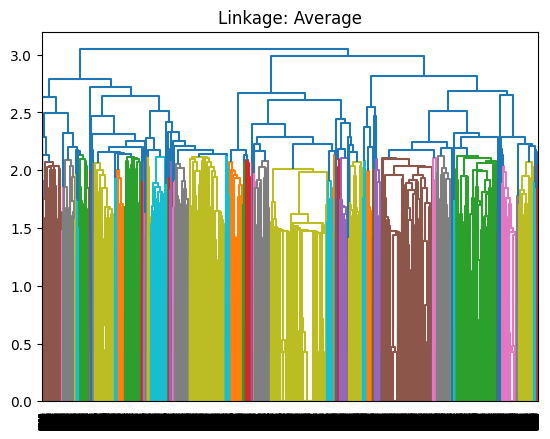

In [252]:
#Lab 5
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

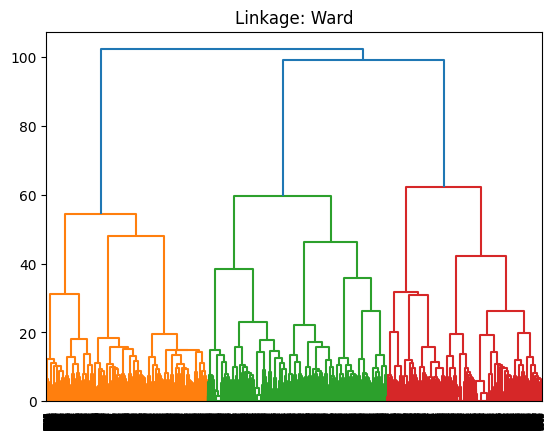

In [253]:
#Lab 5
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

##### Análisis dendrogramas resultantes

Vemos que los métodos single y average no generan ramas tan independientes por lo que se descartan como candidatos para encontrar las agrupaciones en los datos. Por el otro lado los métodos ward y complete parecieran generar mejores agrupaciones por lo que en el caso del método ward se realiza un corte del arbol a la altura 50 y para complete se corta el árbol cuando queden 4 ramas.

De esta manera se generan los modelos correspondientes y se gráfica la distribución de los grupos a traves de la reducción de dimensiones del dataframe.

In [254]:
#Se genera la reducción de dimensiones
reduccion_agg = pca.fit_transform(df_agg)
resultados_agg = pd.DataFrame(data=reduccion_agg, columns=["C1", "C2"])
resultados_np_agg = resultados_agg.values

6 clusters


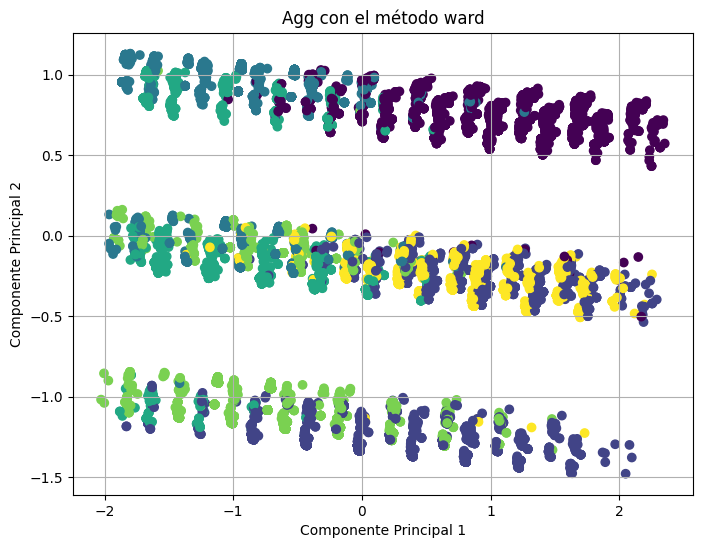

In [255]:
#Lab 5
#Implementación del modelo agg con metodo ward
ward_dist = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=50).fit(df_agg)
print(str(ward_dist.n_clusters_) + " clusters")

plt.figure(figsize=(8, 6))

plt.scatter(resultados_agg["C1"], resultados_agg["C2"], c = ward_dist.labels_)

plt.title('Agg con el método ward')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

4 clusters


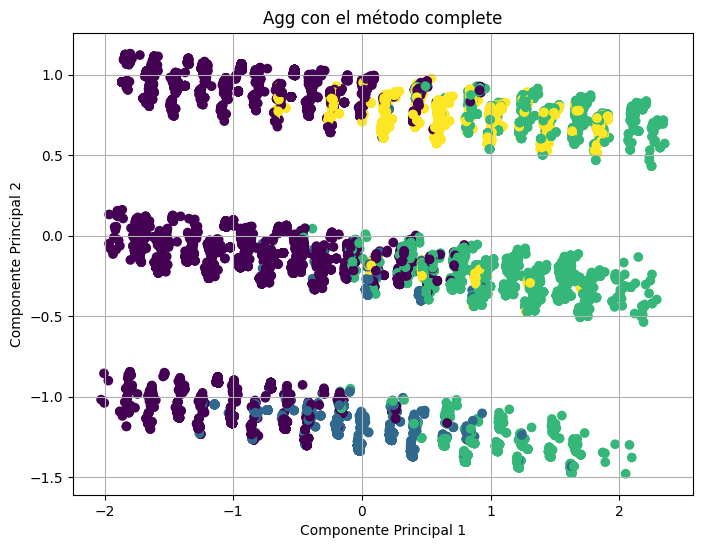

In [256]:
#Lab 5
complete_dist = AgglomerativeClustering(n_clusters=4, linkage="complete", distance_threshold=None).fit(df_agg)
print(str(complete_dist.n_clusters_) + " clusters")

plt.figure(figsize=(8, 6))

plt.scatter(resultados_agg["C1"], resultados_agg["C2"], c = complete_dist.labels_)

plt.title('Agg con el método complete')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

Finalmente se realiza la prueba con el modelo de clustering basado en densidad DBSCAN. Para esto se realizan al igual que en los modelos anteriores un sampleo del dataframe junto a su reducción de dimensiones con PCA y se entrena el modelo. Para encontrar los valores de eps y minpts óptimos se grafica la curva de los promedios de las distancias y se escoje como eps la recta paralela al eje x tal que exista un aumento considerable de la distancia promedio de los puntos entre si.

In [257]:
#Sampleo y reducción de dimensiones para aplicar dbscan a los datos
df_dbscan = df_cluster.sample(n=subsample_dbscan, random_state = 42)
reduccion_dbscan = pca.fit_transform(df_dbscan)
resultados_dbscan = pd.DataFrame(data=reduccion_dbscan, columns=["C1", "C2"])
resultados_np_dbscan = resultados_dbscan.values

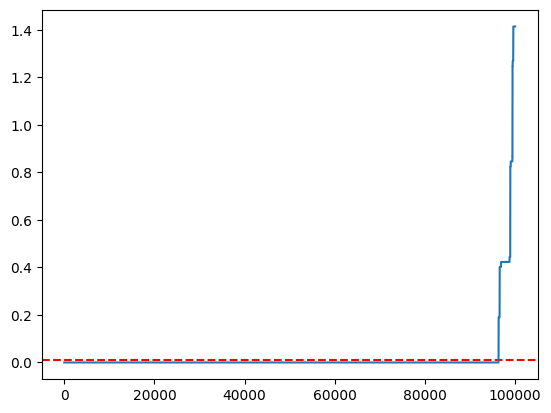

In [258]:
#Lab 5
#Generación del gráfico para encontrar minpts y eps
nbrs = NearestNeighbors(n_neighbors=5).fit(df_dbscan)
distances, indices = nbrs.kneighbors(df_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots()

ax.axhline(y=0.012, color='r', linestyle='--')
ax.plot(distances)

plt.show()

Vemos que el valor donde se diparan la distancia promedio de los puntos es muy cercano a 0 por lo que es posible que DBSCAN simplemente no sea un buen modelo para los datos particulares que se estan trabajando. Se realizaron pruebas con distintos valores de minpts y eps para la curva y no se logró obtener un resultado distinto al presente. 

1432 clusters resultantes


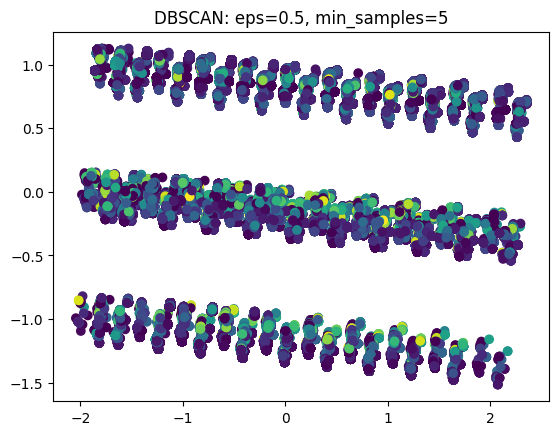

In [259]:
#Lab 5
#Se implementa DBSCAN para analizar la cantidad de clusters resultantes
def contar_valores_distintos(lista):
    return len(set(lista))
    
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(df_dbscan)
print(str(contar_valores_distintos(dbscan.labels_)) + " clusters resultantes")
plt.scatter(resultados_dbscan["C1"], resultados_dbscan["C2"], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

Como se puede apreciar el resultado con el modelo DBSCAN se distancia ampliamente de un resultado esperado para un modelo de clustering correcto por lo que no se seguirá analizando su factibilidad. Que este modelo no haya sido aplicable a los datos puede deberse a que este caso es en particular el caso donde dbscan no funciona correctamente, esto es, datos con densidad variable y poco distancidos entre si. Esto puede deberse a la alta dimensionalidad de los datos de prueba causada por la presencia de una cantidad considerable de variables categóricas en los datos originales.

#### Validación de los clusters

Para realizar una correcta validación de los clusters se utilizaran metodos de validación no supervidados, más especificamente, se compararan los coeficiente de Silhouette para todos los modelos obtenidos en la etapa anterior. De estos además se graficarán sus matrices de correlación buscando que estas tengan una distribución en diagonal.

In [260]:
#Lab 5
#Coeficientes de Silhouette para modelos agg
print("Dataset " , subsample_agg , " filas Ward Agg\t\t", silhouette_score(df_agg, ward_dist.labels_))
print("Dataset " , subsample_agg , " filas Complete Agg\t\t", silhouette_score(df_agg, complete_dist.labels_))

Dataset  10000  filas Ward Agg		 0.12379242556769061
Dataset  10000  filas Complete Agg		 0.046196286470935946


In [261]:
#Lab 5
#Coeficientes de Silhouette para modelos k-means
print("Dataset " , subsample_kmeans , " filas K-Means 4 clusters\t", silhouette_score(df_kmeans, kmeans4.labels_))
print("Dataset " , subsample_kmeans , " filas K-Means 5 clusters\t", silhouette_score(df_kmeans, kmeans5.labels_))
print("Dataset " , subsample_kmeans , " filas K-Means 6 clusters\t", silhouette_score(df_kmeans, kmeans6.labels_))
print("Dataset " , subsample_kmeans , " filas K-Means 7 clusters\t", silhouette_score(df_kmeans, kmeans7.labels_))

Dataset  10000  filas K-Means 4 clusters	 0.13959421177414758
Dataset  10000  filas K-Means 5 clusters	 0.1416152182756146
Dataset  10000  filas K-Means 6 clusters	 0.14680482512437548
Dataset  10000  filas K-Means 7 clusters	 0.14019064866760253


Observando unicamente el coeficiente de silhouette de los modelos se aprecia que, para ninguno de los modelos este es siquiera cercano a 1. Esto índica que los modelos no estan generando agrupaciones con valores óptimos de separación y cohesión. El modelo que alcanza un coeficiente de silhouette más cercano a 1 corresponde a kmeans con k = 6.

In [262]:
#Lab 5
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las similitud entre todos los puntos
    d = cosine_similarity(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    sim = sim_matrix(data, model.labels_)
    im = ax2.imshow(sim, cmap='cividis', vmin=0.0, vmax=1.0)
    fig.colorbar(im, ax=ax2)

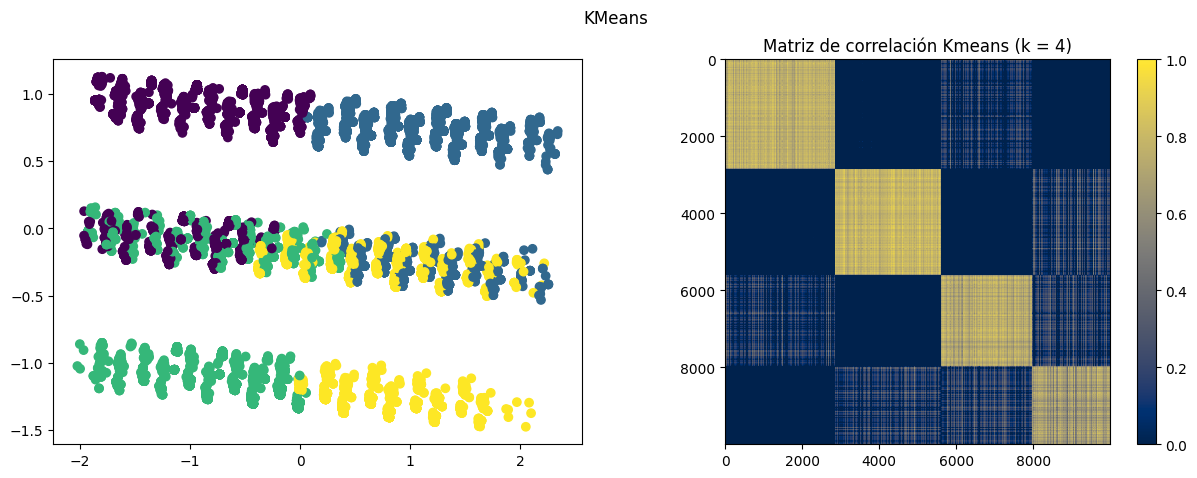

In [263]:
#lab 5
plot(resultados_np_kmeans,kmeans4)
plt.title('Matriz de correlación Kmeans (k = 4)')
plt.show()

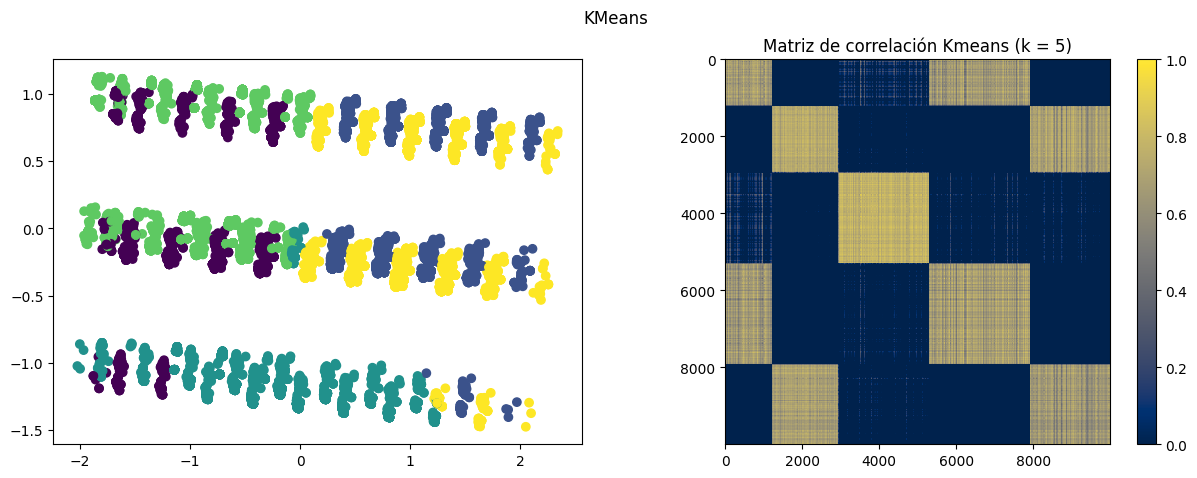

In [264]:
plot(resultados_np_kmeans,kmeans5)
plt.title('Matriz de correlación Kmeans (k = 5)')
plt.show()

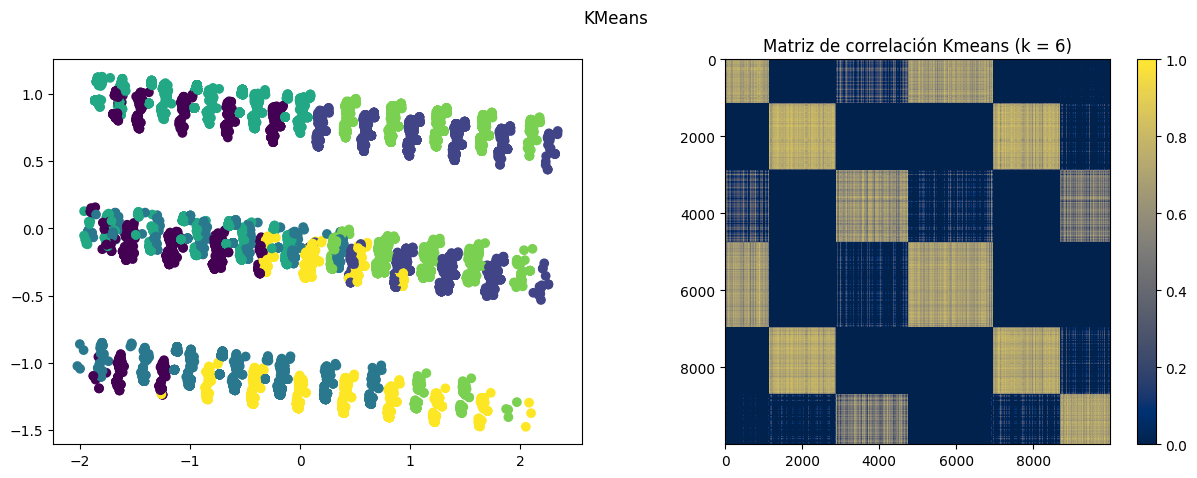

In [265]:
plot(resultados_np_kmeans,kmeans6)
plt.title('Matriz de correlación Kmeans (k = 6)')
plt.show()

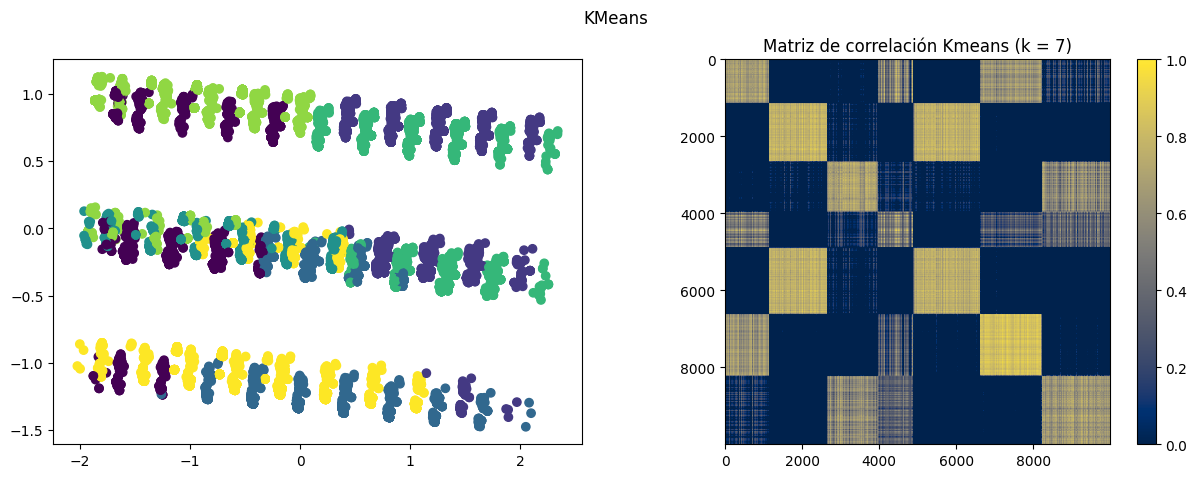

In [266]:
plot(resultados_np_kmeans,kmeans7)
plt.title('Matriz de correlación Kmeans (k = 7)')
plt.show()

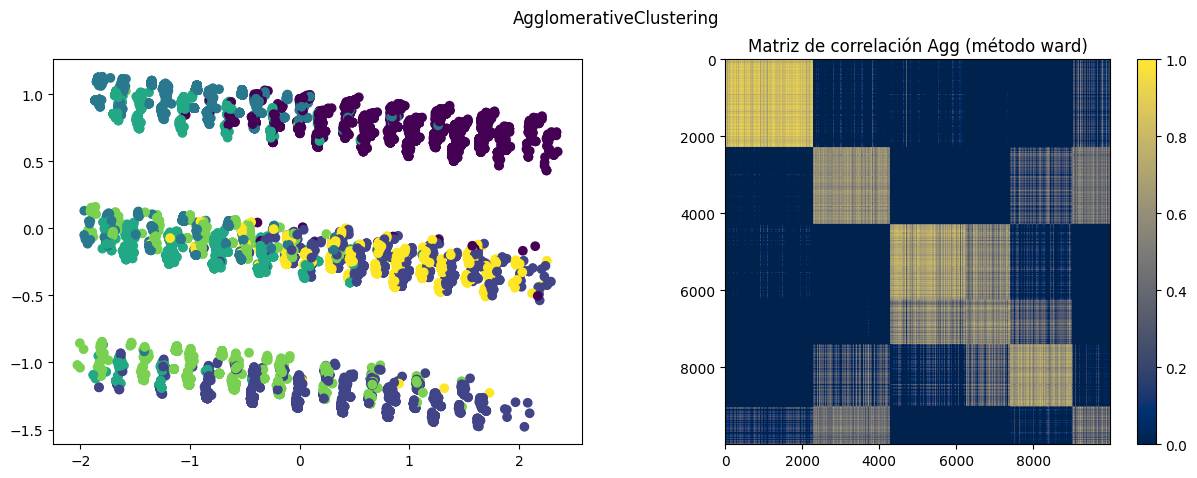

In [267]:
plot(resultados_np_agg,ward_dist)
plt.title('Matriz de correlación Agg (método ward)')
plt.show()

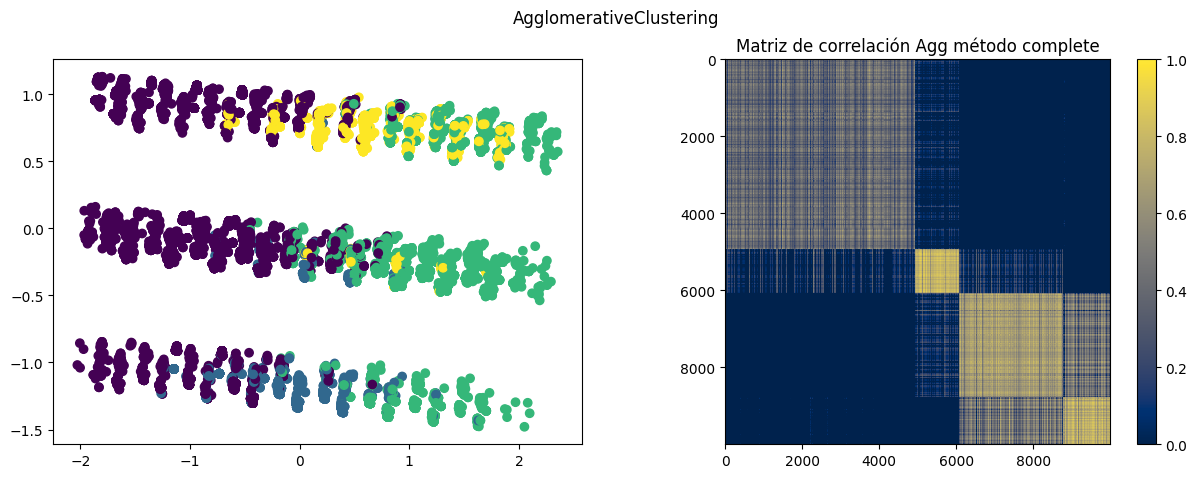

In [268]:
plot(resultados_np_agg,complete_dist)
plt.title('Matriz de correlación Agg método complete')
plt.show()

En las matrices de correlación se puede observar un comportamiento similar al obtenido con los coef se silhouette, siendo los clusters generados con kmeans los que obtienen mejores resultados. En particular son las instancias con k = 4 y k = 6 las que obtienen una matriz de correlación con estructura diagonal más clara. Sin embargo destaca la matriz de correlación cuando se usa k = 4 por lo que se usara este modelo para realizar la caracterización de los grupos.

Adicionalmente se pueden comparar los coeficiente de silhouette por cada grupo en ambos modelos para obtener una idea de que tan consistentes son los grupos entre si.

In [269]:
# Obtener las muestras de silouhette por cluster
silhouette_vals = silhouette_samples(df_kmeans, kmeans4.labels_)

# Calcular el coeficiente de silueta promedio para cada clúster
df_silhouette = pd.DataFrame({'cluster': kmeans4.labels_, 'silhouette': silhouette_vals})
silhouette_avg_per_cluster = df_silhouette.groupby('cluster')['silhouette'].mean()

# Mostrar los resultados
print(silhouette_avg_per_cluster)

cluster
0    0.162305
1    0.150057
2    0.136788
3    0.096591
Name: silhouette, dtype: float64


In [270]:
# Obtener las muestras de silouhette por cluster
silhouette_vals = silhouette_samples(df_kmeans, kmeans6.labels_)

# Calcular el coeficiente de silueta promedio para cada clúster
df_silhouette = pd.DataFrame({'cluster': kmeans7.labels_, 'silhouette': silhouette_vals})
silhouette_avg_per_cluster = df_silhouette.groupby('cluster')['silhouette'].mean()

# Mostrar los resultados
print(silhouette_avg_per_cluster)

cluster
0    0.119056
1    0.126379
2    0.151103
3    0.118896
4    0.134793
5    0.193880
6    0.162751
Name: silhouette, dtype: float64


Vemos que en ambos casos los coeficientes de silhouette promedio son similares en ambas instancias contando ambas con una unica agrupación con un coef de silhouette promedio considerablemente menor que el de los demás.

#### Caracterización de los clusters

Considerando el modelo seleccionado en la etapa anterior podemos comenzar a realizar una caracterización de los grupos encontrados por el modelo. Dada la pregunta de investigación propuesta se pone especial énfasis en como se distribuyen las columnas 'CONDICION_EGRESO' y 'DIAS_ESTADA' en cada grupo para poder hacer una asignación de niveles de urgencia de atención a cada uno de estos. 

Si bien estas columnas no fueron parte de la selección de atributos para la implementación de los modelos se espera que, inheremente aparezcan distribuciones disjuntas de estas columnas en las agrupaciones, pues, de esta manera se responderia afirmativamente a la pregunta ¿Se pueden encontrar agrupaciones por nivel de urgencia de atención utilizando unicamente los atributos seleccionados? De lo contrario, se respondería negativamente a la pregunta, siendo insuficiente estos atributos para que los datos se agrupasen por nivel de urgencia de atención.

Para poder hacer una mejor caracterización se puede utilizar el modelo que sabemos tiene mejor resultado en todos los datos (las 4M de filas). Con esto podemos hacer una mejor caracterización siendo más representativa. (En este punto seria correcto calcular métricas de evaluación para verificar que el modelo siga teniendo mejores resultados que los demás sin embargo esto no es posible con la memoria disponible ni en un tiempo razonable).

{0: 659767, 1: 1084338, 2: 1110419, 3: 1423810}


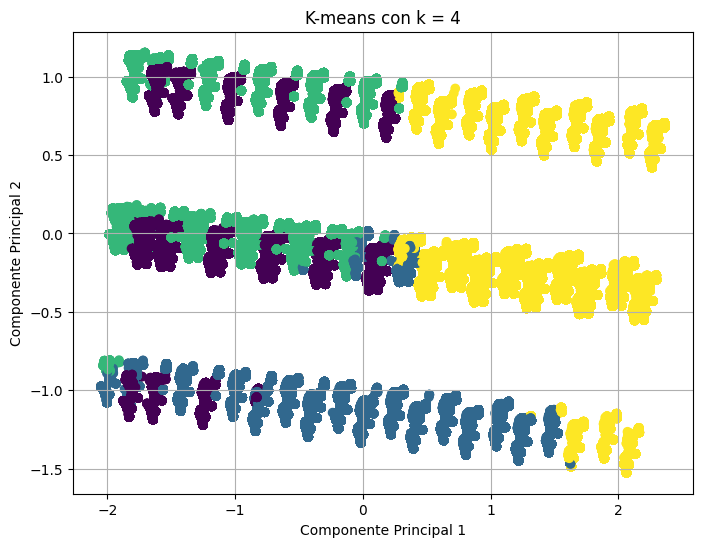

In [271]:
#Se vuelve a generar el modelo con la totalidad de los datos y se gráfica su distribución
reduccion_kmeans = pca.fit_transform(df_cluster)
resultados_kmeans = pd.DataFrame(data=reduccion_kmeans, columns=["C1", "C2"])
resultados_np_kmeans = resultados_kmeans.values

kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=20).fit(df_cluster)
plt.figure(figsize=(8, 6))

plt.scatter(resultados_kmeans["C1"], resultados_kmeans["C2"], c = kmeans4.labels_)
unique, counts = np.unique(kmeans4.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Mostrar los resultados
print(cluster_counts)

plt.title('PCA de 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('K-means con k = 4')
plt.grid()
plt.show()

Se puede notar que si bien se usa una cantidad considerablemente mayor de datos la distribución de las clases es muy similar a la obtenida anteriormente.

In [272]:
# Función para calcular las estadísticas por cluster
def calcular_estadisticas(df, cluster_column, columnas):
    estadisticas = {}
    for columna in columnas:
        stats = df.groupby(cluster_column)[columna].agg(
            ['min', 'max', 'mean', 'median', 'std']
        ).reset_index()
        estadisticas[columna] = stats
    return estadisticas

In [273]:
#Datos utilizados para generar el modelo de cluster
df_cluster.describe(include='all')

GRUPO_EDAD    INTERV_Q_1    INTERV_Q_2   SEXO_HOMBRE    SEXO_MUJER  \
count  4.278334e+06  4.278334e+06  4.278334e+06  4.278334e+06  4.278334e+06   
mean   4.860676e-16  4.455524e-01  5.544476e-01  4.213741e-01  5.786259e-01   
std    1.000000e+00  4.970267e-01  4.970267e-01  4.937793e-01  4.937793e-01   
min   -1.871094e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%   -8.555960e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%   -9.347835e-03  0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
75%    8.369003e-01  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
max    2.127429e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       PERTENENCIA_ESTABLECIMIENTO_SALUD_1  \
count                         4.278334e+06   
mean                          6.003671e-01   
std                           4.898229e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           1.000000e+00   
75%                           1.000000e+00   
max                           1.000000e+00   

       PERTENENCIA_ESTABLECIMIENTO_SALUD_2  \
count                         4.278334e+06   
mean                          3.996329e-01   
std                           4.898229e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           0.000000e+00   
75%                           1.000000e+00   
max                           1.000000e+00   

       DIAG1_Ciertas afecciones originadas en el período perinatal  \
count                                       4.278334e+06             
mean                                        2.008936e-02             
std                                         1.403060e-01             
min                                         0.000000e+00             
25%                                         0.000000e+00             
50%                                         0.000000e+00             
75%                                         0.000000e+00             
max                                         1.000000e+00             

       DIAG1_Ciertas enfermedades infecciosas y parasitarias  \
count                                       4.278334e+06       
mean                                        1.734928e-02       
std                                         1.305691e-01       
min                                         0.000000e+00       
25%                                         0.000000e+00       
50%                                         0.000000e+00       
75%                                         0.000000e+00       
max                                         1.000000e+00       

       DIAG1_Códigos para propósitos especiales  ...  \
count                              4.278334e+06  ...   
mean                               3.818075e-02  ...   
std                                1.916324e-01  ...   
min                                0.000000e+00  ...   
25%                                0.000000e+00  ...   
50%                                0.000000e+00  ...   
75%                                0.000000e+00  ...   
max                                1.000000e+00  ...   

       GLOSA_REGION_RESIDENCIA_De Los Lagos  \
count                          4.278334e+06   
mean                           5.267588e-02   
std                            2.233856e-01   
min                            0.000000e+00   
25%                            0.000000e+00   
50%                            0.000000e+00   
75%                            0.000000e+00   
max                            1.000000e+00   

       GLOSA_REGION_RESIDENCIA_De Los Ríos  \
count                         4.278334e+06   
mean                          2.384503e-02   
std                           1.525662e-01   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           0.000000e+00   
75%     

Para poder hacer una correcta caracterización se deben regresar las columnas hechas con get_dummies() a su composición original. Para esto se se puede usar el método from_dummies()

In [274]:
# Se devuelven las columnas creadas con get_dummies a sus valores originales
df_cluster['INTERV_Q'] = pd.from_dummies(data = df_cluster.filter(like = 'INTERV_Q_'), sep = 'INTERV_Q_').astype(int)
df_cluster['SEXO'] = pd.from_dummies(data = df_cluster.filter(like = 'SEXO_'), sep = 'SEXO_')
df_cluster['PERTENENCIA_ESTABLECIMIENTO SALUD'] = pd.from_dummies(data = df_cluster.filter(like = 'PERTENENCIA_ESTABLECIMIENTO_SALUD_'), sep = 'PERTENENCIA_ESTABLECIMIENTO_SALUD_').astype(int)
df_cluster['DIAG1'] = pd.from_dummies(data = df_cluster.filter(like = 'DIAG1_'), sep = 'DIAG1_')
df_cluster['REGION_RESIDENCIA'] = pd.from_dummies(data = df_cluster.filter(like = 'GLOSA_REGION_RESIDENCIA_'), sep = 'GLOSA_REGION_RESIDENCIA_')

In [275]:
df_cluster = df_cluster[['GRUPO_EDAD', 'INTERV_Q', 'SEXO', 'REGION_RESIDENCIA', 'DIAG1', 'PERTENENCIA_ESTABLECIMIENTO SALUD']]
df_cluster = df_cluster.join(ds_numeric[['CONDICION_EGRESO', 'DIAS_ESTADA']])

In [276]:
df_cluster['GRUPO_EDAD'] = standar_scaler.inverse_transform(df_cluster[['GRUPO_EDAD']])

In [277]:
df_cluster.describe(include='all')

GRUPO_EDAD      INTERV_Q     SEXO          REGION_RESIDENCIA  \
count   4.278334e+06  4.278334e+06  4278334                    4278334   
unique           NaN           NaN        2                         16   
top              NaN           NaN    MUJER  Metropolitana de Santiago   
freq             NaN           NaN  2475555                    1790828   
mean    4.013776e+00  1.554448e+00      NaN                        NaN   
std     3.506407e+00  4.970267e-01      NaN                        NaN   
min    -2.547039e+00  1.000000e+00      NaN                        NaN   
25%     1.013709e+00  1.000000e+00      NaN                        NaN   
50%     3.980998e+00  2.000000e+00      NaN                        NaN   
75%     6.948288e+00  2.000000e+00      NaN                        NaN   
max     1.147340e+01  2.000000e+00      NaN                        NaN   

                              DIAG1  PERTENENCIA_ESTABLECIMIENTO SALUD  \
count                       4278334                       4.278334e+06   
unique                           21                                NaN   
top     Embarazo, parto y puerperio                                NaN   
freq                         692964                                NaN   
mean                            NaN                       1.399633e+00   
std                             NaN                       4.898229e-01   
min                             NaN                       1.000000e+00   
25%                             NaN                       1.000000e+00   
50%                             NaN                       1.000000e+00   
75%                             NaN                       2.000000e+00   
max                             NaN                       2.000000e+00   

        CONDICION_EGRESO   DIAS_ESTADA  
count       4.278334e+06  4.278334e+06  
unique               NaN           NaN  
top                  NaN           NaN  
freq                 NaN           NaN  
mean        1.030465e+00  4.013776e+00  
std         1.718634e-01  3.506407e+00  
min         1.000000e+00  1.000000e+00  
25%         1.000000e+00  1.000000e+00  
50%         1.000000e+00  2.000000e+00  
75%         1.000000e+00  6.000000e+00  
max         2.000000e+00  1.100000e+01

Con el dataframe de vuelta a su distribución original se pueden calcular métricas estadisticas para las variables que tienen variables númericas para analizar como se distribuyen.

In [278]:
# Se presentan las estadísticas para ciertas variables numericas en cada método
df_kmeans4 = df_cluster.copy()
df_kmeans4['cluster'] = kmeans4.labels_

columnas = ['GRUPO_EDAD', 'INTERV_Q', 'PERTENENCIA_ESTABLECIMIENTO SALUD', 'DIAS_ESTADA', 'CONDICION_EGRESO'] 

# Calcular estadísticas para el modelo
estadisticas_modelo_1 = calcular_estadisticas(df_kmeans4, 'cluster', columnas)

# Mostrar resultados
for columna, stats in estadisticas_modelo_1.items():
    print(f'Estadísticas de {columna} para Kmeans con k = 4:')
    print(stats)
    print()

Estadísticas de GRUPO_EDAD para Kmeans con k = 4:
   cluster       min        max      mean    median       std
0        0 -2.547039   3.980998  0.561842  1.013709  2.337687
1        1 -2.547039   9.915578  4.024556  3.980998  2.390846
2        2 -2.547039   5.464643  1.344544  1.013709  1.819327
3        3  3.980998  11.473405  7.686842  6.948288  1.705188

Estadísticas de INTERV_Q para Kmeans con k = 4:
   cluster  min  max      mean  median       std
0        0    1    2  1.645510     2.0  0.478359
1        1    1    2  1.063988     1.0  0.244732
2        2    1    2  1.701181     2.0  0.457740
3        3    1    2  1.771336     2.0  0.419972

Estadísticas de PERTENENCIA_ESTABLECIMIENTO SALUD para Kmeans con k = 4:
   cluster  min  max      mean  median       std
0        0    1    2  1.300959     1.0  0.458675
1        1    1    2  1.983593     2.0  0.127036
2        2    1    2  1.152825     1.0  0.359819
3        3    1    2  1.193111     1.0  0.394739

Estadísticas de DIAS_ESTAD

Además se pueden generar para todas las columnas el % de datos de cierta categoría que se encuentran en cada cluster. Esto es por ejemplo, que porcentaje del total de personas con condicion de egreso = 2 se encuentran en el cluster 3. Con esto se puede hacer un mejor análisis de como se distribuyen las clases en los cluster para poder hacer la caracterización.

In [279]:
# Iterar sobre cada cluster y calcular los porcentajes por columna
for column in df_kmeans4.columns[:-1]:  # Iterar sobre todas las columnas excepto 'cluster'
    print(f"\nColumna: {column}")
    for value in df_kmeans4[column].unique():
        total_value_count = df_kmeans4[df_kmeans4[column] == value].shape[0]
        print(f"Valor: {value} (Total: {total_value_count})")
        for cluster in clusters:
            cluster_data = df_kmeans4[df_kmeans4['cluster'] == cluster]
            cluster_value_count = cluster_data[cluster_data[column] == value].shape[0]
            percentage = (cluster_value_count / total_value_count) * 100
            print(f"  Cluster: {cluster}, Porcentaje: {percentage:.2f}%, Conteo: {cluster_value_count}")


Columna: GRUPO_EDAD
Valor: -1.8793988310695973 (Total: 217740)
  Cluster: 1, Porcentaje: 5.85%, Conteo: 12744
  Cluster: 2, Porcentaje: 33.92%, Conteo: 73854
  Cluster: 3, Porcentaje: 0.00%, Conteo: 0
  Cluster: 4, Porcentaje: 0.00%, Conteo: 0
  Cluster: 5, Porcentaje: 0.00%, Conteo: 0
  Cluster: 6, Porcentaje: 0.00%, Conteo: 0
  Cluster: 7, Porcentaje: 0.00%, Conteo: 0
  Cluster: 8, Porcentaje: 0.00%, Conteo: 0
  Cluster: 9, Porcentaje: 0.00%, Conteo: 0
  Cluster: 10, Porcentaje: 0.00%, Conteo: 0
  Cluster: 11, Porcentaje: 0.00%, Conteo: 0
  Cluster: 12, Porcentaje: 0.00%, Conteo: 0
  Cluster: 13, Porcentaje: 0.00%, Conteo: 0
  Cluster: 14, Porcentaje: 0.00%, Conteo: 0
  Cluster: 15, Porcentaje: 0.00%, Conteo: 0
  Cluster: 16, Porcentaje: 0.00%, Conteo: 0
  Cluster: 17, Porcentaje: 0.00%, Conteo: 0
  Cluster: 18, Porcentaje: 0.00%, Conteo: 0
  Cluster: 19, Porcentaje: 0.00%, Conteo: 0
  Cluster: 20, Porcentaje: 0.00%, Conteo: 0
Valor: -0.46993620962623783 (Total: 239525)
  Cluster: 1

Para visualizar mejor estos resultados se puede graficar la distribución de las columnas de interés para la caracterización, siendo estas, la cantidad de dias de estadia de los pacientes y su condición de egreso. Además se incluye un gráfico de la distribución de los grupos de edad en cada cluster ya que se intuye es una de las variables más determinantes en la urgencia de un paciente.

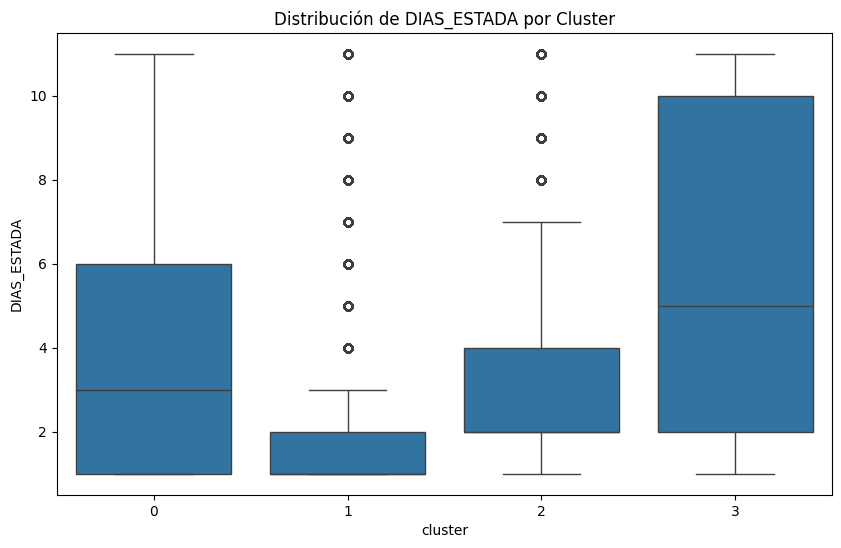

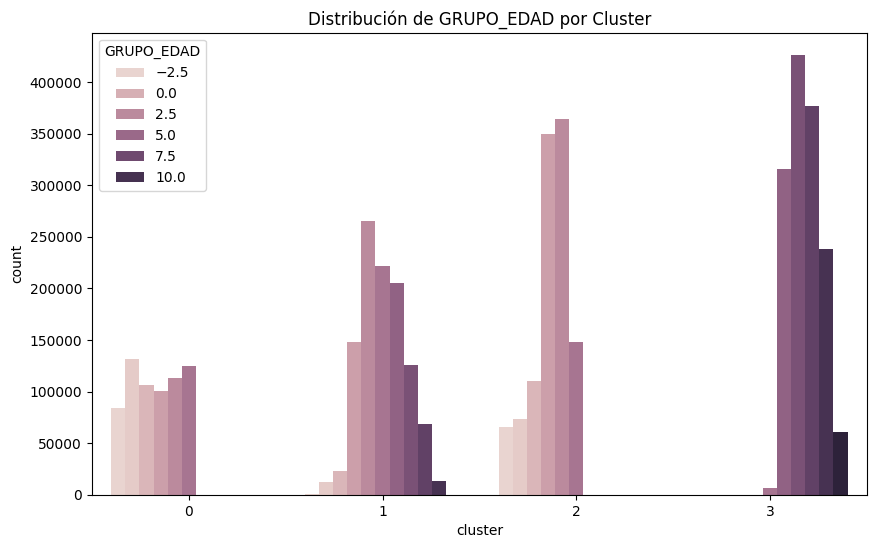

In [280]:
# Graficar la distribución de DIAS_ESTADA por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='DIAS_ESTADA', data=df_kmeans4)
plt.title('Distribución de DIAS_ESTADA por Cluster')
plt.show()

# Graficar la distribución de GRUPO_EDAD por cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='GRUPO_EDAD', data=df_kmeans4)
plt.title('Distribución de GRUPO_EDAD por Cluster')
plt.show()

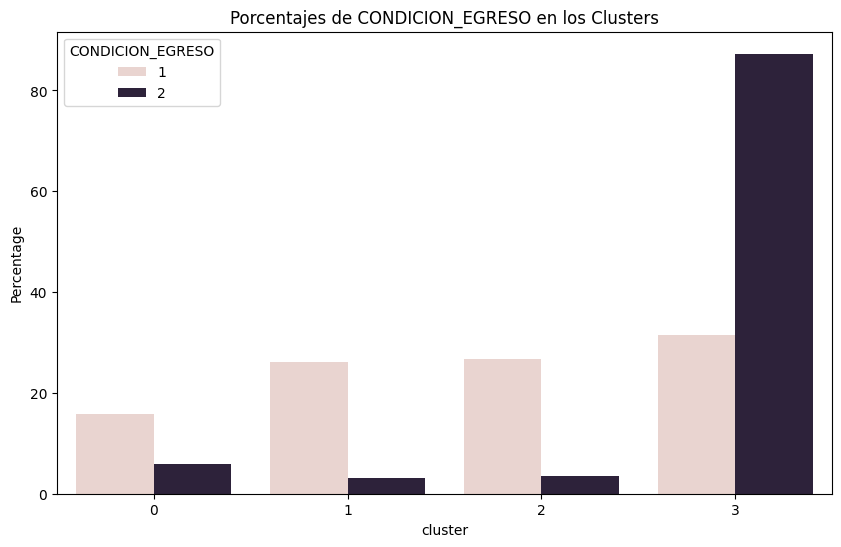

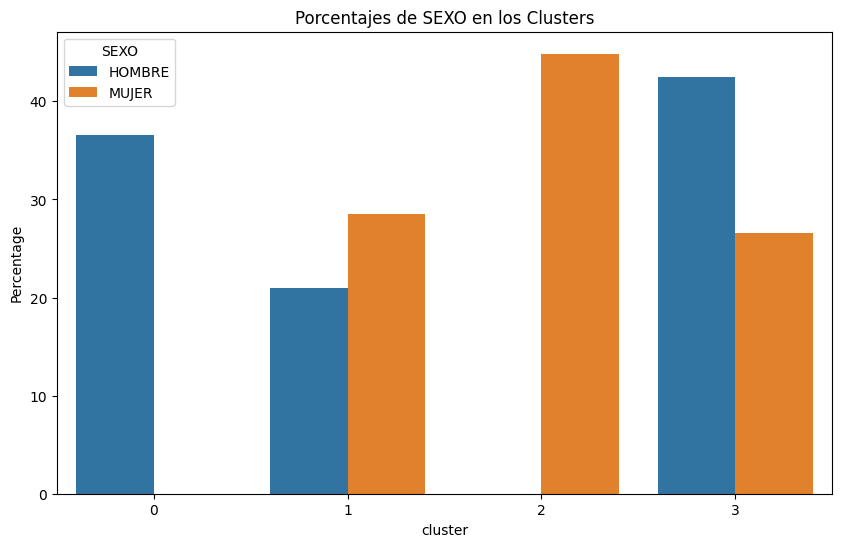

In [281]:
# Calcular los porcentajes de CONDICION_EGRESO en cada cluster
condition_totals = df_kmeans4['CONDICION_EGRESO'].value_counts()
condition_percentages = df_kmeans4.groupby(['CONDICION_EGRESO', 'cluster']).size().unstack().apply(lambda x: x / condition_totals * 100).stack().reset_index(name='Percentage')

# Graficar los porcentajes de CONDICION_EGRESO en los clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Percentage', hue='CONDICION_EGRESO', data=condition_percentages)
plt.title('Porcentajes de CONDICION_EGRESO en los Clusters')
plt.show()

# Calcular los porcentajes de SEXO en cada cluster
condition_totals = df_kmeans4['SEXO'].value_counts()
condition_percentages = df_kmeans4.groupby(['SEXO', 'cluster']).size().unstack().apply(lambda x: x / condition_totals * 100).stack().reset_index(name='Percentage')

# Graficar los porcentajes de CONDICION_EGRESO en los clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Percentage', hue='SEXO', data=condition_percentages)
plt.title('Porcentajes de SEXO en los Clusters')
plt.show()

In [282]:
diagnosis_mapping = {
    'Malformaciones congénitas, deformidades y anomalías cromosómicas': 'Enfermedades congenitas',
    'Factores que influyen en el estado de salud y contacto con los  servicios de salud': 'Factores salud',
    'Enfermedades del sistema genitourinario': 'Sistema genitourinario',
    'Enfermedades del sistema respiratorio ': 'Sistema respiratorio',
    'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas': 'Causas externas',
    'Enfermedades de la piel y del tejido subcutáneo': 'Enfermedades piel',
    'Enfermedades del ojo y sus anexos ': 'Enfermedades de ojos',
    'Enfermedades del sistema digestivo': 'Sistema digestivo',
    'Enfermedades del sistema circulatorio ': 'Sistema circulatorio',
    'Ciertas enfermedades infecciosas y parasitarias': 'Infecciones y parasitos',
    'Enfermedades del sistema osteomuscular y del tejido conjuntivo': 'Sistema osteomuscular',
    'Enfermedades del sistema nervioso central': 'Sistema nerv. central',
    'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ': 'Sangre y hematopoyeticos',
    'Enfermedades endocrinas, nutricionales y metabólicas': 'Enfermedades endrocrinas',
    'Códigos para propósitos especiales': 'Causas especiales',
    'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte': 'Sin clasificación',
    'Tumores [Neoplasias]': 'Tumores',
    'Enfermedades del oído y de la apófisis mastoides': 'Enfermedades oido',
    'Trastornos mentales y del comportamiento': 'Trastornos mentales',
    'Ciertas afecciones originadas en el período perinatal': 'Periodo perinatal',
    'Embarazo, parto y puerperio': 'Embarazo'
}

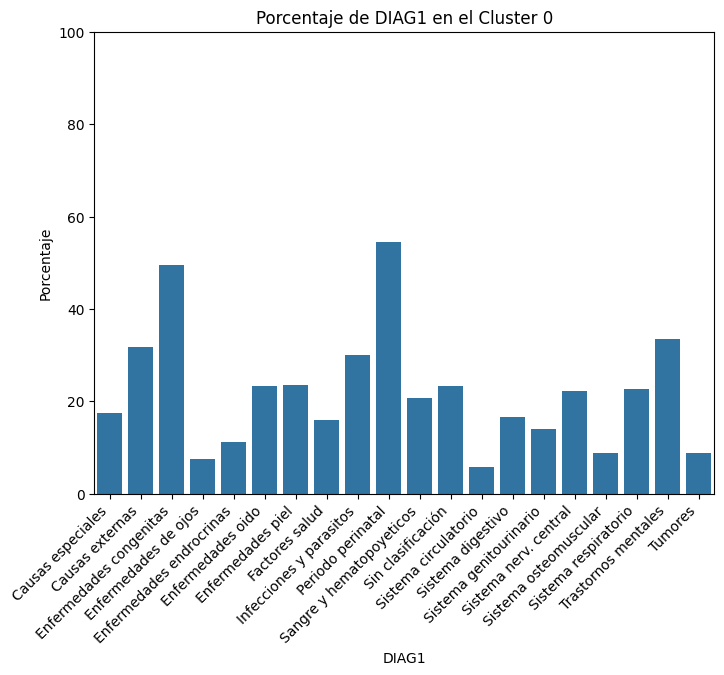

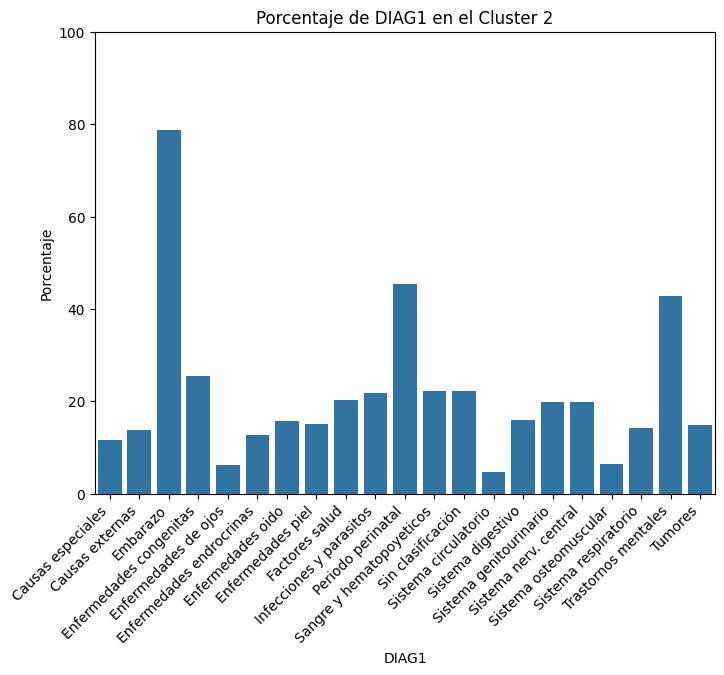

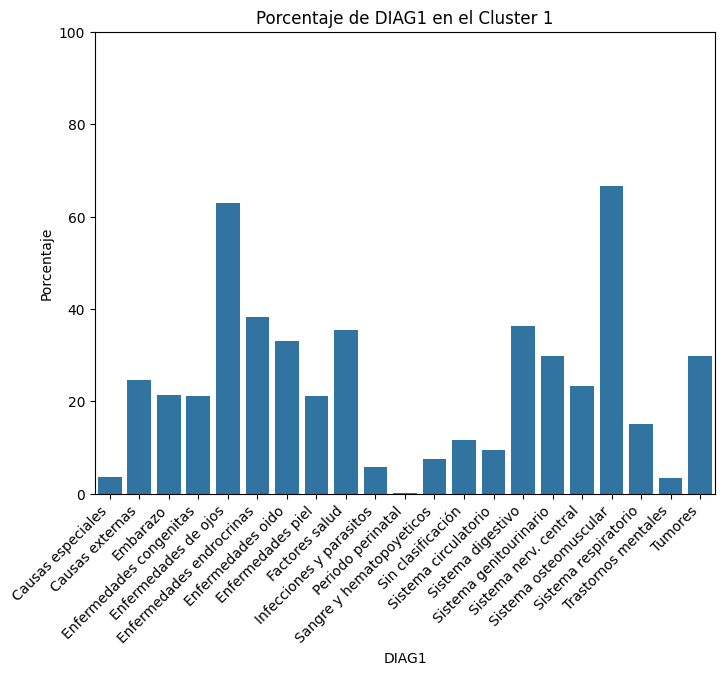

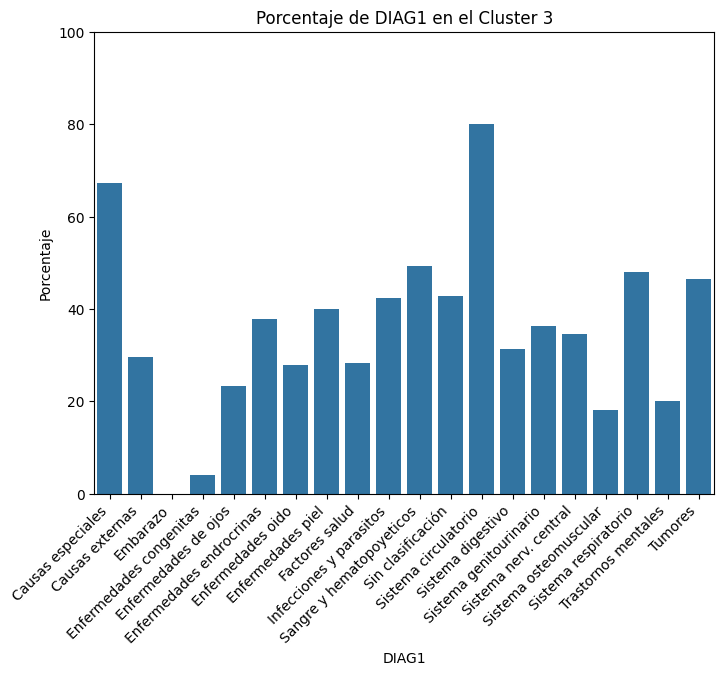

In [283]:
# Calcular los porcentajes de DIAG1 en cada cluster
df_kmeans4['DIAG_abr'] = df_kmeans4['DIAG1'].map(diagnosis_mapping)
diag_totals = df_kmeans4['DIAG_abr'].value_counts()
diag_percentages = df_kmeans4.groupby(['DIAG_abr', 'cluster']).size().unstack().apply(lambda x: x / diag_totals * 100).stack().reset_index(name='Percentage')

# Crear gráficos de barras por separado para cada cluster
clusters = df_kmeans4['cluster'].unique()
for cluster in clusters:
    cluster_data = diag_percentages[diag_percentages['cluster'] == cluster]
    plt.figure(figsize=(8, 6))
    sns.barplot(x='DIAG_abr', y='Percentage', data=cluster_data)
    plt.title(f'Porcentaje de DIAG1 en el Cluster {cluster}')
    plt.ylim(0, 100)
    plt.ylabel('Porcentaje')
    plt.xlabel('DIAG1')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x
    plt.show()

#### Conclusiones - Pregunta 2

Podemos ver que en las 3 variables graficadas se pueden observar distribuciones claras entre los clusters, además de distintos porcentajes de presencia de los distintos diagnosticos en cada cluster. Esto permite responder afirmativamente la pregunta propuesta, pues se logró encontrar agrupaciones de pacientes con distinto nivel de urgencia de atención según  su edad, sexo, región, pertencia al sistema nacional de salud, y diagnostico/intervencion quirúrgica .

De esta manera se puede esbozar la siguiente caracterización:

- Cluster 0: Pacientes hombres de corta edad, con estancias variadas y una proporción de fallecimientos importante. En este cluster se aglomeran la mayoria de pacientes que acuden por enfermedades del periodo perinatal y enfermedades congenitas. Con esto se podria otorgar a este cluster un nivel de atención de urgencia alto por la alta proporción en la mortalidad y la corta edad junto con la indole de los diagnosticos de los pacientes.

- Cluster 1: Pacientes de todas las edades con estancias en su mayoria cortas. La gran mayoria con condición de egreso favorable y diagnosticos menos riesgosos (enfermedades de los ojos y sistemas osteomuscular). Se le otorga un nivel de urgencia de atención bajo.

- Cluster 2: Pacientes de mediana a avanzada edad, con estancias cortas y baja proporción de fallecimientos. Si miramos más a detalle los diagnósticos en este cluster se puede notar que la gran mayoría corresponde a casos de embarazos o problemas en el sistema genitourinario, además la totalidad de pacientes de este cluster corrresponde a mujeres en edad fertil. Además la condición de egresos de estos pacientes es en su mayoría favorable. Se le otorga a este cluster un nivel de urgencia de atención moderado.

- Cluster 3: en su gran mayoría pacientes de una edad avanzada, con periodos de estadia extendidos y diagnosticos más severos (enfermedades del sistema circulatorio, respitaroio y causas especiales). La gran mayoría de pacientes con condición de egreso desfavorable se agrupan en este cluster por lo que el nivel de urgencia de atención de estos paciente es crítico.

Destacar que si bien existe una partición de los datos, los resultados obtenidos por los modelos no son realmente óptimos y sigue existiendo diversidad de categorías en las agrupaciones encontradas (se esperaban grupos más disjuntos para poder etiquetar estos mismos de manera determinante). Se espera que realizando mejores transformaciones a los datos iniciales se obtendrían mejores resultados para la mayoría de los modelos. Además se podría hacer un análisis más extenso probando modelos con una mayor cantidad de clusters para generar grupos más disjuntos y etiquetar de mejor manera cada uno de estos en particular. 

Otros resultados interesantes podrían nacer de aplicar modelos de clustering a los datos considerando unicamente 'DIAS_ESTADA', 'CONDICION_EGRESO' y 'DIAG1' para analizar la existencia de grupos por edad, sexo y otras caracteristicas de las personas. 

## Pregunta 3


### ¿Cuáles son los factores que más influyen en la condición de egreso del paciente (si sobrevive o no) considerando variables como edad, sexo, región, pertenencia al sistema nacional de salud, diagnóstico principal y si fue intervenido quirúrgicamente? 

Para poder responder completamente esta pregunta, primero debemos definir un concepto llamado como 'feature importance', el cual se refiere al estudio de cuales atributos dentro de nuestros datos de entrenamiento tienen la mayor influencia sobre una correcta predicción de los datos. De esta forma, será este concepto el que guíe nuestro analísis.

In [284]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

1. Preprocesamiento de Datos

#### Limpieza de Datos
Se eliminan las filas con valores faltantes para asegurar que el análisis se realice sobre un conjunto de datos completo:

In [285]:
nuevo = ds[['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'COMUNA_RESIDENCIA', 'REGION_RESIDENCIA', 'DIAG1', 'DIAS_ESTADA', 'CONDICION_EGRESO', 'INTERV_Q']].copy()
nuevo = nuevo.dropna()

#### Manipulación de datos

Aquí, nos encargamos de ajustar los valores de nuestros datos para que funcionen con nuestro distintos modelos.

Primero cambiamos las edades desde intervalos a un valor fijo numerico en el punto medio, o el valor extremo en los casos borde (Menor a 1 año es 1 y mayores a 90 es 90).
Luego, debemos modificar los valores de nuestra variable objetivo 'CONDICION_EGRESO', para que tenga valores de 0 y 1 (En vez del 1 y 2 que tiene inicialmente).

In [286]:
def intervalo_a_punto_medio(intervalo):
    partes = intervalo.split(' ')
    if partes[0] == 'menor':
        return 1
    elif partes[0] == '90':
        return 90
    else:
        return (int(partes[0]) + int(partes[2])) / 2

nuevo['GRUPO_EDAD'] = nuevo['GRUPO_EDAD'].apply(intervalo_a_punto_medio)
nuevo['CONDICION_EGRESO'] = nuevo['CONDICION_EGRESO'].apply(lambda x: 0 if x == 1 else 1)

#### Agrupación de atributos, manejo variables categoricas y sampling

En esta parte, debemos primero reconocer nuestras variables de tipo categórico, pues estas deben ser convertidas a valores númericos para poder aplicar ciertos modelos. Para esto, podríamos implementar  'Dummies', sin embargo en esta experimentación se busca indagar sobre la importancia de cada 'feature' para la capacidad predictiva de cada modelo, por lo tanto al incluir dummies solo podriamos indagar sobre la capacidad predictiva particular de cada valor diferente que exista para las columnas categoricas (Pues el dummies agrega columnas correspondientes para cada valor). De esta forma, aplicamos un truco de hashing cambiando a valores "únicos" a cada valor categórico pero de tipo numérico. Es importante notar que este truco no es de la autoría del grupo, si no que fue obtenido desde una pagina web externa ([Medium][1]). Por último, aplicamos un sample de los datos por temas de eficiencia, dejando así un conjunto de 100.000 datos.

[1]: https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f

In [ ]:
cat_col = ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'DIAG1']
num_col = ['GRUPO_EDAD', 'COMUNA_RESIDENCIA', 'REGION_RESIDENCIA', 'DIAS_ESTADA', 'INTERV_Q']

for col in cat_col:
    nuevo[col] = nuevo[col].apply(lambda x: hash(x) % 1000)

nuevo_sample = nuevo.sample(n=100000, random_state=42)

2. Balanceo de Clases

Como se pudo ver en la exploración de datos inicial, existen muchas más instancias de no muertes que de las muertes, por lo tanto es necesario hacer un balanceo de clases para poder entrenar de manera correcta los modelos. Esto lo hacemos aplicando SMOTE.

In [287]:
# Balance classes using SMOTE
X = nuevo_sample.drop(columns=['CONDICION_EGRESO'])
y = nuevo_sample['CONDICION_EGRESO']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

y_res = y_res.astype(int)

3. División del conjunto de datos

Aquí realizamos una división 80-20, dejando 20% de nuestros datos para el entrenamiento y el otro 80 para el testing.

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

4. Creación de modelos

La elección de estos 3 modelos, tiene que ver directamente con el concepto de  'feature importance', pues el cálculo de este dato tiene diversas maneras de ser calculado.

- RandomForest y GradientBoosting: Al ser modelos basados en arboles de desición, la importancia de cada atributo se calcula según la variación de alguna métrica de pureza de los datos (Gini, entropía, etc.). La importancia total es 1.
- KNN: Se basa en el concepto de la "Permutation importance", de manera que se calcula la importancia de un atributo viendo cuanto aumenta el error de predicción del modelo al permutar los valores asociados a este. Pueden no ser 1, por ende para nuestro analísis serán normalizados los datos.
- Logistic regression: Al tratarse de un modelo lineal, la importancia de los atributos se basa en la magnitud de los coeficientes asociados a cada uno, es por esto mismo que la importancia puede incluso llegar a ser negativa. Es importante notar que se eligió la regresión logística por sobre la lineal, pues se trata de un problema de clasificación binaria.

De esta forma, vemos que se tienen 3 métricas distintas para la importancia de los atributos, permitiendonos tener u analísis más robusto y completo.

In [289]:
modelos1 = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [10, 20, 30]}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'LogisticRegression': (LogisticRegression(max_iter=2000), {'C': [0.01, 0.1, 1, 10, 100]})  # Hyperparameters for GridSearchCV
}

5. Busqueda mejores hiperparámetros

Aquí utlizamos GridSearch para encontrar los mejores hiperparámetros para cada modelo, y así poder usarlos más adelante.

In [290]:
best_models = {}
for key in modelos1:
    print(key)
    model, param_grid = modelos1[key]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[key] = grid_search.best_estimator_

RandomForest
GradientBoosting
KNN
LogisticRegression


6. Evaluación de modelos

Primero definimos una función auxiliar 'evaluar_modelo' la cual se encargará de recopilar todas las métricas definidas en la metodología (Classification Report, Confusion Matrix y ROC AUC).

In [291]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)
    
    print(f"Classification Report for {modelo.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    
    print(f"Confusion Matrix for {modelo.__class__.__name__}:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC for {modelo.__class__.__name__}: {roc_auc}")
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    return fpr, tpr, roc_auc, cm

Luego, procedemos a evaluar cada uno de los modelos

Evaluating RandomForest...
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19387
           1       0.96      0.98      0.97     19401

    accuracy                           0.97     38788
   macro avg       0.97      0.97      0.97     38788
weighted avg       0.97      0.97      0.97     38788

Confusion Matrix for RandomForestClassifier:
[[18611   776]
 [  423 18978]]
ROC AUC for RandomForestClassifier: 0.9938379195120506
Evaluating GradientBoosting...
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     19387
           1       0.93      0.93      0.93     19401

    accuracy                           0.93     38788
   macro avg       0.93      0.93      0.93     38788
weighted avg       0.93      0.93      0.93     38788

Confusion Matrix for GradientBoostingClassifier:
[[18

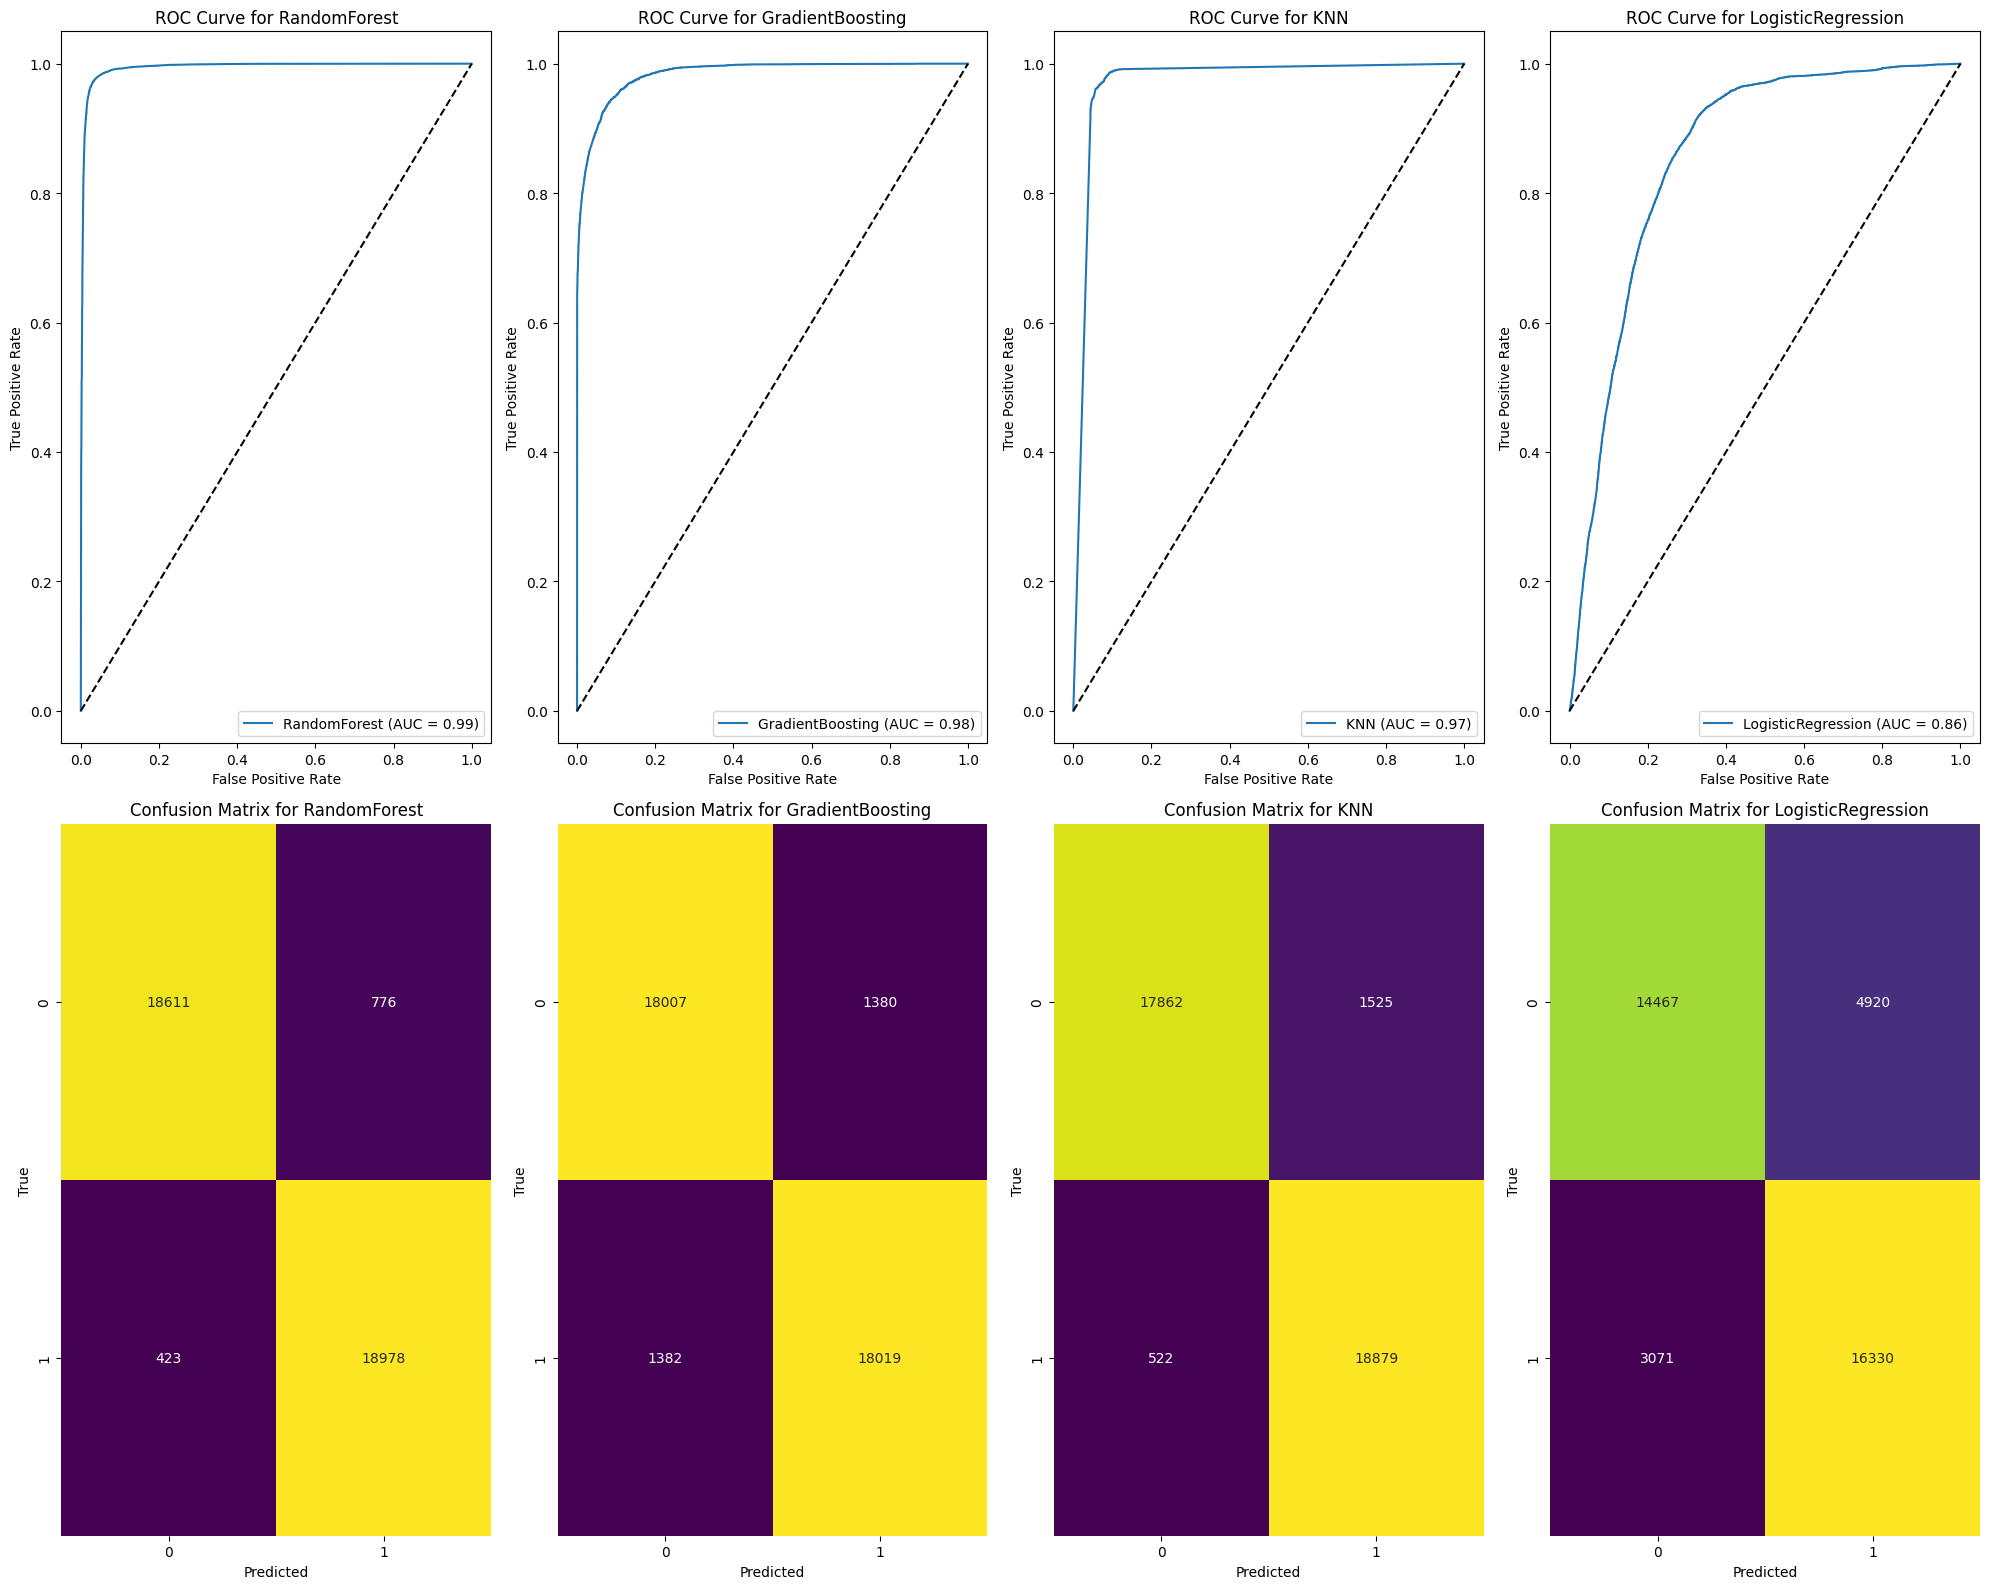

In [316]:
resultados = {}
plt.figure(figsize=(20, 16))
n_models = len(best_models)

for i, (nombre, modelo) in enumerate(best_models.items()):
    print(f"Evaluating {nombre}...")
    fpr, tpr, roc_auc, cm = evaluar_modelo(modelo, X_train, y_train, X_test, y_test)
    resultados[nombre] = (fpr, tpr, roc_auc, cm)
    
    plt.subplot(2, n_models, i + 1)
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {nombre}')
    plt.legend(loc='lower right')

    plt.subplot(2, n_models, n_models + i + 1)
    sns.heatmap(cm, annot=True, cmap="viridis", cbar=False, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {nombre}')

plt.tight_layout()
plt.show()

Analizando los resultados, es claro que todos los modelos presentan una buena capacidad predictiva, excepto por la LogisticRegression, la cual se queda atras ligeramente. Esto se puede evidenciar viendo los valores del classification report, donde los 3 primeros modelos sobrepasan con creces el 90 porciento en todas las métricas, mientras que el Logistic se queda al borde de los 80. Este mismo se vé en las matrices de confusión y las curvas ROC.

7. Evaluación de 'feature importance' para cada modelo

Aquí calculamos la importancia de atributos para los 4 modelos seleccionados, siguiendo la lógica/metrica correspondiente a cada uno acorde a su naturaleza (la cual fué explicada previamente). Además, nos aseguraremos de normalizar los valores, con tal de poder comparar los 4 modelos correctamente.

In [323]:
importance = {}

for key in best_models:
    best_model = best_models[key]
    best_model.fit(X_train, y_train)
    
    if key == "LogisticRegression":
        feature_importances = pd.DataFrame(best_model.coef_[0],
                                           index=X_train.columns,
                                           columns=['importance']).sort_values('importance', ascending=False)
        feature_importances['importance'] = feature_importances['importance'].apply(lambda x: 0 if x < 0 else x)
        feature_importances['importance'] /= feature_importances['importance'].sum()
    elif key == "KNN":
        result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
        feature_importances = pd.DataFrame(result.importances_mean,
                                           index=X_train.columns,
                                           columns=['importance'])
        feature_importances['importance'] /= feature_importances['importance'].sum()
    else:
        feature_importances = pd.DataFrame(best_model.feature_importances_,
                                           index=X_train.columns,
                                           columns=['importance'])
    sorted_importances = feature_importances['importance'].sort_values(ascending=False)
    importance[key] = sorted_importances
    
    print("Feature importance for " + key)
    print(sorted_importances)

Feature importance for RandomForest
GRUPO_EDAD                           0.421132
DIAG1                                0.171378
COMUNA_RESIDENCIA                    0.132010
DIAS_ESTADA                          0.120012
PERTENENCIA_ESTABLECIMIENTO_SALUD    0.074395
REGION_RESIDENCIA                    0.033822
INTERV_Q                             0.030559
SEXO                                 0.016693
Name: importance, dtype: float64
Feature importance for GradientBoosting
GRUPO_EDAD                           0.746638
DIAG1                                0.112204
PERTENENCIA_ESTABLECIMIENTO_SALUD    0.067415
DIAS_ESTADA                          0.046067
COMUNA_RESIDENCIA                    0.014162
INTERV_Q                             0.008183
REGION_RESIDENCIA                    0.003254
SEXO                                 0.002076
Name: importance, dtype: float64
Feature importance for KNN
DIAG1                                0.246443
COMUNA_RESIDENCIA                    0.220629
GRU

Veamos gráficamente la distribución de importancia para cada atributo entre los distintos modelos.

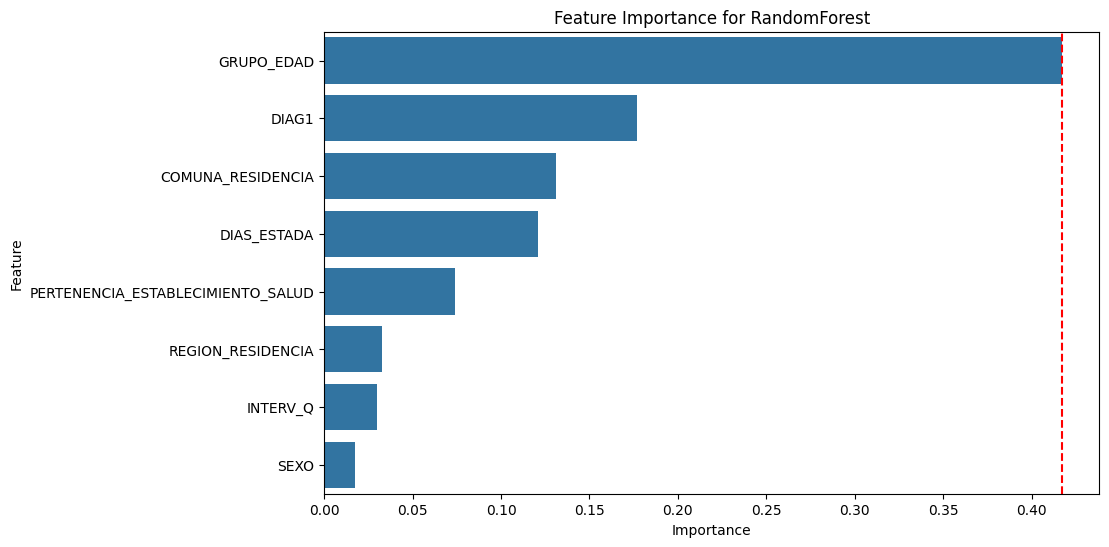

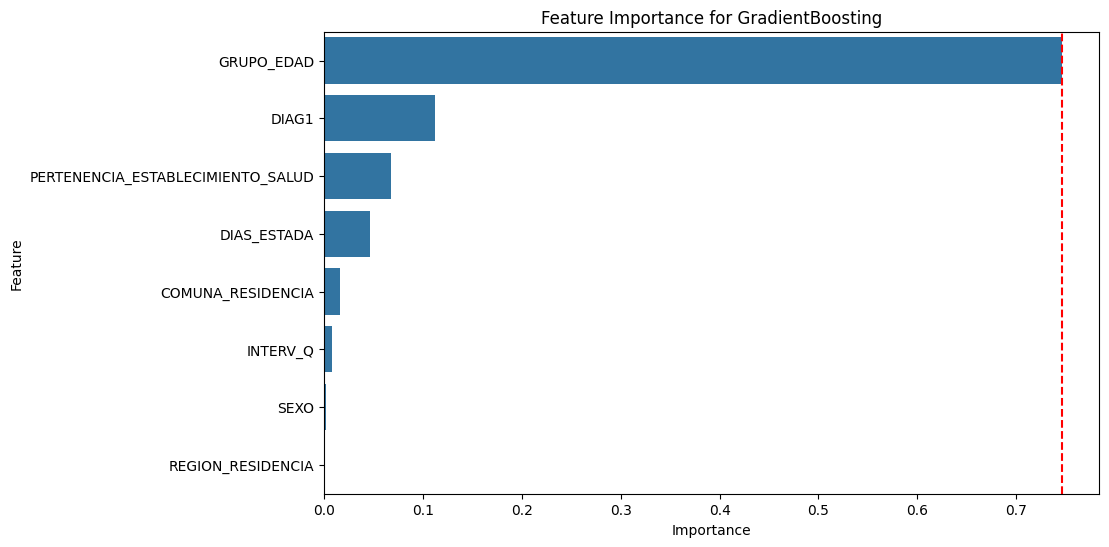

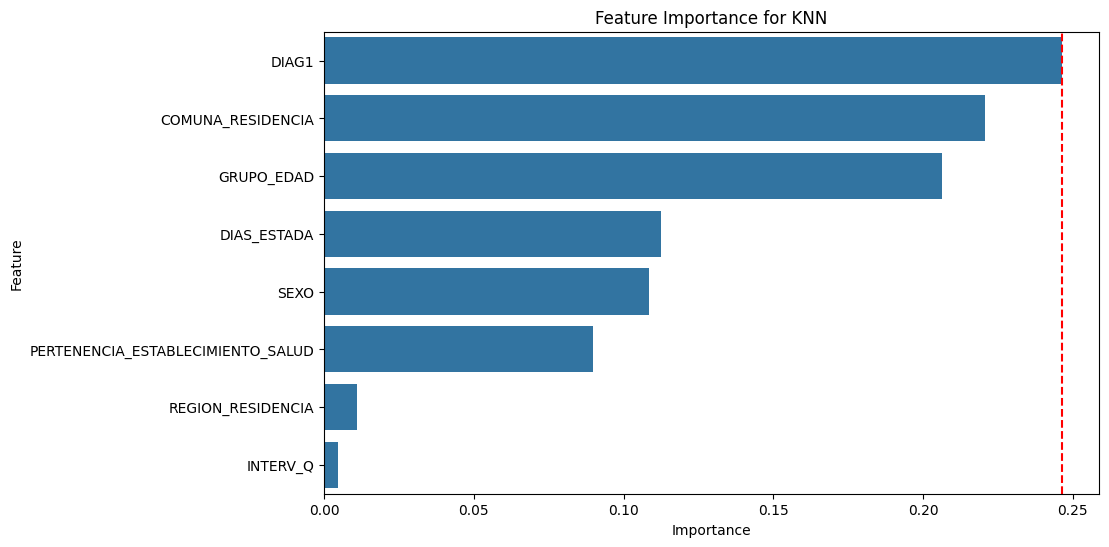

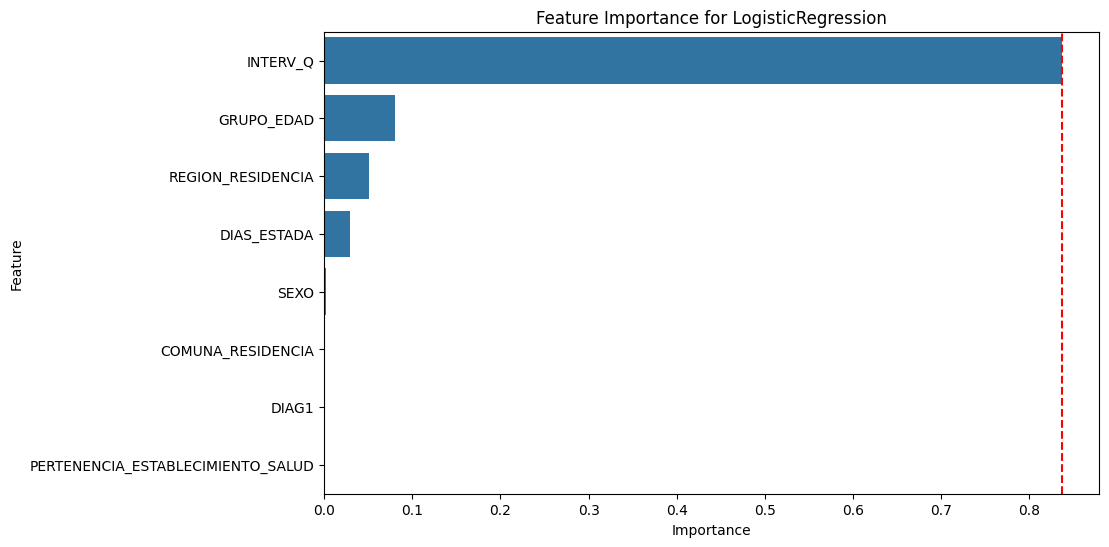

In [311]:
for key, importance_df in importance.items():
    plt.figure(figsize=(10, 6))
    importance_df = importance_df.reset_index()
    importance_df.columns = ['feature', 'importance']
    max_importance = importance_df['importance'].max()
    sns.barplot(x='importance', y='feature', data=importance_df, orient='h')
    plt.axvline(x=max_importance, color='red', linestyle='--')
    plt.title(f'Feature Importance for {key}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Así, veamos como se comparan entre sí las importancias de atributos entre cada uno.

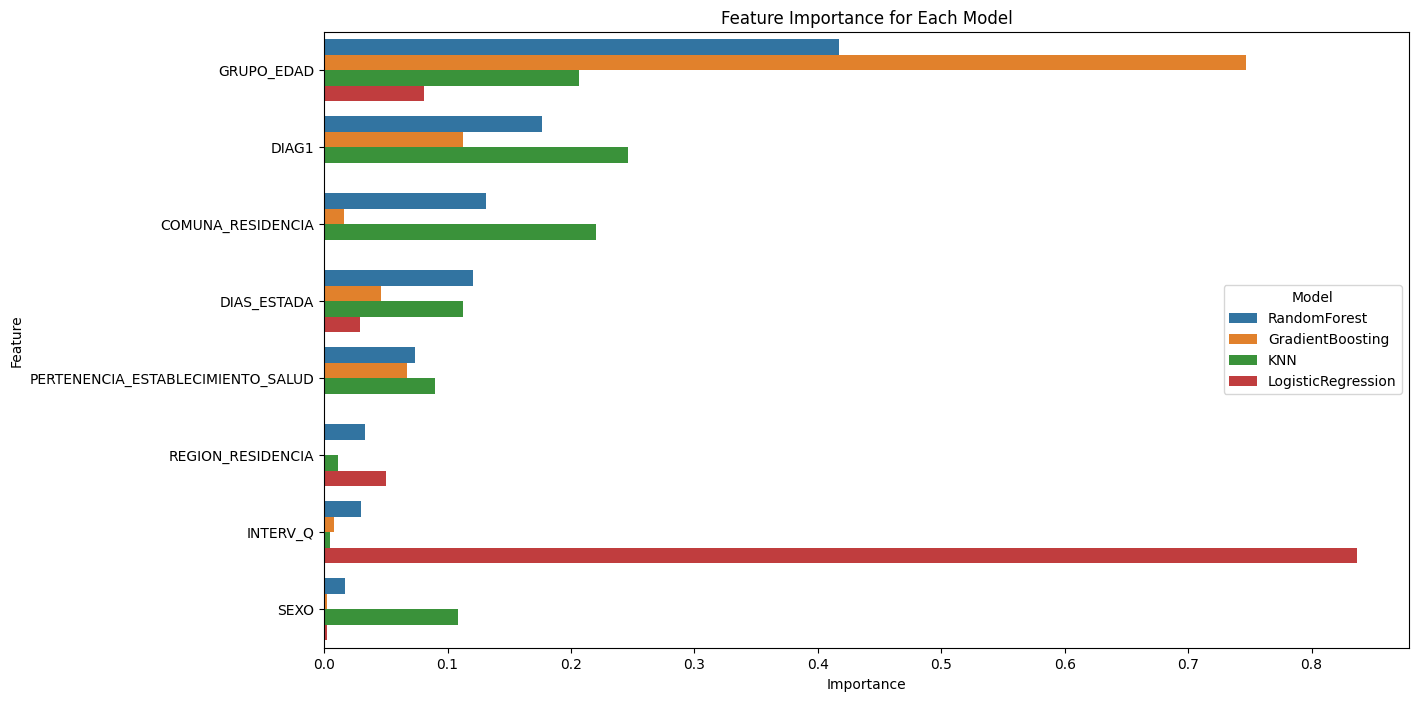

In [312]:
combined_importances = pd.concat(importance.values(), axis=1)
combined_importances.columns = importance.keys()

melted_importances = combined_importances.reset_index().melt(id_vars='index', var_name='Model', value_name='Importance')
melted_importances.rename(columns={'index': 'Feature'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=melted_importances, x='Importance', y='Feature', hue='Model', orient='h')
plt.title('Feature Importance for Each Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.show()

Por último, veamos los resultados finales promediando la importancia absoluta (Normalizada) entre los 4 modelos empleados.

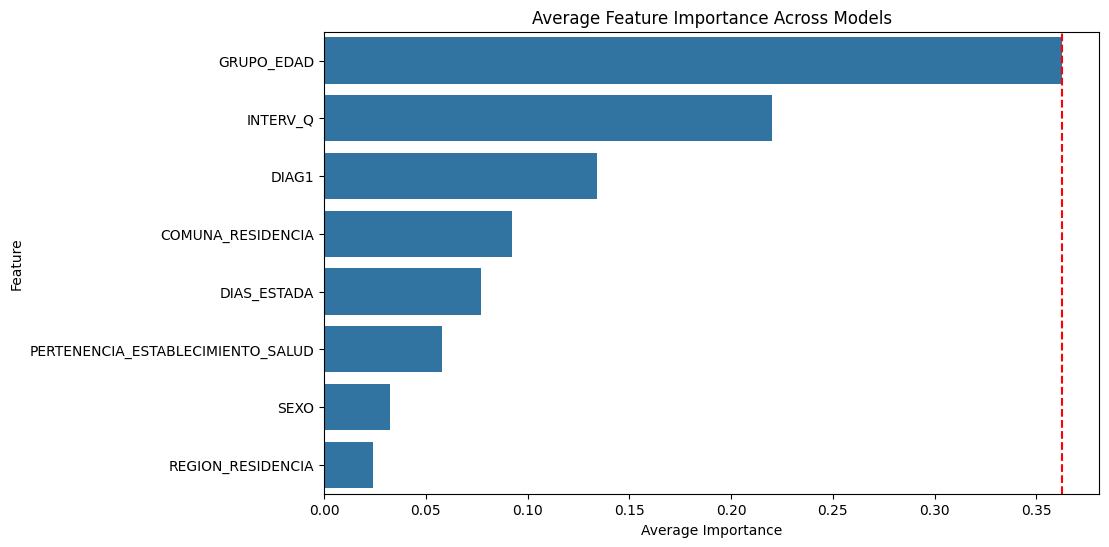

In [317]:
combined_importances = pd.concat(importance.values(), axis=1)
combined_importances.columns = importance.keys()

combined_importances['average_importance'] = combined_importances.mean(axis=1)

plt.figure(figsize=(10, 6))
sorted_importances = combined_importances['average_importance'].sort_values(ascending=False)
max_importance = sorted_importances.max()
sns.barplot(x=sorted_importances, y=sorted_importances.index, orient='h')
plt.axvline(x=max_importance, color='red', linestyle='--')
plt.title('Average Feature Importance Across Models')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()

Sin embargo, es claro que la valoración desproporcionada para INTERV_Q por parte de la LogisticRegression termina por arruinar un poco la visualización de la importancia real de otros atributos. De esta forma, veamos la misma gráfica excluyendo esos resultados.

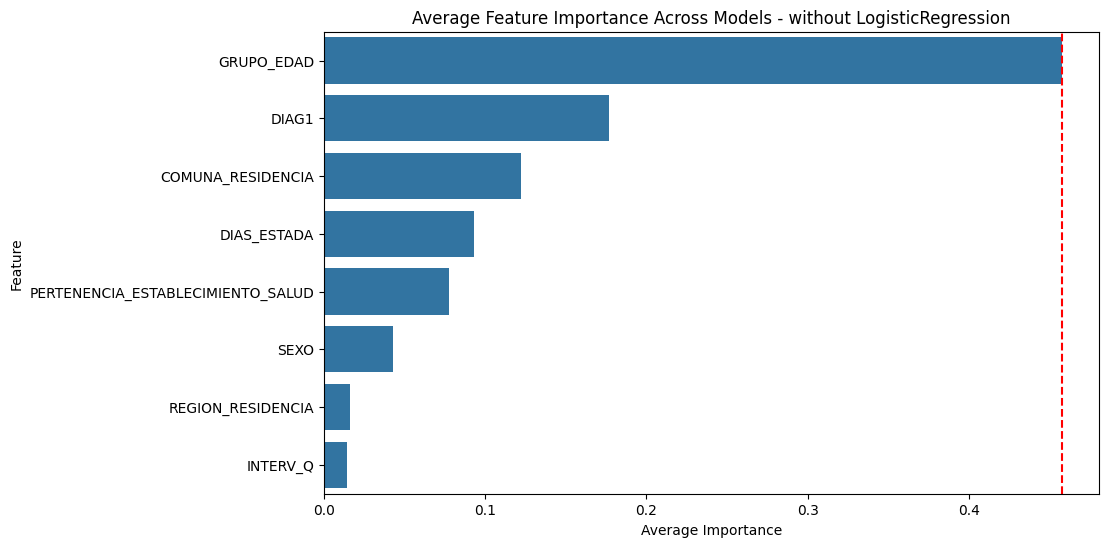

In [325]:
new_importance = importance.copy()
del new_importance["LogisticRegression"]
combined_importances = pd.concat(new_importance.values(), axis=1)
combined_importances.columns = new_importance.keys()

combined_importances['average_importance'] = combined_importances.mean(axis=1)

plt.figure(figsize=(10, 6))
sorted_importances = combined_importances['average_importance'].sort_values(ascending=False)
max_importance = sorted_importances.max()
sns.barplot(x=sorted_importances, y=sorted_importances.index, orient='h')
plt.axvline(x=max_importance, color='red', linestyle='--')
plt.title('Average Feature Importance Across Models - without LogisticRegression')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()

En este segundo gráfico, es posible apreciar que la edad es por lejos lo más influyente en la capacidad predictiva para la condición de egreso, seguidos por el diagnóstico y comuna de residencia que también superan el 10%. La pertenencia a un establacimiento de salud y los dias de estadía también aportan pero ya a menor escala, y ya por último el sexo, región e intervención quirurgica son casi obviables. 

### Conclusiones - Pregunta 3

Analizando los gráficos y los resultados generales, podemos plantearnos responder la pregunta. En primera instancia, viendo el desempeño predictivo de los cuatro modelos, observamos que la gran mayoría tiene muy buenos resultados, lo que nos da un sustento para elegir estos modelos para hacer el estudio de la importancia de atributos (ya que de nada sirve ver la importancia de atributos para modelos que no funcionan). Luego, al realizar las labores de exploración para cada modelo y cómo su desempeño se veía afectado por cambios en cada atributo, podemos concluir lo siguiente:

- Edad: Es claro que el atributo que más peso tiene a la hora de predecir si un paciente sale vivo o muerto es su edad. Este resultado es consistente entre los modelos de Random Forest, Gradient Boosting y Logistic Regression, indicando que la edad es un factor crucial en la condición de egreso de los pacientes.

- Diagnóstico Principal (DIAG1): Este atributo también mostró una alta importancia en varios modelos, particularmente en aquellos con mayor capacidad para capturar relaciones no lineales, como Random Forest y Gradient Boosting. La naturaleza del diagnóstico principal juega un papel vital en la determinación del resultado del paciente.

- Intervención Quirúrgica (INTERV_Q): Debido a la naturaleza de la Logistic Regression, este modelo arroja resultados muy diferentes a los otros modelos, dándole mucha importancia a atributos como INTERV_Q. Esto sugiere que, en la regresión logística, haber sido sometido a una intervención quirúrgica es un factor determinante para predecir la condición de egreso del paciente.

- Residencia y Región: Los atributos relacionados con la residencia del paciente, como COMUNA_RESIDENCIA y REGION_RESIDENCIA, también mostraron importancia en algunos modelos. Aunque su impacto no es tan fuerte como la edad o el diagnóstico principal, estos factores geográficos influyen en los resultados de los pacientes, posiblemente debido a variaciones en la calidad del cuidado médico disponible en diferentes áreas.

- Sexo y Días de Estada: Aunque estos atributos no fueron los más influyentes en todos los modelos, aún mostraron cierta relevancia. El sexo del paciente y la duración de su estadía en el hospital pueden afectar los resultados del tratamiento y, por ende, la condición de egreso.

- Pertenencia al Sistema de Salud (PERTENENCIA_ESTABLECIMIENTO_SALUD): Este atributo mostró una importancia variable entre los modelos. Mientras que en algunos modelos su impacto fue menor, en otros tuvo una influencia moderada, indicando que pertenecer a un establecimiento de salud específico podría afectar el resultado del paciente.

En resumen, la edad del paciente emerge como el factor más determinante en la predicción de su condición de egreso, seguido de cerca por el diagnóstico principal. Estos hallazgos son cruciales para la mejora continua de los modelos predictivos en el ámbito de la salud.

#### Posibles mejoras

La principal mejora a este analísis, sería evitar hacer un sample de la base de datos original, con tal de poder abarcar la mayor cantidad de personas posibles, y en el caso de hacerlo, se podría haber echo un estudio estadístico para asegurarnos que se mantangan las proporciones y a representatividad. Además, se podría hacer este mismo análisis pero ponderado con los resultados obtenidos en la pregunta 2, buscando hacer nexos entre los distintos grupos de interés que se definieron ahí y la importancia de atributos en relación a la mortaliad de cada uno de ellos.

## Conclusión global y posibles mejoras

Si bien en cada pregunta se abordaron las distintas conclusiones pertinentes, de manera general es importante tener claro las proyecciones a futuro y un balance general del proyecto.

De esta forma, vemos que las 3 preguntas abordadas lograron resultados bastante satisfactorios, ahondando el conocimiento y herramientas para las labores médicas.


Por otro lado, como proyección a futuro, se podría extender el proyecto para incluir un análisis socioeconómico relacionado con el problema. Esto iba a ser parte del modelo originalmente, pero finalmente se decidió no incorporarlo por temas de tiempo. Lo que se tenía pensado hacer era añadir una nueva columna al dataset. Esto se realizaría mediante un mapeo, considerando otro dataset que incluía la suma de ingresos municipales por año. De esta forma, se podría vincular la comuna del paciente con el dato anterior y observar si esta nueva variable influye o no en los modelos.

Además, es importante señalar que, para lograr llevar a cabo los experimentos, se está considerando como una variable importante el diagnóstico principal. Sin embargo, hay que tener en cuenta que muchas veces el diagnóstico inicial de un paciente es distinto al final. Por esto, sería de gran ayuda colaborar con personal del área de salud para determinar las variables que realmente son útiles para generar predicciones al momento de ingreso del paciente.

# Aportes personales

Para lograr completar el proyecto a lo largo de los 3 hitos, el equipo de trabajo se repartió las labores de la siguiente manera:

Claudio Morel: Desarrollo de la experimentación y resultados de la pregunta 2.

Damián Gonzalez: Generó el mapeo de la comuna del paciente a la suma de ingresos municipales por año. Posteriormente se decidió no utilizar esto en el proyecto final. Además, apoyó en el desarrollo de las preguntas 1 y 3 de manera simultánea.

Joaquín Gonzalez: Desarrollo de la experimentación y resultados de la pregunta 1.

Nicolás Soto: Se centró en arreglos al apartado de visualización de datos en la fase exploratoria del proyecto.

Francisco Márquez: Desarrollo de la experimentación y resultados de la pregunta 3.

De manera general se repartió el trabajo de comentar el informe y la confección de la presentación.